## Smoothing and Imputation of Longitudinal Vehicle Trajectory Data

### Ximeng Fan
### 2023-11

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

- <a href="#/1/1">1</a>. [<span style="color:red; font-size:200%">Introduction</span>](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

# Introduction
## Research background

- More and more publicly accessible vehicle trajectory dataset, for both traditional vehicles and CAVs
    - Fixed-location sensors: record all vehicle trajectories at the study sites with high sampling frequencies
    - Mobile sensors: have been widely applied to connected and autonomous vehicles (CAVs) to record their own trajectories and detect the trajectories of surrounding vehicles
- Wide application of the data 
    - Analyzing human drivers and traditional vehicles
    - Estimate fuel consumption
    - Design control algorithms for CAVs
    

- Limitations of the vehicle trajectory data
    - Errors and high-frequency noises in positions, speeds, and higher-order derivatives
        - Eg, in the NGSIM datasets, there can be an error of $1.2$ m in positions. With 10 Hz sampling frequency, the maximum error in speeds can be as high as $24$ m/s, and those in acceleration rates and jerks as high as $480$ m/s$^2$ and $9600$ m/s$^3$
    - Incompleteness of the data (sampling limitations)
        - Technical, infrastructure, and regulatory challenges impede the rapid advancements of CAVs
        - Even by the year 2050, it is projected that only approximately 50\% of passenger vehicles sold will be highly autonomous

- Existing studies
    - Have studied these problems for many years
    - May yield smoothed or imputed trajectories lacking physically and behaviorally meaningful ranges of speed and higher-order derivatives
    - No mathematical guarantees of existence and uniqueness of solutions

## Research objective
- To propose an principle-based method for smoothing 
    - Incorporate some first principles for smoothing vehicle trajectories based on physical properties and empirical observations
        - Internal consistency among the positions, speeds, and higher-order derivatives
        - Bounded speeds and higher-order derivatives
        - Minimum MAE between the raw and smoothed positions
    - Propose an iterative method based on these first principles
- To propose an simplified iterative moving average method for smoothing 
    - A novel and straightforward **iterative moving average method**
    - **Prove termination** when the ranges of the smoothed speeds, acceleration rates, and jerks align with physical meaning
    - **Preserve the average speeds** or total travel distance for a specified time duration segment of a vehicle's trajectory


## Research objective (Cont.)

- To propose a quadratic programming method for physically meaningful smoothing 
    - Free of iteration and can **conclude in a single round**
    - Ensure the smoothed speeds and higher order derivatives of positions are **internally consistent**, adhering to **physically meaningful bounds**
    - Guarantee the **existence and uniqueness** of solutions
- To propose a quadratic programming imputation method of fully sampled vehicles
    - Incomplete vehicle trajectory data results in an incomplete understanding of traffic conditions and poses challenges for their practical applications.
    - Propose a three-step programming method for **imputing longitudinal trajectory** data of **fully sampled vehicles** using fixed and mobile sensor data
    - Ensure **maintaining safe inter-vehicle spacing** and adheres to **physically meaningful speed, acceleration, and jerk ranges**
- To test the efficacy of our methods with empirical vehicle trajectory data
    - To assess the **effectiveness** of the proposed methods
    - Apply the methods to the **NGSIM and highD datasets**

## Research outline
- The framework of the dissertation
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/dissertation_structure.PNG" width="100%"/> 

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [<span style="color:red; font-size:200%">Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

# Literature review
## Collection and application of vehicle trajectory data

- Data collection stages
    - System setup, trajectory detection, trajectory extraction, and post-processing
- Data sources
    - Fixed-location sensors, mobile sensors
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/sensors.PNG" width="90%"/> 
    - Figure sources:  [FHWA, 2007](https://www.fhwa.dot.gov/publications/research/operations/its/06135/index.cfm) [Krajewski et al.,2018](https://arxiv.org/ftp/arxiv/papers/1810/1810.05642.pdf); [Belcarz et al., 2018](https://www.researchgate.net/publication/328227731_Developing_autonomous_vehicle_research_platform_-_a_case_study); [Lim et al., 2020](https://www.mdpi.com/2076-3417/10/17/5838)

- Data applications
    - Model calibration and validation [(Kesting and Treiber, 2008)](https://journals.sagepub.com/doi/10.3141/2088-16) [(Punzo and Montanino,2016)](https://www.sciencedirect.com/science/article/pii/S0191261515300655)
    - Route planning [(Yuan et al., 2011)](https://dl.acm.org/doi/10.1145/2020408.2020462)
    - Driving behavior analysis [(Chiabaut et al., 2010)](https://www.sciencedirect.com/science/article/pii/S0191261509000976) [(Chen et al., 2014)](https://www.sciencedirect.com/science/article/pii/S0191261513002117)
    - Network design [(Zheng et al., 2011)](https://dl.acm.org/doi/10.1145/2030112.2030126)
    - Eco-driving strategy design [(Yang and Jin,2014)](https://www.sciencedirect.com/science/article/pii/S0968090X14000308) [(Gong et al., 2016)](https://www.sciencedirect.com/science/article/pii/S0191261516303836)
    - Vehicle motion prediction [(Wu et al., 2020)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8317913)
    - Safety and comfort analysis [(Khorram et al., 2020)](https://www.tandfonline.com/doi/full/10.1080/1463922X.2020.1719228)
    - Design of autonomous vehicle control algorithms [(Bae et al., 2019)](https://www.mdpi.com/2079-9292/8/9/943)

## Problems lying in vehicle trajectory data
- Fixed location sensor data
    - Errors
        - System setup
            - Blockage of vehicles by road signs / Projection angles
        - Video recording
            - Detector vibrations / Image resolution
        - Trajectory extraction
            - Impacts from shadows
        - Post-processing
    - **High sampling frequencies** amplify errors in higher order derivatives
        - Eg $25 Hz$ sampling frequency: $0.1\ m$ position error -> errors up to $5 m/s$ in speeds, $250 m/s^2$ in accelerations, and $12500 m/s^3$ in jerks [Krajewski et al.,2018](https://arxiv.org/ftp/arxiv/papers/1810/1810.05642.pdf).
- Mobile sensor data
    - Incompleteness
        - Only a **limited number of vehicles** equipped with such sensors are observable, while others remain transparent
    - Errors
        - GPS devices have an average user range error of $7.8\ m$ ($25.6\ ft$) with a 95% probability [Wang et al.,
2021](https://dl.acm.org/doi/abs/10.1145/3440207)

- Impacts of these problems
    - Significantly reduce the sensitivity of the objective function in model calibration and further reduce the reliability of the calibration results [(Ossen and Hoogendoorn, 2008,](https://journals.sagepub.com/doi/10.3141/2088-13)[2009)](https://journals.sagepub.com/doi/10.3141/2124-04)
    - Reduce the accuracy of trajectory prediction [ (Altch ́e and de La Fortelle, 2017)](https://ieeexplore.ieee.org/abstract/document/8317913)
    - Inaccurate estimation of traffic emission [(Tsanakas et al., 2022)](https://www.sciencedirect.com/science/article/pii/S0968090X22000614)

## Typical ranges of speeds and higher-order derivatives

- Physical bounds of higher-order derivatives of position:
    - Jerks are typically bounded within $[-8, 8] m/s^3$ based on experiments conducted with LOLA test vehicles. [(Martinez and Canudas-de Wit, 2007)](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4105943&tag=1)
    - The acceleration of ACC systems must not exceed $2 m/s^2$  and the average rate of change of automatic deceleration (negative jerk) over one second must not surpass $-2.5 m/s^3$. [(ISO, 2010)](http://www.puntofocal.gov.ar/notific_otros_miembros/sau283_t.pdf)
    - The average accelerations of ordinary vehicles are usually between $3 m/s^2$ to $4 m/s^2$. [(Elert, 2012)](https://hypertextbook.com/facts/2001/MeredithBarricella.shtml) 
    - Maximum acceleration and deceleration values for petrol vehicles were approximately $3 m/s^2$  and $4 m/s^2$. [(Bokare and Maurya, 2017)](https://www.sciencedirect.com/science/article/pii/S2352146517307937) 
    - The 99th percentile acceleration and jerk values were $2.85 m/s^2$ and $2.6 m/s^3$ based on a freeway experiment involving sixteen Honda Accords and 108 drivers. [(Fard et al. 2017)](https://www.sciencedirect.com/science/article/pii/S0001457517301409) 
    - Some studies on adaptive cruise control also use a jerk range of $[−5, 5]  m/s^3$. [( Al-Gabalawy et al. 2021)](https://link.springer.com/article/10.1007/s40435-020-00732-w)

## Methods for improving the quality of the vehicle trajectory data
<div align="left" style="line-height: 1.2em;">
    
- Enhance the accuracy and comprehensiveness of collected vehicle trajectory data    
- Correction can be achieved in each stage
    - System setup 
        - Select road sections devoid of large road signs
        - Make the detectors directly above the recording vehicles
    - Video recording
        - Use high-resolution cameras 
        - Use low-vibration carriers
    - Trajectory extraction,
        - Manual re-extraction
    - Post-processing 
        - Develop new post-processing smoothing methods
        - New post-processing smoothing methods can help estimate the **most probable values of ground truth data** based on the observed data [(Whittaker, 1923)](https://www.cambridge.org/core/journals/proceedings-of-the-edinburgh-mathematical-society/article/on-a-new-method-of-graduation/744E6CBD93804DA4DF7CAC50507FA7BB)
- Imputation methods leveraging multi-source detected trajectory data can aid in reconstructing fully sampled data
    - Contribute to a more comprehensive and accurate representation of traffic patterns
       
</div>

### Existing methods for smoothing vehicle trajectories

- Smoothing methods can be considered low-pass filters

$$ 
\text{Filters} \left\{
\begin{matrix}
\text{Frequency domain filters} \\
\text{Time domain} \left\{\begin{matrix}
                    \text{Convolution filters (moving average with different kernels) } \\
                    \text{Recursive filters} \\
                    \text{Spline filters} \\
                    \end{matrix}
                    \right. \\
\text{Combination of the two}
\end{matrix}
\right.
$$

- Frequency domain filters: Butterworth filter, wavelet-based filters [(Fard et al., 2017)](https://www.sciencedirect.com/science/article/pii/S0968090X16302261), [(Dong et al., 2021)](https://www.sciencedirect.com/science/article/pii/S0378437121005689)
    - Problems: no guarantee of **physically meaningful boundedness** of speeds and higher-order derivatives
- Convolution or recursive time-domain filters: [(Thiemann et al., 2008)](https://journals.sagepub.com/doi/pdf/10.3141/2088-10), [(Coifman and Li,2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838), [(Ma and Andr ́easson, 2005)](https://ieeexplore.ieee.org/document/1563610), [(Krajewski et al., 2018)](https://www.highd-dataset.com/)
    - Problems: 1. **internal inconsistency**; 2. no guarantee to satisfy **physically meaningful boundedness**

- Spline filters
    - Categories:
        - Smoothing spline: balances fidelity and smoothness, minimizes weighted sum of discrepancy and roughness
        - Regression spline: piecewise polynomials to fit the observed data [(Toledo et al., 2007)](https://journals.sagepub.com/doi/pdf/10.3141/1999-17), [(Venthuruthiyil and Chunchu,2018)](https://www.tandfonline.com/doi/full/10.1080/23249935.2018.1449032)
        - Penalty spline: a combination of B-splines and difference penalties [(Marczak and Buisson, 2012)](https://journals.sagepub.com/doi/10.3141/2315-04)
    - Problems: 1. fail to include **physically meaningful boundedness** of speeds and higher-order derivatives; 2. no guarantee of the **existence and uniqueness** of solutions; 3. the **weights lack physical meaning** for smoothing vehicle trajectories
- Combination of the two [(Montanino and Punzo, 2013, 2015)](https://www.sciencedirect.com/science/article/pii/S0191261515001393)
    - Problems: 1. faces difficulties in finding **unique optimal solutions**; 2. lack **physically meaningful boundedness** in speeds and higher order derivatives

### Existing methods for imputing vehicle trajectories

$$ 
\text{Imputation methods} \left\{
\begin{matrix}
\text{Single-vehicle trajectory} \left\{\begin{matrix}
                    \text{Probabilistic models} \\
                    \text{Filters (particle filter and the unscented Kalman filter)} \\
                    \end{matrix}
                    \right. \\
\text{Fully sampled trajectories} \left\{\begin{matrix}
                    \text{Traffic flow models (using loop detector data) } \\
                    \text{Car-following models} \\
                    \text{Data fusion algorithms} \\
                    \end{matrix}
                    \right. \\
\end{matrix}
\right.
$$

<div align="left" style="line-height: 1.2em;">
    
- Limitations
    - Single-vehicle trajectory imputation
        - Probabilistic models [(Hao et al., 2014)](https://ieeexplore.ieee.org/document/6957877) [(Shan et al., 2016)](https://ieeexplore.ieee.org/document/7795628) [(Hao et al., 2016)](https://ieeexplore.ieee.org/document/7534848) [(Shan et al., 2018)](https://ieeexplore.ieee.org/document/8357975) [(Wang et al., 2019)](https://www.hindawi.com/journals/jat/2019/9417471/)
            - Usually assume some format of accelerations/decelerations, either **linear functions of time or piecewise-constant** contradicts the empirical experiments
        -  [Particle filters](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7826670/) [(Wei et al., 2020)](https://ieeexplore.ieee.org/document/9027814) [(Mu et al., 2021)](https://www.hindawi.com/journals/jat/2021/6181242/)
            - Ensuring the accuracy of particle weights necessitates employing very **large sample sizes** [(Straka
and ˆSimandl, 2009)](https://www.sciencedirect.com/science/article/pii/S1474667016388401)
        - The reliance on historical data for parameter calibration fails to adapt to real-time changes
    - Fully sampled trajectories imputation
        - Traffic flow models (using loop detector data) [(Coifman, 2002)](https://www.sciencedirect.com/science/article/pii/S0965856401000076)
            - Assume that all vehicles travel at the same speed passing through a given band between two vehicle passagers
        - Car-following models [(Wang et al., 2020)](https://www.sciencedirect.com/science/article/pii/S0968090X19307818) [(Zhou et al., 2022)](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9737052) [(Yao et al., 2022)](https://ietresearch.onlinelibrary.wiley.com/doi/epdf/10.1049/itr2.12294)
            - Some car-following models lead to unbounded higher-order derivatives of positions, conflicting with empirical observations
            - Involves multiple parameters, encounter challenges when it comes to parameter determination
            
    
</div>

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [<span style="color:red; font-size:200%"> A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

# A first principles-based method for longitudinal trajectories smoothing

- <a href="#/1/1">1</a>. [<span style="color:red; font-size:200%"> Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [A principle-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
    - Differentiation of positions
    - Speed correction
    - Acceleration and jerk smoothing
    - Integration to lower-order derivatives
- <a href="#/1/1">3</a>. [Method iteration and choice of smoothing method and parameters](./Dissertation_slides.ipynb#Literature-review)
    - Method iteration
    - Choice of parameters in the Gaussian filter
- <a href="#/3/1">4</a>. [Calibration and validation with the NGSIM data](./Dissertation_slides.ipynb#Methodology)
    - Calibration with a sample trajectory
    - Comparison and validation
- <a href="#/6/1">5</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

## Proposed method

- Four calculations
    - Differentiation
        - Compute speeds, accelerations, and jerks from trajectory data
    - Correction
        - Eliminate outliers in speeds, especially negative values
    - Smoothing
        - Reduce noises in accelerations and jerks
    - Integration
        - Recalculate accelerations, speeds, and positions from jerks, and find the initial values via optimization problems
- Termination
    - All speeds, accelerations, and jerks are within physically meaningful ranges
- Numerically
    - Sample trajectory in the NGSIN I80 dataset
    - 1714 trajectories recorded by camera 6 in the NGSIM I80-1 dataset and Compare with 
([Montanino and Punzo, 2015](https://www.sciencedirect.com/science/article/pii/S0191261515001393)) and ([Coifman and Li, 2017a](https://www.sciencedirect.com/science/article/pii/S0191261517300838)) 

- Framework
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/framework_principle.PNG" width="90%"/> 

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [<span style="color:red; font-size:200%">  A principle-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
    - Differentiation of positions
    - Speed correction
    - Acceleration and jerk smoothing
    - Integration to lower-order derivatives
- <a href="#/1/1">3</a>. [Method iteration and choice of smoothing method and parameters](./Dissertation_slides.ipynb#Literature-review)
    - Method iteration
    - Choice of parameters in the Gaussian filter
- <a href="#/3/1">4</a>. [Calibration and validation with the NGSIM data](./Dissertation_slides.ipynb#Methodology)
    - Calibration with a sample trajectory
    - Comparison and validation
- <a href="#/6/1">5</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

### Differentiation of positions
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/differentiation.PNG" width="40%"/>

- Symplectic discretization (mixed implicit-explicit Euler discretization) [(Jin,
2019)](https://www.tandfonline.com/doi/full/10.1080/21680566.2019.1617803)
    - Sympletic discretization of positions 
        - Positions, accelerations: implicit discretization
        - Speeds: explicit discretization
    - Speed, acceleration, and jerk at each time instant:
    
$$
\begin{align}
& \small v^{(k)}_m = \frac{x^{(k)}_m-x^{(k)}_{m-1}}{\Delta t}, \ \ m=2,3,......,M, \label{vel_ie0} \\
& \small a^{(k)}_m = \frac{v^{(k)}_{m+1}-v^{(k)}_{m}}{\Delta t}=\frac{x^{(k)}_{m+1}-2x^{(k)}_{m}+x^{(k)}_{m-1}}{(\Delta t)^2},  \ \ m=2,3,......,M-1 \label{acc_ie0}\\ 
& \small j^{(k)}_m = \frac{a^{(k)}_{m}-a^{(k)}_{m-1}}{\Delta t}=\frac{x^{(k)}_{m+1} - 3x^{(k)}_{m} + 3x^{(k)}_{m-1} - x^{(k)}_{m-2}}{(\Delta t)^3}, \ \ m=3,4,......,M-1
\end{align}
$$

### Speed correction
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/correction.PNG" width="60%"/>

- $v^{(0)}_{m+1}$ is an outlier. 
    - Add up the speeds starting from $v^{(0)}_{m+1}$
        - The nearest time point that can lead to a physically meaningful average speed is $m+3$
        - Replace the raw speeds in such a period with the average speed between $m$ and $m+3$
$$
\small v^{(1)}_{m+1}= v^{(1)}_{m+2}=  v^{(1)}_{m+3} = \frac{v^{(0)}_{m+1}+v^{(0)}_{m+2}+v^{(0)}_{m+3}}{3}
$$
- When a speed outlier appears at the end of the recording duration, we replace it with $v_{+}$ if it is larger than $v_{+}$, and with zero if it is negative

### Acceleration and jerk smoothing

- The Gaussian filter
    - The kernel function
\begin{equation} \label{gaussian kernel calc}
\phi(l) = \frac{1}{\sqrt{2\pi\sigma ^2}}e^{-\frac{l^2}{2\sigma^2}},
\end{equation}    
   
    - The truncated Gaussian kernel
\begin{equation} \label{gaussian truncated function}
\psi(l) = \frac{\phi(l)}{\sum_{\alpha=-p\sigma}^{p\sigma}\phi(\alpha)},
\end{equation}    

### Integration to lower-order derivatives

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/integration.PNG" width="50%"/> 

- Integration is an inversed procedure of differentiation
$$
\begin{align}
& \scriptsize a^{(k)}_m = a^{(k)}_2+ \Delta t \sum_{l=3}^{m} j^{(k)}_{l} ,\ \ m = 3,4, ......,I-1, \label{integrate_a0} \\
& \scriptsize v^{(k)}_{m+1} = v^{(k)}_2+ \Delta t \sum_{l=2}^{m} a^{(k)}_{l},\ \ m = 2,4, ......,I-1, \label{integrate_v0}\\ 
& \scriptsize x^{(k)}_m = x^{(k)}_1+ \Delta t \sum_{l=2}^{m} v^{(k)}_{l}, \ \ m = 2,3,......,I, \label{integrate_x0}
\end{align}
$$
    - Need to determine the initial values:
        - Minimize the MAE between the integral of the jerk profile and the acceleration profile at layer 2 ($a^{(2)}$)
        $$\small  E(|a^{(3)} - a^{(2)}|) = \frac{1}{M-2}\sum_{m=2}^{M-1} |a^{(3)}_m - a^{(2)}_m| = \frac{1}{M-2}\sum_{m=2}^{M-1}| a^{(3)}_2+ \Delta t \sum_{l=3}^{m} j^{(3)}_{l} - a^{(2)}_m|, $$

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [A principle-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
    - Differentiation of positions
    - Speed correction
    - Acceleration and jerk smoothing
    - Integration to lower-order derivatives
- <a href="#/1/1">3</a>. [<span style="color:red; font-size:200%"> Method iteration and choice of smoothing method and parameters](./Dissertation_slides.ipynb#Literature-review)
    - Method iteration
    - Choice of parameters in the Gaussian filter
- <a href="#/3/1">4</a>. [Calibration and validation with the NGSIM data](./Dissertation_slides.ipynb#Methodology)
    - Calibration with a sample trajectory
    - Comparison and validation
- <a href="#/6/1">5</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

### Method iteration

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/flowchart_principle.PNG" width="40%"/>

### Choice of parameters in the Gaussian filter

- Standard derivations in the Gaussian filter for smoothing accelerations and jerks ($\sigma(a)$ and $\sigma(j)$)
- Objective

\begin{equation} \label{mae pos aj}
\small E(|x^{(3)}-x^{(0)}|; \sigma(a),\sigma(j)) = \frac{\sum_{m=1}^{M}|x^{(3)}_m-x^{(0)}_m|}{M},
\end{equation}
- Steps of grid-search algorithm:
    1. Investigate $\sigma(a)$ and $\sigma(j)$ values ranging from 1 to 10 time-steps at 1 time-step intervals (100 combinations), apply our method, and calculate the corresponding MAEs between the raw and the smoothed positions. This step returns 100 MAEs.
    2. Pick out all the combinations of $\sigma(a)$ and $\sigma(j)$ which can satisfy $\varphi (x; \sigma(a),\sigma(j)) < \epsilon$ as candidate parameter combinations, where $\epsilon$ is a small number representing the acceptable threshold, $\varphi (x; \sigma(a),\sigma(j)) = \vert E(|x^{(3)}-x^{(0)}|; \sigma(a),\sigma(j))-\min E(|x^{(3)}-x^{(0)}|)\vert$ and $\min E(|x^{(3)}-x^{(0)}|)$ is the minimum MAE among the 100 values. 
    3. Among the candidate parameter combinations, choose the one with the largest $\sigma(a) \cdot \sigma(j)$. If two combinations lead to the same $\sigma(a) \cdot \sigma(j)$, choose the one with the larger $\sigma(a)$. 

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [A principle-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
    - Differentiation of positions
    - Speed correction
    - Acceleration and jerk smoothing
    - Integration to lower-order derivatives
- <a href="#/1/1">3</a>. [Method iteration and choice of smoothing method and parameters](./Dissertation_slides.ipynb#Literature-review)
    - Method iteration
    - Choice of parameters in the Gaussian filter
- <a href="#/3/1">4</a>. [<span style="color:red; font-size:200%"> Calibration and validation with the NGSIM data](./Dissertation_slides.ipynb#Methodology)
    - Calibration with a sample trajectory
    - Comparison and validation
- <a href="#/6/1">5</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

## Calibration and validation with the NGSIM data

### Calibration with a sample trajectory

- Ranges: speeds $[0,30]\ m/s$, accelerations $[-5,4]m/s^2$, jerks $[-8,8]m/s^3$
- $\sigma(a)=3$ time-steps (0.3 seconds) and $\sigma(j)=2$ time-steps (0.2 seconds)
- Comparison: [(Coifman and Li, 2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) manually re-extracted the positions recorded by camera 6 on the I80 freeway


- Pre- and post- trajectories
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/sample_trajectory.PNG" width="100%"/>

- Get rid of outliers while retaining the main information in the raw data

- Frequency spectrums
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/sample_frequency.PNG" width="100%"/>

- Get rid of high-frequency noises

### Comparison with an existing method and validation with manually re-extracted freeway trajectories
- Other data sources:
    - Raw data
    - [(Montanino and Punzo, 2013, 2015)](https://www.sciencedirect.com/science/article/pii/S0191261515001393) smoothed the data with their proposed multistep optimization method
    - [(Coifman and Li, 2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) manually re-extracted the positions recorded by camera 6 on the I80 freeway

- Frequency spectrums

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/principles/Dataset_frequency.PNG" width="100%"/>

- Comparison of different approaches
<table>
    <tr>
        <td colspan="2">Variables</td>
        <td>Raw data </td>
        <td>Multistep optimization </td>
        <td>Our method </td>
        <td>Manual re-extraction </td>
    </tr>
    <tr>
        <td rowspan="6">Speed($m/s$)</td>
        <td> Mean </td>
        <td>8.07 </td>
        <td>8.05 </td>
        <td>8.07 </td>
        <td>7.88 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 4.07</td>
        <td> 4.01</td>
        <td> 4.0</td>
        <td> 3.89</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [0,36.0]</td>
        <td>[0,27.0]</td>
        <td> [0,27.1]</td>
        <td> [0,26.4]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td> MSE </td>
        <td>0.88 </td>
        <td>0.47 </td>
        <td>0.41 </td>
        <td>/ </td>
    </tr>
    <tr>
        <td>MAE</td>
        <td>0.62 </td>
        <td>0.48 </td>
        <td>0.46 </td>
        <td>/ </td>
    </tr>
    <tr>
        <td rowspan="6">Acceleration ($m/s^2$)</td>
        <td> Mean </td>
        <td> -0.04</td>
        <td> -0.04</td>
        <td> -0.06</td>
        <td> 0.03</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 6.69</td>
        <td> 0.92</td>
        <td> 0.79</td>
        <td> 0.58</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-176.5,292.2]</td>
        <td> [-14.1,4.5]</td>
        <td> [-5,4]</td>
        <td> [-4.2,3.5]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> 15</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td>MSE</td>
        <td> 44.56</td>
        <td> 0.68</td>
        <td> 0.49</td>
        <td> \</td>
    </tr>
    <tr>
        <td>MAE</td>
        <td> 2.64</td>
        <td> 0.6</td>
        <td> 0.49</td>
        <td> \</td>
    </tr>
    <tr>
        <td rowspan="6">Jerk ($m/s^3$)</td>
        <td> Mean </td>
        <td>  -0.17</td>
        <td>-0.13  </td>
        <td> -0.06</td>
        <td> -0.02</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 99.80</td>
        <td> 2.41</td>
        <td> 1.34</td>
        <td> 0.62</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-4171.5,2954.4]</td>
        <td> [-141.0,39.4]</td>
        <td> [-8,8]</td>
        <td> [-5.3,7.1]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td>42.3 </td>
        <td>  0.6</td>
        <td>0 </td>
        <td> 0</td>
    </tr>
    <tr>
        <td>MSE</td>
        <td> 9960.09</td>
        <td> 5.9</td>
        <td> 1.98</td>
        <td> / </td>
    </tr>
    <tr>
        <td>MAE</td>
        <td> 32.79</td>
        <td> 1.65</td>
        <td> 0.98</td>
        <td> / </td>
    </tr>
</table>

- Totally eliminate outliers
- Closer to manually re-extracted data

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [A principle-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
    - Differentiation of positions
    - Speed correction
    - Acceleration and jerk smoothing
    - Integration to lower-order derivatives
- <a href="#/1/1">3</a>. [Method iteration and choice of smoothing method and parameters](./Dissertation_slides.ipynb#Literature-review)
    - Method iteration
    - Choice of parameters in the Gaussian filter
- <a href="#/3/1">4</a>. [Calibration and validation with the NGSIM data](./Dissertation_slides.ipynb#Methodology)
    - Calibration with a sample trajectory
    - Comparison and validation
- <a href="#/6/1">5</a>. [<span style="color:red; font-size:200%"> Conclusion](./Dissertation_slides.ipynb#Conclusion)

## Conclusion
- Proposed a iterative method for smoothing longitudinal vehicle trajectories
    - Four calculations
        - Differentiation: Compute speeds, accelerations, and jerks from trajectory data
        - Correction: Eliminate outliers in speeds, especially negative values
        - Smoothing: Reduce noises in accelerations and jerks
        - Integration: Recalculate accelerations, speeds, and positions from jerks, and find the initial values via optimization problems
    - Termination: All speeds, accelerations, and jerks are within physically meaningful ranges
    - Numerically demonstrate the efficacy of our method upon the NGSIM I80 camera 6 data
- Limitations and extensions
    - Mathematically challenging to demonstrate when the iterations converge or even that the iterations can converge
        - Develop more mathematically tractable techniques that can either be proved to converge or get rid of iterations
    - Apply to other data collected in different ways

# An Iterative Moving Average Method for Smoothing Longitudinal Vehicle Trajectories


- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [<span style="color:red; font-size:200%"> A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

- <a href="#/1/1">1</a>. [<span style="color:red; font-size:200%"> Introduction](./iterative_filter_smoothing.ipynb#Introduction)
- <a href="#/3/1">3</a>. [A simplified iterative moving average method for smoothing](./iterative_filter_smoothing.ipynb#Methodology)
    - Flow chart of the method
    - Speeding smoothing
    - Integration of the smoothed speeds
- <a href="#/3/1">3</a>. [Proof of termination within a finite number of iterations](./iterative_filter_smoothing.ipynb#Methodology)
    - Discrete Fourier Transform (DFT) of the kernel functions
    - Proof of the termination
- <a href="#/4/1">4</a>. [Method application and comparison](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
    - Choice of parameters for filters
    - Calibration with sample trajectories
    - Evaluation of different filters and comparison with an existing method
- <a href="#/5/1">5</a>. [Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

## Introduction


### The proposed method

- Iterate with four steps
    1. Cyclic mean padding
    2. Applying moving average filters
    3. Normalization
    4. Check for termination
- Iteration terminates when speeds, acceleration rates, and jerks are within reasonable bounds
- Theoretically
    * Straightforward to implement
    * Variables are consistent
    * Mathematically guaranteed convergence
    * Physically meaningful
- Numerically
    - Sample trajectory in NGSIM I80 dataset
    * 1714 trajectories recorded by camera 6 in the NGSIM I80 dataset and Compare with 
([Montanino and Punzo, 2015](https://www.sciencedirect.com/science/article/pii/S0191261515001393)) and ([Coifman and Li, 2017a](https://www.sciencedirect.com/science/article/pii/S0191261517300838)) 

- <a href="#/1/1">1</a>. [Introduction](./iterative_filter_smoothing.ipynb#Introduction)
- <a href="#/3/1">3</a>. [<span style="color:red; font-size:200%">A simplified iterative moving average method for smoothing](./iterative_filter_smoothing.ipynb#Methodology)
    - Flow chart of the method
    - Speeding smoothing
    - Integration of the smoothed speeds
- <a href="#/3/1">3</a>. [Proof of termination within a finite number of iterations](./iterative_filter_smoothing.ipynb#Methodology)
    - Discrete Fourier Transform (DFT) of the kernel functions
    - Proof of the termination
- <a href="#/4/1">4</a>. [Method application and comparison](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
    - Choice of parameters for filters
    - Calibration with sample trajectories
    - Evaluation of different filters and comparison with an existing method
- <a href="#/5/1">5</a>. [Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

## An iterative method for longitudinal vehicle trajectory reconstruction


### Flow chart of the method

<img src="https://raw.githubusercontent.com/ximeng96/Iterative_method_for_vehicle_trajectories_reconstruction/main/figures/iteration.PNG" width="40%"/> 


- Before launching the iterations
    - Calculate the raw speed from positions
$$
\begin{align}
\small x^{(1)}_m &= \frac{x_m-x_{m-1}}{\Delta t}, \ \ m=2,3,\cdots,M, 
\end{align}
$$
    - Construct the vector of speed deviation $u$, place the initial speed $v$ at the origin:
$$\small u_{m-2} = v_m - E(v),\ \  m = 2,3, \cdots, M. $$
        - $M$: number of discrete positions in the trajectory, $M > 3$ and $M$ is a finite number in our case

In [1]:
def differentiation(lower_order, higher_order, delta_t,  order_ind):
    import copy
    new_array = copy.deepcopy(lower_order);
    update_higher = copy.deepcopy(higher_order);
    if order_ind == 1 or order_ind == 3 or order_ind == 5: #differentiate implicit (for speeds and jerks) 
        update_higher[ 1 : ] = (new_array[ 1 : ]-new_array[ : len(new_array)-1]) / delta_t #(eq 2a)
    elif order_ind == 2 or order_ind == 4 or order_ind == 6: #differentiate explicit (for accelerations and snaps)
        update_higher[ : len(new_array)-1] = (new_array[1 : ]-new_array[ : len(new_array)-1]) / delta_t #(eq 2b)
        
    return update_higher

### Speed smoothing 
#### Cyclic mean padding
- Time domain moving average filters apply a boundary extension to handle the boundary of the input signal, and the filtering process is conducted on the extended signal
-  We pad the speed profile with the **average speed** and consider that the padded speeds represent **one cycle of a loop that repeats forever** [(Elliott, 2013)](https://books.google.com/books?hl=zh-CN&lr=&id=mt9bAwAAQBAJ&oi=fnd&pg=PP1&dq=handbook+of+digital+signal+processing:+engineering+applications&ots=aioGl3QSZl&sig=8N0Fw-LbzvP8xKHJ6HVfGlHJUAA#v=onepage&q=handbook%20of%20digital%20signal%20processing%3A%20engineering%20applications&f=false):
    - Equivalent to padding speed deviations with zeros
\begin{equation} \label{padded u}
 \check{u} = (\cdots,0,\cdots,0,u_0, u_1, \cdots, u_{M-2},0,\cdots,0,u_0, u_1, \cdots, u_{M-2}, 0, \cdots 0, \cdots),
\end{equation}
$\check{u}$ satisfies the following relation, 
\begin{equation}
    \check{u}(m+M-2+w) = \check{u}(m).
\end{equation}

In [2]:
'''padding with the average value'''
#'win' here is the half of the window length, interp is the order of the polynomial function to interpolate the speed
def extend_end(win,raw_vel,delta_t, filter_id, ite_id, poly, padding): #ite_id = 1 if the first iteration, else ite_id = 2 
    from scipy.interpolate import UnivariateSpline, Rbf, interp1d
    data = copy.deepcopy(raw_vel); l = len(data); min_MAE = 100000; order = 0
    xxx = np.arange(0, l, 1)*delta_t
    yyy = data # the detected speeds (observed data for regression)
    z1 = np.polyfit(xxx, yyy, 0) # fit by zero order polynomial
    p1 = np.poly1d(z1) #coefficient of the polynomial function
    curve_cur = p1(np.arange(-win, l+win, 1)*delta_t) #interpolation of the trajectory and get curve according to current order
    extend_v = np.vstack((np.vstack((curve_cur[:win].reshape(win,1),yyy.reshape(len(yyy),1) )),curve_cur[-win:].reshape(win,1) ))
             
    return extend_v, order

#### Applying moving average filters

- Smooth the signal with time-domain moving average filters
- Use $\psi(l)$ to denote the kernel function. where $l$ denotes the variable and it represents the distance between the calculated point and the center point
    - Simple moving average filter (boxcar kernel)
        $$ 
        \begin{align}
        \small &\phi^s({l}) = \frac{1}{w},\ \  l= - \frac{w-1}{2}, 1 - \frac{w-1}{2}, \cdots, \frac{w-1}{2}, \\
        \small &\psi^s({l}) = \phi^s({l})
        \end{align}
        $$
    - Exponential kernel
        $$
        \begin{align}
        \small &\phi^e({l}) = e^{-|l|/\tau}, \ \  l= \frac{w-1}{2}, 1 - \frac{w-1}{2}, \cdots, \frac{w-1}{2}, \\
        \small &\psi^e({l}) = \frac{\phi^e({l})}{\sum_{\alpha=-\frac{w-1}{2}}^{\frac{w-1}{2}}\phi^e({\alpha})}.
        \end{align}
        $$
        

- Smooth the signal with time-domain moving average filters
    - Triangular kernel (Turncate in the same way as exponential kernel)
        $$
        \begin{align}
        \small &\phi^t({l}) = 1 - \frac{2}{w-1}|l|, \ \  l= - \frac{w-1}{2}, 1 - \frac{w-1}{2}, \cdots, \frac{w-1}{2}. \\
        \small &\psi^t({l}) =   \frac{\phi^t({l})}{\sum_{\alpha=-\frac{w-1}{2}}^{\frac{w-1}{2}}\phi^t(\alpha)}.
        \end{align}
        $$
    - Gaussian kernel
        $$
        \begin{align}
        \small &\phi^g(l) = \frac{1}{\sqrt{2\pi\sigma ^2}}e^{-\frac{l^2}{2\sigma^2}} \\
        \small &\psi^g({l}) = \frac{\phi_{l}}{\sum_{\alpha=-p\sigma}^{p\sigma}\phi^g(\alpha)} 
        \end{align}
        $$
        - $p$ represents that we smooth the value at $m$ with the values from $m-p\sigma$ to $m+p\sigma$, $2p\sigma+1$ values in total

- Calculation of the smoothed speed deviations:
     $$\small  \hat{u}_{m} = \sum_{l = m-\frac{w-1}{2}}^{ m+\frac{w-1}{2}} \psi({l-m}) \check{u}_{l}, \ m = 0,1,\cdots,M-2,\ \ (4.12) $$
     - $M-1$ number of filtered speed deviation values in total
     - The kernels must meet the following criteria:
         - The weights must be non-negative
         - The sum of the weights within the window must equal one 
         - The kernel should exhibit symmetry around its center, meaning the window size should be odd
         - The weight must be non-increasing as the distance to the center increases


- Convolution: an integral that expresses the amount of overlap of one function $f$ as it is shifted over another function $g$
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/iterative/convolution_of_box_signal_with_itself2.gif" width="80%"/>

- Apply the moving average of $\psi$ via circular convolution
    - Letting the kernel function span $m -\frac{w-1}{2}$ to $m + \frac{w-1}{2}$, pad the kernel function by zeros and let it spam from $ -\frac{w-1}{2}$ to $M-2+\frac{w-1}{2}$, and consider the padded kernel represents one cycle of a loop that repeats forever
\begin{equation}
    \small \check{\psi}(m+M-2+w) = \check{\psi}(m).
\end{equation}
    - The circular convolution of the signal $\check{u}$ and the padded kernel function $\check{\psi}$
\begin{equation} \label{convolution extend}
    \small \{\check{\psi}*\check{u}\}(m) = \sum_{l = -\frac{w-1}{2}}^{M-2+\frac{w-1}{2}}\check{\psi}({m-l})\check{u}_{l},\ \  m = -\frac{w-1}{2} \cdots M-2+\frac{w-1}{2}.
\end{equation}
- **Lemma 4.1 With symmetric filter kernels, the filtered signal, which was calculated via (4.12), can be written as follows:
$$
\scriptsize \hat{u}_{m} = \{\check{\psi}*\check{u}\}(m), \ \ m = 0,1, \cdots, M-2,
$$
where there are $M-1$ speed deviation values.**
- Lemma 2.1 is important for the later proof of convergence

In [3]:
def smooth(data, sigma, filter_id, extend_vel, poly_order, norm_id): # input is the data to be smoothed, one dimentional vector
    import copy, math
    import matplotlib.pyplot as plt  
    from scipy.ndimage import gaussian_filter1d, uniform_filter1d, convolve
    from scipy.signal import hamming, bartlett, exponential
    delta_t = 0.1 #sec, sampling frequency is 10hz
    array = copy.deepcopy(data);
    raw_mean = np.mean(array)
    if filter_id == 1: #Gaussian filter
        half_win = 4*sigma;
        new_data = gaussian_filter1d(extend_vel[:,0], sigma, mode = 'nearest').reshape(len(extend_vel),1) #Eq 4 the smoothed vel in the extended time duration
    elif filter_id == 2: #moving average filter
        half_win = 2*sigma #the entire window length is 4*sigma+1
        new_data = uniform_filter1d(extend_vel[:,0], 2*half_win+1, mode = 'nearest').reshape(len(extend_vel),1) #Eq 4 the smoothed vel in the extended time duration        
    elif filter_id == 3: #exponential filter
        half_win = 4*sigma #the entire window length is 8*sigma+1
        kernal = exponential(2*half_win+1, tau = 3)
        new_data = (convolve(extend_vel[:,0], kernal,  mode= 'nearest')/ np.sum(kernal)).reshape(len(extend_vel),1)   
    elif filter_id == 4: #triangular filter
        half_win = 2*sigma #the entire window length is 4*sigma+1
        kernal = bartlett(2*half_win+1)
        new_data = (convolve(extend_vel[:,0], kernal,  mode= 'nearest')/ np.sum(kernal)).reshape(len(extend_vel),1)   
    cut_vel = new_data[half_win:-half_win]
    if norm_id == 1:
        norm_vel = normalization(array, cut_vel) #cut_vel * (raw_mean/np.mean(cut_vel))     
    elif norm_id == 0:
        norm_vel = cut_vel
    #print("mean speed before", round(np.mean(data),2), "cut_vel", round(np.mean(cut_vel),2),"mean speed after", round(np.mean(norm_vel),2))

    return norm_vel[:,0], poly_order

### Normalization

- Why we need normalization: preserve the average speed (total travel distance)
- **Lemma 4.2:average speed deviation after filtering, denoted as may not be equivalent to the original average speed deviation**
    - For example, a three-digit time series $(2, -1, -1)$, whose average is 0, with 3-point simple moving average filter:
        - The result: $ \left(\frac{2}{3}, \frac{1}{3}, 0, -\frac{2}{3}, -\frac{1}{3}\right)$
        - The filtered speed corresponding to the input can be expressed as $ \left(\frac{1}{3}, 0, -\frac{2}{3}\right)$, and its sum is $-\frac{1}{3}$, and the average becomes $-\frac{1}{9}$
    - More detailed proof is given in the dissertation
- Normalize the speeds deviations generated by the filters
    $$\small \tilde{u}_m = \hat{u}_m + (E(u)-E(\hat{u})) = \hat{u}_m - E(\hat{u}) $$
    - $\hat{u}$: the filtered speed deviations
    - $E(\hat{u})$ and $E(u)$ denote the average of the filtered and raw speed deviations

In [4]:
def normalization(raw_data, new_data): #both raw_data and new_data are 1*M vectores
    norm_data = new_data + (np.mean(raw_data)- np.mean(new_data)) # + (np.mean(raw_data) / np.mean(new_data)) #
    return norm_data

#### Check for termination
- Calculate accelerations and jerks with symplectic discretization (mixed implicit-explicit Euler discretization)
- Check whether all speed deviations, accelerations, and jerks are physically meaningful and within the following ranges:
$$
\begin{align}
&\small \forall \tilde{u}_m\in [v_{-}-E(v),v_{+}-E(v)] = [-E(v),v_{+}-E(v)]\\ 
&\small \forall a_m\in [a_{-},a_{+}] \\ 
&\small \forall j_m\in [j_{-},j_{+}] 
\end{align}
$$
- If there are still outliers, we take $\tilde{u}$ as new $u$ and conduct another iteration for tuning the results. 
- When all speeds, accelerations, and jerks are physically meaningful, we consider that we have completed all the iterations

In [5]:
def iteration_v(data, sigma_v, delta_t, up_v, down_v, up_a, down_a, up_j, down_j, opt, filters, norm_id, pad_id): # the input is a matrix including the information of all variables
    import copy; import matplotlib.pyplot as plt  
    from scipy.signal import butter,filtfilt,sosfilt; from scipy.ndimage import gaussian_filter1d
    from scipy.optimize import minimize, basinhopping, least_squares, fsolve
    array = copy.deepcopy(data); 
    id_set = sorted(set(array[:,0].tolist()),key = array[:,0].tolist().index)#pick out all the ids, and create a list to store them
    '''In one iteration, we go through the calculations mentioned before.'''
    ite_num = 1
    update_array = copy.deepcopy(data);
    half_win = 4*sigma_v if filters in [1,3] else 2*sigma_v
    extend_vel, poly_order = extend_end(half_win,update_array[1:,-7],delta_t,filters, ite_id = 1,poly = 0, padding = pad_id)
    update_array[1:,-3], poly_order = smooth(update_array[1:,-7], sigma_v, filters, extend_vel, poly_order, norm_id) #smoothed acceleration
    update_array[1:-1,-2] = differentiation(update_array[:,-3], array[:,-6], delta_t, 2)[1:-1]; array[1:-1,-6] = copy.deepcopy(update_array[1:-1,-6]) #differentiated acceleration
    update_array[2:-1,-1] = differentiation(update_array[:,-2], array[:,-5], delta_t, 3)[2:-1] #differentiate to jerk
    #If after one interation, there are still outliers, we need to repeat the process before. 
    for i in range(20000): #the upper bounds of the iterations
        new_ite = 0;
        if (np.round(update_array[1:,-3],6) < down_v).any() or (np.round(update_array[1:,-3],6) > up_v).any() or (np.round(update_array[1:-1,-2],6) > up_a).any() or (np.round(update_array[1:-1,-2],6) < down_a).any() or (abs(np.round(update_array[1:-1,-1],6)) > up_j).any(): #if there is any negative speed   
            new_ite = 1; 
            half_win = 4*1 if filters in [1,3] else 2*1
            extend_vel, order = extend_end(half_win,update_array[1:,-3],delta_t,filters, ite_id = 2,poly = poly_order, padding = pad_id)
            update_array[1:,-3], poly_order = smooth(update_array[1:,-3], 1, filters, extend_vel, order, norm_id) #speed
            update_array[1:-1,-2] = differentiation(update_array[:,-3], array[:,-6], delta_t, 2)[1:-1] #acceleration
            update_array[2:-1,-1] = differentiation(update_array[:,-2], array[:,-5], delta_t, 3)[2:-1] #jerk                           
        if (abs(np.round(update_array[1:-1,-1],6)) <= up_j).all() and (np.round(update_array[1:,-3],6) >= down_v).all() and (abs(np.round(update_array[1:,-3],6)) <= up_v).all() and (np.round(update_array[1:-1,-2],6) <= up_a).all() and (np.round(update_array[1:-1,-2],6) >= down_a).all():
            ite_num = 1+i if new_ite == 0 else 1+i+1; # the number of iterations
            break
        #print("id",update_array[0,0],"i",i,"-----------------------------------------------------------------------------")
    update_array[:,-4] = integrate(update_array[:,-3], array[:,-8], delta_t, 3, opt, 1) #integrated position
    #Calculate the position MAE
    position_error_vec = update_array[:,-4] - update_array[:,-8]; position_error = sum([abs(x) if x <= 0 else x for x in position_error_vec])/len(position_error_vec); #print("pos err", position_error) 
    #print("ite",ite_num, "id", data[0,0], "filter_id", filters, "sigma", sigma_v, "pos_error", position_error)
    return update_array, array, position_error, ite_num, poly_order

### Integration of the smoothed speeds
- The same as those in Pinciple-based iterative method
- Add the average speed back to the smoothed speed deviation and calculate the smoothed speed:
$$
\small \tilde{v}_{m+2} = \tilde{u}_m +  E(v),\ \  m = 0,1,\cdots, M-2 
$$
- Smoothed positions can be calculated by integrating the smoothed speeds:
$$
\small \tilde{x}_m = \tilde{x}_1+ \Delta t \sum_{l=2}^{m} \tilde{v}_{l}, \ \ m = 2,3,4,......,M, 
$$
- Need to determine the initial position:
    - Minimize the MAE between the integral of speeds and raw positions
$$\small  E(|\tilde{x}-x|) = \frac{1}{M}\sum_{m=1}^{M} |\tilde{x}_m-x_m| = \frac{1}{M}\sum_{m=1}^{M}| \tilde{x}_1+ \Delta t \sum_{l=2}^{m} \tilde{v}_{l} - x_m|$$


In [6]:
#order indicator: 1: speed implicit 2: acceleration explicit 3: jerk implicit
def function_opt(raw_data, cum_high_order, initial_value, delta_t, indicator, opt_ind, order_ind):
    import copy; data_r = copy.deepcopy(raw_data); 
    r_sqr1 = 0;
    r_sqr1 = np.sum( np.absolute(data_r - initial_value - cum_high_order * delta_t)) / len(cum_high_order) #Minimize MAE Eq 7
    return r_sqr1 

In [7]:
def integrate(higher_order, original_lower, delta_t, indicator, opt_ind, order_ind): #if higher_order is smoothed jerk, then original_lower is differentiated acceleration 
    import copy; import matplotlib.pyplot as plt  
    from scipy.signal import butter,filtfilt,sosfilt; from scipy.ndimage import gaussian_filter1d
    from scipy.optimize import minimize, basinhopping, least_squares, fsolve
    #print(original_lower)
    new_lower = copy.deepcopy(original_lower); x0 = np.array((original_lower[0])) #the initial input of the optimization function
    
    #find initial state of lower-order variables
    input_cum = copy.deepcopy(higher_order) #cum higher order, eg: vel[0] + cum(acc[0:t-1]) = vel[t]
    if order_ind == 1 or order_ind == 3 : #integrate objective (higher-order) is velocity or jerk
        for i in range(len(higher_order)):
            input_cum[i] = sum(higher_order[:i+1]);
    elif order_ind == 2 or order_ind == 4: #integrate objective (higher-order) is acceleration or snaps
        input_cum[0] = 0
        for i in range(1,len(higher_order)):
            input_cum[i] = sum(higher_order[:i]);
    fun = lambda initial_state: function_opt(original_lower, input_cum, initial_state, delta_t, indicator, opt_ind, order_ind); #initial_state, objective variable
    res_a = minimize(fun, x0, method='BFGS'); lower_order_initial = res_a.x; #the final intial value we want to obtain, Eq 9
    
    new_lower[0] = lower_order_initial #change the initial state of the lower order variable profile
    for i in range(1,len(higher_order)): #upddate the integrated lower-order variables
        if order_ind == 1 or order_ind == 3: #lower order: acceleration or position
            new_lower[i] = new_lower[i-1] + delta_t * higher_order[i]
        else:  #higher order: velocity or jerk
            new_lower[i] = new_lower[i-1] + delta_t * higher_order[i-1]

    return new_lower

- <a href="#/1/1">1</a>. [Introduction](./iterative_filter_smoothing.ipynb#Introduction)
- <a href="#/3/1">3</a>. [A simplified iterative moving average method for smoothing](./iterative_filter_smoothing.ipynb#Methodology)
    - Flow chart of the method
    - Speeding smoothing
    - Integration of the smoothed speeds
- <a href="#/3/1">3</a>. [<span style="color:red; font-size:200%">Proof of termination within a finite number of iterations</span>](./iterative_filter_smoothing.ipynb#Methodology)
    - Discrete Fourier Transform (DFT) of the kernel functions
    - Proof of the termination
- <a href="#/4/1">4</a>. [Method application and comparison](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
    - Choice of parameters for filters
    - Calibration with sample trajectories
    - Evaluation of different filters and comparison with an existing method
- <a href="#/5/1">5</a>. [Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

## Proof of termination within a finite number of iterations

- Why need convergence: **to make the method always have output** 
- Structure of proof
$$ 
\left\{
\begin{array}{l}
{\text{I. Time domain signal to Frequency domain signal}} \\
\text{II.} \left\{\begin{array}{l}
                    \text{Magnitude at non-zero frequency always strictly less than one} \\
                    \text{Convolution theorem} \\
                    \end{array}
                    \right\} \begin{array}{l} \text{Filtering can always redece} \\ \text{sum squared speed deviations} \end{array} \\
\text{III. Normalization will never increase the sum squared speed deviations} \\
\text{Conclusion.}  \left\{\begin{array}{l}
                    \text{Sum speed variance equals sum squared speed deviations} \\
                    \text{Sum squared speed deviations reduce by a coefficient < 1 in each iteration} \\
                    \text{Finally speed deviations and speed viariance converge to zero}\\
                    \end{array}
                    \right\} \begin{array}{l} \text{With the termination condition,}\\ \text{the method terminate within} \\ \text{will  finite number of iterations} \end{array} \\
\end{array}
\right.
$$

$$ 
\left\{
\begin{array}{l}
\color{red}{\text{I. Time domain signal to Frequency domain signal}} \\
\text{II.} \left\{\begin{array}{l}
                    \text{Magnitude at non-zero frequency always strictly less than one} \\
                    \text{Convolution theorem} \\
                    \end{array}
                    \right\} \begin{array}{l} \text{Filtering can always redece} \\ \text{sum squared speed deviations} \end{array} \\
\text{III. Normalization will never increase the sum squared speed deviations} \\
\text{Conclusion.}  \left\{\begin{array}{l}
                    \text{Sum speed variance equals sum squared speed deviations} \\
                    \text{Sum squared speed deviations reduce by a coefficient < 1 in each iteration} \\
                    \text{Finally speed deviations and speed viariance converge to zero}\\
                    \end{array}
                    \right\} \begin{array}{l} \text{With the termination condition,}\\ \text{the method terminate within} \\ \text{will  finite number of iterations} \end{array} \\
\end{array}
\right.
$$

### Discrete Fourier Transform (DFT) of the kernel functions
- DFT: enables us to find the **frequency spectrum** of a finite-duration signal.
- $\small U(*)$ is the discrete Fourier transform (DFT) of $\small u$: [(Oppenheim et al., 1997)](https://eee.guc.edu.eg/Courses/Communications/COMM401%20Signal%20&%20System%20Theory/Alan%20V.%20Oppenheim,%20Alan%20S.%20Willsky,%20with%20S.%20Hamid-Signals%20and%20Systems-Prentice%20Hall%20(1996).pdf)
$$\small \check{U}_m = \sum_{l = -\frac{w-1}{2}}^{M-2+\frac{w-1}{2}} \check{u}_{l}e^{-im \frac{2\pi}{M-2+w} l},\ \ m = -\frac{w-1}{2},-\frac{w-1}{2}+1,\cdots, M-2+\frac{w-1}{2}, $$
- DFT of the kernel function:
\begin{equation} \label{Psi DFT}
\begin{split}
\small \check{\Psi}(m) & = \small \sum_{l = -\frac{w-1}{2}}^{M-2+\frac{w-1}{2}} \check{\psi}(l)e^{-im \frac{2\pi}{M-2+w} l} = \check{\psi}(0) + 2\sum_{l = 1}^{\frac{w-1}{2}} \check{\psi}(l) cos(m\frac{2\pi}{M-2+w}l).\ \ (4.25)
\end{split}
\end{equation}
- Time domain <-> frequency domain: time domain: $m$ -> frequency domain $m \frac{2\pi}{M-2+w}$ 
- When $m=0$, we can easily find that $\small \check{\Psi}(0)= \sum_{l = -\frac{w-1}{2}}^{\frac{w-1}{2}}\check{\psi}(l) = 1$ -> in a reflection of the sum squared speed deviations

$$ 
\left\{
\begin{array}{l}
{\text{I. Time domain signal to Frequency domain signal}} \\
\color{red}{\text{II.}} \left\{ \begin{array}{l}
                    \color{red}{\text{Magnitude at non-zero frequency always strictly less than one}} \\
                    \color{red}{\text{Convolution theorem}} \\
                    \end{array}
                    \right\} \begin{array}{l} \color{red}{\text{Filtering can always redece}} \\ \color{red}{\text{sum squared speed deviations}} \end{array} \\
{\text{III. Normalization will never increase the sum squared speed deviations}} \\
{\text{Conclusion.}}  \left\{\begin{array}{l}
                    {\text{Sum speed variance equals sum squared speed deviations}} \\
                    {\text{Sum squared speed deviations reduce by a coefficient < 1 in each iteration}} \\
                    {\text{Finally speed deviations and speed viariance converge to zero}}\\
                    \end{array}
                    \right\} \begin{array}{l}{ \text{With the termination condition,}}\\ {\text{the method terminate within}} \\ {\text{will  finite number of iterations}} \end{array} \\
\end{array}
\right.
$$

- **Lemma 4.3: When $m \neq 0$, we have the following inequality:
\begin{equation}
     \label{H(m)}
    \small |\check{\Psi}(m)| \leq 1 - \check{\psi}(1)\left[2 - 2cos(\frac{2\pi}{M-2+w})\right] < 1,
\end{equation}**
    - Proof logic: $\small \check{\Psi}(m)$ is a summation term and $cos(*)\leq 1$
        - $\small \check{\psi}(0) + 2\sum_{l = 1}^{\frac{w-1}{2}} \check{\psi}(l) cos(m\frac{2\pi}{M-2+w}l)\small \leq \check{\psi}(0) + 2\check{\psi}(l) cos(m\frac{2\pi}{M-2+w}l) + 2\sum_{l = 2}^{\frac{w-1}{2}} \check{\psi}(l)\\ = 1 - \check{\psi}(1)\left[2 - 2cos(\frac{1}{M-2+w}2\pi)\right].$
- **Theorem 4.4. Convolution in the time domain corresponds to pointwise multiplication in the frequency domain. Given the padded speed deviations $\small \check{u}$ and kernel function $\small \check{\psi}$, we have the following relation:
\begin{equation}
         \label{convolution product}
         \small \{\check{\psi}*\check{u}\}(m) \leftrightarrow \check{U}_m\check{\Psi}(m),
\end{equation}
where $\small \{\check{\psi}*\check{u}\}(m)$ denotes the convolution of $\small \check{\psi}(m)$ and $\check{u}_m$**
    - Can be proved using the definition of DFT

$$ 
\left\{
\begin{array}{l}
{\text{I. Time domain signal to Frequency domain signal}} \\
\text{II.} \left\{\begin{array}{l}
                    \text{Magnitude at non-zero frequency always strictly less than one} \\
                    \text{Convolution theorem} \\
                    \end{array}
                    \right\} \begin{array}{l} \text{Filtering can always redece} \\ \text{sum squared speed deviations} \end{array} \\
\color{red}{\text{III. Normalization will never increase the sum squared speed deviations}} \\
\text{Conclusion.}  \left\{\begin{array}{l}
                    \text{Sum speed variance equals sum squared speed deviations} \\
                    \text{Sum squared speed deviations reduce by a coefficient < 1 in each iteration} \\
                    \text{Finally speed deviations and speed viariance converge to zero}\\
                    \end{array}
                    \right\} \begin{array}{l} \text{With the termination condition,}\\ \text{the method terminate within} \\ \text{will  finite number of iterations} \end{array} \\
\end{array}
\right.
$$

- **Lemma 4.5. The normalization process in our method will never increase the energy of the signal. That is:
\begin{equation}
\small \sum_{m=0}^{M-2} \tilde{u}_{m}^2 \leq \sum_{m=0}^{M-2} \hat{u}^2_m.
\end{equation}**
- Proof logic <br>
    - Define a function $\small g(e)$ of $e$ as follows: $\small g(e) = \sum_{m=0}^{M-2}(\hat{u}_m - e)^2 = \sum_{m=0}^{M-2}\hat{u}^2_m - 2e\sum_{m=0}^{M-2}\hat{u}_m + (M-1)e^2$. $\small g(e)$ reaches the minimum value at
$$\small \frac{d g(e)}{d e} = -2\sum_{m=0}^{M-2}\hat{u}_m + 2(M-1)e = 0. $$
     - When $e=\small e^* \equiv \frac{\sum_{m=0}^{M-2}\hat{u}_m}{M-1}$, $\small g(e)$ reaches the minimum value. Therefore,
\begin{equation}
g(e^*)=\small \sum_{m=0}^{M-2} \tilde{u}_{m}^2\leq g(0)=\sum_{m=0}^{M-2} \hat{u}^2_m.
\end{equation}

$$ 
\left\{
\begin{array}{l}
{\text{I. Time domain signal to Frequency domain signal}} \\
\text{II.} \left\{\begin{array}{l}
                    \text{Magnitude at non-zero frequency always strictly less than one} \\
                    \text{Convolution theorem} \\
                    \end{array}
                    \right\} \begin{array}{l} \text{Filtering can always redece} \\ \text{sum squared speed deviations} \end{array} \\
{\text{III. Normalization will never increase the sum squared speed deviations}} \\
\color{red}{\text{Conclusion.}}  \left\{\begin{array}{l}
                    \color{red}{\text{Sum speed variance equals sum squared speed deviations}} \\
                    \color{red}{\text{Sum squared speed deviations reduce by a coefficient < 1 in each iteration}} \\
                    \color{red}{\text{Finally speed deviations and speed viariance converge to zero}}\\
                    \end{array}
                    \right\} \begin{array}{l} \color{red}{\text{With the termination condition,}}\\ \color{red}{\text{the method terminate within}} \\ \color{red}{\text{will  finite number of iterations}} \end{array} \\
\end{array}
\right.
$$

- The variance of ${x}^{(1)}$ is equal to the signal energy of $u$:
$$
    \begin{align}
    \small (M-1)\cdot var(v) = \sum_{m=0}^{M-2} u_{m}^2 = \sum_{m=-\frac{w-1}{2}}^{M-2+\frac{w-1}{2}} \check{u}_{m}^{2}, 
    \end{align}
$$
Therefore, we can have the following theorem. 
- The signal energy of $\tilde{u}$ satisfies the following inequality
\begin{equation}
        \nonumber
        \begin{split}
       \small \sum_{m=0}^{M-2} \tilde{u}_{m}^2 \leq \sum_{m=0}^{M-2} \hat{u}^2_m & \small \leq  \left(1 - \check{\psi}(1)\left[2 - 2cos(\frac{2\pi}{M-2+w})\right]\right)^2 \sum_{m=0}^{M-2} u_{m}^2
       \end{split}
\end{equation}
- **Theorem4.6. Without termination, the smoothed speed deviations $\tilde{u}$ will finally converge to zeros after an infinite number of iterations after applying our method. That is, if the iterations continue without termination, 
\begin{equation}
    \tilde{v} \to E(v).
\end{equation} 
The iterative smoothing process will always terminate within finite iterations once we choose the physically meaningful ranges of speeds, accelerations, and jerks as the termination condition.**
    - Proof logic<br>
        - Supposing the method undergoes $n$ iterations, the eventual signal energy of $u$ converges toward $\left(1 - \check{\psi}(1)\left[2 - 2cos(\frac{2\pi}{M-2+w})\right])\right)^{2n} \sum_{m=0}^{M-2} u_{m}^2$.
        - In the scenario of iterations continue infinitely, i.e., as $n \to \infty$, $\left(1 - \check{\psi}(1)\left[2 - 2cos(\frac{2\pi}{M-2+w})\right]\right)^{2n} \to 0$.

## Method calibration and comparison with an existing method and manual re-extraction

- <a href="#/1/1">1</a>. [Introduction](./iterative_filter_smoothing.ipynb#Introduction)
- <a href="#/3/1">3</a>. [A simplified iterative moving average method for smoothing](./iterative_filter_smoothing.ipynb#Methodology)
    - Flow chart of the method
    - Speeding smoothing
    - Integration of the smoothed speeds
- <a href="#/3/1">3</a>. [Proof of termination within a finite number of iterations</span>](./iterative_filter_smoothing.ipynb#Methodology)
    - Discrete Fourier Transform (DFT) of the kernel functions
    - Proof of the termination
- <a href="#/4/1">4</a>. [<span style="color:red; font-size:200%"> Method application and comparison](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
    - Choice of parameters for filters
    - Calibration with sample trajectories
    - Evaluation of different filters and comparison with an existing method
- <a href="#/5/1">5</a>. [Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

In [8]:
# import packages we may use in this script
import pandas as pd
import io
import copy
import numpy as np
import scipy
from scipy.interpolate import CubicSpline, interp1d
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.io import loadmat
import gurobipy as gp
import cvxpy as cp
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
pd.set_option('display.float_format',lambda x : '%.3f' % x)
np.set_printoptions(precision=3, suppress=True)#3 digit, no scientific notation
np.set_printoptions(threshold=np.inf) #no ellipses


veh_traj = pd.read_csv('I80_camera6.csv', 
            usecols = ['Vehicle_ID','Frame_ID','Global_Time','Local_X','Local_Y','v_Length','Preceding','Following'])
veh_traj['Global_Time'] = veh_traj['Global_Time'] * 0.001
for item in ['Local_X','Local_Y','v_Length']:
    veh_traj[item] = veh_traj[item]*0.3048
#add columns to store the data we are to calculate
veh_traj['spacing1'] = 0; veh_traj['spacing2'] = 0
veh_traj['rel_v1'] = 0; veh_traj['rel_v2'] = 0
veh_traj['distance'] = 0; veh_traj['velocity'] = 0; veh_traj['acceleration'] = 0; veh_traj['jerk'] = 0 
veh_traj['smooth_x'] = 0; veh_traj['smooth_v'] = 0; veh_traj['smooth_a'] = 0; veh_traj['smooth_j'] = 0

(CVXPY) Nov 14 07:10:22 PM: Encountered unexpected exception importing solver NAG:
NagLicenceError({'errcodes': (-399,)}, '\n** The NAG Library for Python on this platform uses\n** underlying Library NLW6I287EL.\n** This Library has been installed as part of the package\n** and it requires a valid licence key.\n** No such key could be validated:\n** the key may not have been installed correctly or\n** it may have expired.\n** The Kusari licence-check utility reports the following:\n** Computer: WIN-0M9LGBI18AO, OEM=9, 16p, 8664\nUser: Administrator\nDirectory: C:\\Users\\Administrator\\7_dissertation\nNAG_KUSARI_FILE: Not set\nFile .\\nag.key does not exist\nFile .\\nag.licence does not exist\nFile C:\\Users\\Administrator\\nag.key does not exist\nFile C:\\Users\\Administrator\\nag.licence does not exist\nRegistry(CU) Product NLW6I28XE Licence TRIAL 2023/03/11 \n-------------------------------------------------------------------------------\nError: Licence not found; this product requi

### Choice of parameters

- Evaluation metric: MAE between smoothed and raw position: 
$$E(|\tilde{x}-x|; w) = \frac{\sum_{m=1}^{M}|\tilde{x}_m-x_m|}{ M}$$
- Parameter: window size $\omega$
- Algorithm:
    1. For each $w$, smooth the raw positions with our method in the way shown as the flow chart, and calculate the MAE between the smoothed and raw positions. This step returns 10 MAEs. 
    2. Pick out all the window sizes $w$ which can satisfy $\varphi (x; w) < \epsilon$ as candidate parameter combinations, where $\epsilon$ is a small number representing the acceptable threshold, $\varphi (x; w) = E(|\tilde{x}-x|; w)-\min E(|\tilde{x}-x|)$ and $\min E(|\tilde{x}-x|)$ is the minimum MAE among the 10 values. 
    3. Among the candidate window sizes $w$, choose the largest one.   

In [9]:
def dectect_window(data, sample_id, up_wv, low_wv, up_int, low_int, eplison, delta_t, 
                   up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters, norm_id, pad_id):
    import copy;
    input_data = copy.deepcopy(data) #raw matrix of one vehicle
    id_set = sample_id #pick out all the ids, and create a list to store them
    error_cum = np.zeros((1, up_wv-low_wv)) #to store the cummulative error under different window sizes
    order_all = np.zeros((len(id_set), up_wv-low_wv)) #the order of polynomial function
    for k in range(low_wv, up_wv): #smoothing window for speeds (w_a here refer to the sigma of v)
        for n_id in range(len(id_set)): #go over each vehicle
            sub_veh = input_data[np.where(input_data[:,0] == id_set[n_id] )] #extract vehicle matrix according to vehicle id
            modify_traj, raw_traj, pos_err, ite, poly_order = iteration_v(sub_veh, k, delta_t, up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters, norm_id, pad_id) #trajectories after several iterations
            position_error = np.abs(modify_traj[:,-4] - modify_traj[:,-8]) # difference between modified trajectory and raw position
            order_all[n_id,k-low_wv] = poly_order #store the order 
            #print("vehicle id", id_set[n_id], "order", i, "error", round(np.mean(position_error),5), "min error", round(error_traj,5), "orderall", order_all[n_id,k-low_wv])
            error_cum[0,k-low_wv] += np.mean(position_error)
    error_ave = error_cum / len(id_set) #Eq (10)
    candidate_com = np.array(np.where(abs(np.round(error_ave,2) - round(np.min(error_ave),2)) < eplison)) # step 2 in closed-loop method, pick out all cadidate combinations 
    #"candidate_com" includes the indexes of the cadidate combinations
    index = np.argmax((candidate_com[1,:]+1)) # step 3 in the closed-loop method, candidate_com[0,index]+1 is sigma_j and candidate_com[1,index]+1 is sigma_v
    sigma_pair = [candidate_com[1,index]+low_wv, candidate_com[0,index]] # kernel of v (+1 because the array_id begins at 0, order of polynomial interpolation
    if filters in [1,3]:
        win_para = 8 * sigma_pair[0] + 1
    elif filters in [2,4]:
        win_para = 4 * sigma_pair[0] + 1
    print("error_cum",np.round(error_ave,2), "filter parameters", sigma_pair[0], "window size", win_para)
    
    return error_ave, sigma_pair, order_all[:,index]         

In [10]:
def method_application(raw_traj, sample_id, delta_t, up_wv, low_wv, up_int, low_int, eplison, up_v, down_v, up_a, down_a, 
                       up_j, down_j, opt_id, filters, norm_id, pad_id):
    original_array = raw_traj.values
    filter_type = ['gaussian', 'moving average', 'exponential', 'triangular']
    import copy
    new_array_np = copy.deepcopy(original_array); cal_array = np.zeros((1,len(original_array[0]))); raw_array = np.zeros((1,len(original_array[0])))
    smooth_dataset = np.zeros((1,len(original_array[0]))) # used for the smoothed data
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them
    for n_id in range(len(id_set)): #go over each vehicle
        new_array = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )] 
        new_array[:,-8] = np.absolute(new_array[:,4] - new_array[0,4]) #moving distance 
        new_array[:,2] = (new_array[:,1] - new_array[0,1]) * 0.1 #time 
        new_array[1:,-7] = differentiation(new_array[:,-8], new_array[:,-7], delta_t,  order_ind = 1)[1:] #speed implicit, Eq 1a
        new_array[1:-1,-6] = differentiation(new_array[:,-7], new_array[:,-7], delta_t,  order_ind = 2)[1:-1] #speed implicit, Eq 1a
        new_array[2:-1,-5] = differentiation(new_array[:,-6], new_array[:,-6], delta_t,  order_ind = 3)[2:-1] 
        cal_array = np.vstack((cal_array, new_array));
    veh_update = copy.deepcopy(cal_array[1:]); 
    '''Parameter choice by the grid search algorithm'''                                       
    error_pos_window, sigma_win, order_all = dectect_window(veh_update, sample_id, up_wv, low_wv, up_int, low_int, eplison, delta_t, 
                                             up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters, norm_id, pad_id)
    '''Once the parameters are chosen, directly input the parameters'''
    ite_num = np.zeros((len(id_set),1)) #used to store the number of the iterations required
    for n_id in range(len(id_set)): #go over each vehicle
        sub_veh = veh_update[np.where(veh_update[:,0] == id_set[n_id] )]  
        smooth_veh, raw_veh, pos_err, ite, interp_order = iteration_v(sub_veh, sigma_win[0], delta_t, up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters, norm_id, pad_id)
        ite_num[n_id] = ite
        smooth_dataset = np.vstack((smooth_dataset, smooth_veh[2:-1]))
        raw_array = np.vstack((raw_array, raw_veh[2:-1]))
        if ite < 0:
            print("vehicle id", id_set[n_id], "filter:", filter_type[filters-1],"window_parameter", sigma_win[0], "order", interp_order, "x MAE", round(np.mean(np.abs(smooth_veh[:,-4]-smooth_veh[:,-8])),3), "iteration num", ite, 
             "min v", round(np.min(smooth_veh[2:-1,-3]),2), "max v", round(np.max(smooth_veh[2:-1,-3]),2), "min a", round(np.min(smooth_veh[2:-1,-2]),2), "max a", round(np.max(smooth_veh[2:-1,-2]),2),"min j", round(np.min(smooth_veh[2:-1,-1]),2), "max j", round(np.max(smooth_veh[2:-1,-1]),2),
            "mean_vel", round(np.mean(smooth_veh[:,-7]),3),round(np.mean(smooth_veh[:,-3]),3),"mean_Acc", round(np.mean(smooth_veh[:,-6]),3),round(np.mean(smooth_veh[:,-2]),3),"mean jerk", round(np.mean(smooth_veh[:,-5]),3), round(np.mean(smooth_veh[:,-1]),3) )
    return smooth_dataset[1:], raw_array[1:], ite_num

### Calibration with sample trajectories

- Sample trajectory: vehicle 1486 in NGSIM I80 camera 6 dataset
- Feasible ranges: speed $[0,30] m/s$; acceleration $[-5,4] m/s^2$; jerk $[-8,8] m/s^3$.
- $\epsilon = 0.02\ m$

In [11]:
'''1: Gaussian filter; 2: moving average; 3: exponential filter; 4: hamming filter; 5: triangular filter'''
delta_t = 0.1; up_v = 30; down_v = 0; up_a = 4; down_a = -5; up_j = 8; down_j = -8; opt_id = 1; 
up_wv = 11; low_wv=1; up_int=5; low_int=0; opt_id = 1; correct_id = 1; filter_id = 1; eplison = 0.0200000001

sample = [1486]
id_sample = sample #sample(tot_veh, int(round(len(tot_veh)*0.3, 0))) #[id_num, 94] #
print("test sample", id_sample)
print("----------------------------Moving average filter -------------------------------------------")
single_trajm, single_rawm, single_num_item = method_application(veh_traj[veh_traj['Vehicle_ID'].isin(id_sample)], id_sample, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 2, norm_id = 1, pad_id = 1)
print("----------------------------Exponential filter -------------------------------------------")
single_traje, single_rawe, single_num_itee = method_application(veh_traj[veh_traj['Vehicle_ID'].isin(id_sample)], id_sample, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 3, norm_id = 1, pad_id = 1)
print("----------------------------Triangular filter -------------------------------------------")
single_trajt, single_rawt, single_num_itet = method_application(veh_traj[veh_traj['Vehicle_ID'].isin(id_sample)], id_sample, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 4, norm_id = 1, pad_id = 1)
print("----------------------------Gaussian filter -------------------------------------------")
single_trajg, single_rawg, single_num_iteg = method_application(veh_traj[veh_traj['Vehicle_ID'].isin(id_sample)], id_sample, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 1, norm_id = 1, pad_id = 1)

test sample [1486]
----------------------------Moving average filter -------------------------------------------
error_cum [[0.48 0.49 0.49 0.51 0.55 0.61 0.67 0.74 0.82 0.89]] filter parameters 3 window size 13
----------------------------Exponential filter -------------------------------------------
error_cum [[0.45 0.44 0.46 0.47 0.47 0.47 0.47 0.47 0.47 0.47]] filter parameters 3 window size 25
----------------------------Triangular filter -------------------------------------------
error_cum [[0.49 0.49 0.49 0.16 0.21 0.25 0.3  0.34 0.39 0.44]] filter parameters 4 window size 17
----------------------------Gaussian filter -------------------------------------------
error_cum [[0.46 0.46 0.46 0.2  0.25 0.31 0.36 0.42 0.48 0.54]] filter parameters 4 window size 33


In [12]:
veh_reextract_pd = pd.read_csv('manually_reextract.csv')
veh_multistep_pd = pd.read_csv('multistep.csv')
sample_reextract = veh_reextract_pd[veh_reextract_pd['Vehicle_ID'].isin(id_sample)].values
'''app_id is user to identify the type of plot, 1: test different combination of normalization and padding, 2: different filters'''
def plot_example(smooth_trajm, smooth_traje, smooth_trajt, smooth_trajg, sample_reextract, id_num, app_id):
    font1 = 10; lo = 2; line = 3; line2 = 3; line3 = 3; s1 = 10
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    y_axis = ["Position (m)", "Speed (m/s)", "Acceleration ($m/s^2$)", "Jerk ($m/s^3$)"]
    if app_id == 0:
        app = ["Combination 1", "Combination 2", "Combination 3", "Combination 4"]
    elif app_id == 1:
        app = ["Simple moving average", "Exponential", "Triangular", "Gaussian"]
    raw_id = [-7, -6, -5]; smooth_id = [-3, -2, -1]; extract_id = [11, 12, 17]
    lower_bound = [np.min(smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,-3])-2, -5.5, -8.5]; 
    upper_bound = [np.max(smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,-3])+2, 5.5, 8.5]
    plt.figure(figsize=(12,7));
    
    plt.subplot(2,2,1)
    plt.title("Positions, speeds, accelerations, and jerks",fontsize= 25)
    plt.ylabel(y_axis[0],font2); plt.xlabel("Frame ID",font2)
    plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
    plt.plot(smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,1],smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,4], color = "orange", linewidth=line, linestyle='--', label = "Raw data"); 
    plt.plot(smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,1],smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,4] + smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,-4]- smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,-8], color = "c", linewidth= line2, label = app[0]);
    plt.plot(smooth_traje[np.where(smooth_traje[:,0]==id_num[0])][:,1],smooth_traje[np.where(smooth_traje[:,0]==id_num[0])][:,4] + smooth_traje[np.where(smooth_traje[:,0]==id_num[0])][:,-4]- smooth_traje[np.where(smooth_traje[:,0]==id_num[0])][:,-8], color = "g", linewidth= line2, label = app[1]);
    plt.plot(smooth_trajt[np.where(smooth_trajt[:,0]==id_num[0])][:,1],smooth_trajt[np.where(smooth_trajt[:,0]==id_num[0])][:,4] + smooth_trajt[np.where(smooth_trajt[:,0]==id_num[0])][:,-4]- smooth_trajt[np.where(smooth_trajt[:,0]==id_num[0])][:,-8], color = "k", linewidth= line2, label = app[2]);
    plt.plot(smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,1],smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,4] + smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,-4]- smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,-8], color = "r", linewidth= line2, label = app[3]);
    plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,5] + sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,9], color = "b", linewidth=line2, label = "Manual re-extraction");
    plt.grid(); plt.legend(fontsize=font1); #plt.show() , loc = lo
    
    for i in range(1,4):
        plt.subplot(2,2,i+1)
        plt.ylabel(y_axis[i],font2); plt.xlabel("Frame ID",font2)
        plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
        plt.ylim(lower_bound[i-1],upper_bound[i-1]) #lower_bound[i-1],upper_bound[i-1]
        plt.plot(smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,1],smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,raw_id[i-1]], color = "orange", linewidth=line, linestyle='--', label = "Raw data"); 
        plt.plot(smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,1],smooth_trajm[np.where(smooth_trajm[:,0]==id_num[0])][:,smooth_id[i-1]], color = "c", linewidth= line2, label = app[0]);
        plt.plot(smooth_traje[np.where(smooth_traje[:,0]==id_num[0])][:,1],smooth_traje[np.where(smooth_traje[:,0]==id_num[0])][:,smooth_id[i-1]], color = "g", linewidth= line2, label = app[1]);
        plt.plot(smooth_trajt[np.where(smooth_trajt[:,0]==id_num[0])][:,1],smooth_trajt[np.where(smooth_trajt[:,0]==id_num[0])][:,smooth_id[i-1]], color = "k", linewidth= line2, label = app[2]);
        plt.plot(smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,1],smooth_trajg[np.where(smooth_trajg[:,0]==id_num[0])][:,smooth_id[i-1]], color = "r", linewidth= line2, label = app[3]);
        plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,extract_id[i-1]], color = "b", linewidth=line2, label = "Manual re-extraction");
        plt.grid(True); #plt.legend(fontsize=font1, loc = 2);#plt.show()
        #plt.legend([],[], frameon=False) #remove the ledgend  

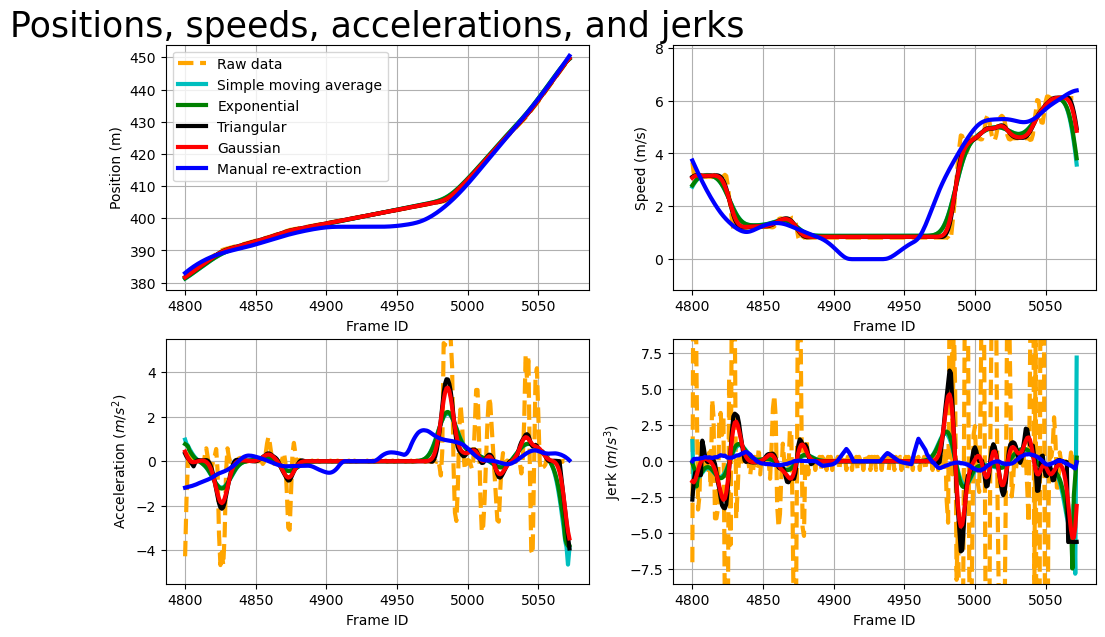

In [13]:
plot_example(single_trajm, single_traje, single_trajt, single_trajg, sample_reextract, id_sample, app_id = 1)

- Remove outliers and high-frequency noises
- Due to the choice of the mean padding, may face problems at the edge of the signal when the values at the edges are greatly different from the mean value

In [14]:
def displaySpectrum_smooth(data_g, data_m, data_e, data_t, data_p, data_coif, data_id): #data_id =1: sample, data_id = 2: dataset
    import copy; from scipy.fftpack import fft
    import seaborn as sns
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    
    N = len(data_g); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency
    series_raw = copy.deepcopy(data_g); #series_smooth = copy.deepcopy(data_smooth); 
    hat_a_hz = fft(series_raw[:,-6],N); hat_j_hz = fft(series_raw[:,-5],N); #raw data
    pa_hz = fft(data_p[:,5],N); pj_hz = fft(data_p[:,9],N) #Multistep optimization
    ga_hz = fft(data_g[:,-2],N); gj_hz = fft(data_g[:,-1],N); #Gaussian filter
    ma_hz = fft(data_m[:,-2],N); mj_hz = fft(data_m[:,-1],N); #Moving average filter
    ea_hz = fft(data_e[:,-2],N); ej_hz = fft(data_e[:,-1],N); #Exponential filter
    ta_hz = fft(data_t[:,-2],N); tj_hz = fft(data_t[:,-1],N); #Triangular filter
    coif_a_hz = fft(data_coif[:,-6],N); coif_j_hz = fft(data_coif[:,-1],N)
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N;  
    mag_ga = 2*(np.absolute(ga_hz))/N; mag_ma = 2*(np.absolute(ma_hz))/N; mag_ea = 2*(np.absolute(ea_hz))/N; #accelerations
    mag_ta = 2*(np.absolute(ta_hz))/N; mag_pa = 2*(np.absolute(pa_hz))/N; #accelerations
    mag_gj = 2*(np.absolute(gj_hz))/N; mag_mj = 2*(np.absolute(mj_hz))/N; mag_ej = 2*(np.absolute(ej_hz))/N; #jerks
    mag_tj = 2*(np.absolute(tj_hz))/N; mag_pj = 2*(np.absolute(pj_hz))/N; #jerks
    mag_coif_a = 2*(np.absolute(coif_a_hz))/N; mag_coif_j = 2*(np.absolute(coif_j_hz))/N
    
    font2 = {'weight' : 'normal', 'size' : 15,}; s1 = 10
    sns.set(rc={"figure.figsize": (18,5)}, style="white", palette=None)
    plt.figure(figsize=(14,4));
    label_set = ["Raw data","Multistep optimization","Simple moving average", "Exponential", "Triangular", "Gaussian", "Manual re-extration"]
    acc_set = [raw_a, mag_pa, mag_ma, mag_ea, mag_ta, mag_ga, mag_coif_a]
    jerk_set = [raw_j, mag_pj, mag_mj, mag_ej, mag_tj, mag_gj, mag_coif_j]
    color_set = ["orange", "purple", "c", "g", "k", "r", "b"]
    line_set = ["--", "-", "-", "-", "-", "-", "-"]
    for i in range(2):
        plt.subplot(1,2,i+1); plt.xticks(np.arange(0, 5.5, 0.5)); #plt.ylim(-0.01,0.8);  
        plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
        plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
        for k in range(7):
            if k == 1 and data_id == 1: 
                continue
            if i == 0:
                plt.title("Frequency spectrum",fontsize= 20);
                plt.plot(frq[:len(frq) // 2],acc_set[k][:len(frq) // 2], color = color_set[k], linewidth=3, linestyle=line_set[k], label = label_set[k]);
                plt.legend(fontsize=10, loc = 1); 
            elif i == 1:
                plt.plot(frq[:len(frq) // 2],jerk_set[k][:len(frq) // 2], color = color_set[k], linewidth=3, linestyle=line_set[k], label = label_set[k]);
        plt.grid(True); 

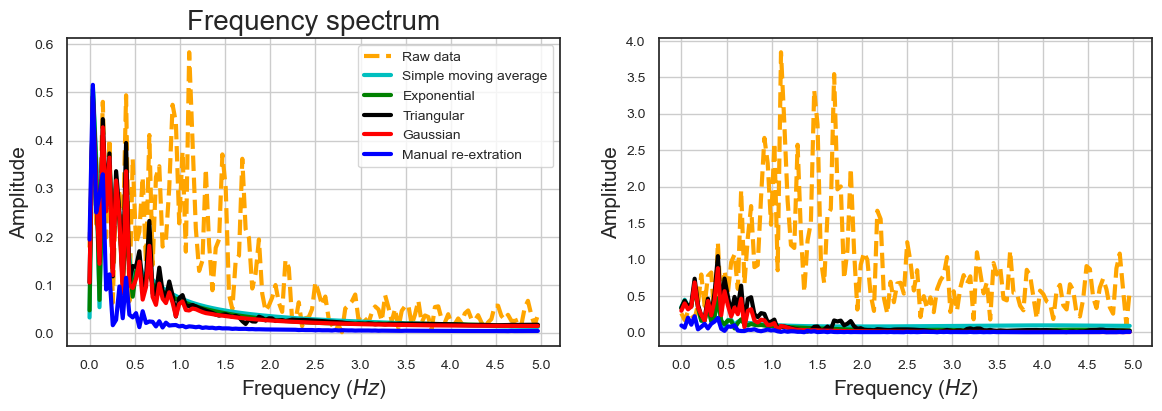

In [15]:
displaySpectrum_smooth(single_trajg, single_trajm, single_traje, single_trajt, single_trajg, sample_reextract, data_id = 1)

### Evaluation of different filters and comparison with an existing method

- Other data sources:
    - Raw data
    - [(Montanino and Punzo, 2013, 2015)](https://www.sciencedirect.com/science/article/pii/S0191261515001393) smoothed the data with their proposed multistep optimization method
    - [(Coifman and Li, 2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) manually re-extracted the positions recorded by camera 6 on the I80 freeway
- Filters that are tested and parameters calculated by the parameter choice algorithm (time step) with 30% randomly chosen vehicles:
    - Simple moving average filter, 13 -> 0.18 m MAE
    - Exponential filter, 81 -> 0.17 m MAE
    - Triangular filter, 29 -> 0.17 m MAE
    - Gaussian filter, 49 -> 0.16 m MAE

    

- Convergence pattern

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/convergence.png" width="40%"/> 

In [16]:
from random import sample
import random
random.seed (0) #randomly set a seed, make sure that every time you try with the same subset
tot_veh = sorted(set(veh_traj.values[:,0].tolist()),key = veh_traj.values[:,0].tolist().index)
id_set = sample(tot_veh, int(round(len(tot_veh)*0.3, 0)))

In [17]:
print("----------------------------Moving average filter -------------------------------------------")
smooth_trajm, rawm, num_item = method_application(veh_traj, id_set, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 2, norm_id = 1, pad_id = 1)
print("----------------------------Exponential filter -------------------------------------------")
smooth_traje, rawe, num_itee = method_application(veh_traj, id_set, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 3, norm_id = 1, pad_id = 1)
print("----------------------------Triangular filter -------------------------------------------")
smooth_trajt, rawt, num_itet = method_application(veh_traj, id_set, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 4, norm_id = 1, pad_id = 1)
print("----------------------------Gaussian filter -------------------------------------------")
smooth_trajg, rawg, num_iteg = method_application(veh_traj, id_set, delta_t, up_wv, low_wv, up_int, low_int, eplison,
                                                 up_v, down_v, up_a, down_a, up_j, down_j, opt_id, filters = 1, norm_id = 1, pad_id = 1)

----------------------------Moving average filter -------------------------------------------
error_cum [[0.17 0.18 0.18 0.2  0.23 0.25 0.28 0.31 0.35 0.38]] filter parameters 3 window size 13
----------------------------Exponential filter -------------------------------------------
error_cum [[0.15 0.15 0.16 0.16 0.16 0.16 0.16 0.16 0.17 0.17]] filter parameters 10 window size 81
----------------------------Triangular filter -------------------------------------------
error_cum [[0.16 0.16 0.16 0.15 0.15 0.15 0.17 0.19 0.21 0.22]] filter parameters 7 window size 29
----------------------------Gaussian filter -------------------------------------------
error_cum [[0.16 0.16 0.15 0.14 0.15 0.16 0.19 0.21 0.24 0.26]] filter parameters 6 window size 49


- Iteration summary
    
<table>
    <tr>
        <td > </td>
        <td> Simple moving average filter </td>
        <td> Exponential filter </td>
        <td> Triangular filter </td>
        <td> Gaussian filter </td>
    </tr>
    <tr>
        <td> Average </td>
        <td> 6.4 </td>
        <td> 3.12 </td>
        <td> 4.22 </td>
        <td> 1.9 </td>
    </tr> 
    <tr>
        <td> Maximum </td>
        <td> 131 </td>
        <td> 53 </td>
        <td> 470 </td>
        <td> 228 </td>
    </tr> 
    <tr>
        <td> Std </td>
        <td> 9.98 </td>
        <td> 3.74 </td>
        <td> 27.41 </td>
        <td> 11.44 </td>
    </tr> 
    <tr>
        <td> =1 (%) </td>
        <td> 25 </td>
        <td> 32 </td>
        <td> 96.1 </td>
        <td> 99.1 </td>
    </tr> 
    <tr>
        <td> $\leq$10 (%) </td>
        <td> 86.2 </td>
        <td> 97 </td>
        <td> 97 </td>
        <td> 99.1 </td>
    </tr> 
   
</table>

In [18]:
smoothed_data = [num_item, num_itee, num_itet, num_iteg]
filter_set = ["Moving average", "Exponential", "Triangular", "Gaussian"]
for i in range(4):
    print("----------------", filter_set[i],"-----------------------")
    print("average iteration: ", np.mean(smoothed_data[i]),"std: ", np.std(smoothed_data[i]))
    print("maximum iteration: ", max(smoothed_data[i]))
    print("equal to 1: ", 100*len(smoothed_data[i][np.where(smoothed_data[i][:,0]==1)])/len(smoothed_data[i]),"%")
    print("no more than than 10: ", 100*(1 - len(smoothed_data[i][np.where(smoothed_data[i][:,0]>=11)])/len(smoothed_data[i])),"%")
    
import seaborn as sns
import matplotlib.pyplot as plt
i_range = [0] + np.round(np.linspace(3,30,10),0).tolist() + [200]
i_lable = [int(i) for i in np.linspace(0,27,10).tolist()] + [">30"]
x1 = 0; x2 = 30; y1 = 0; y2 = 1
sns.set(rc={"figure.figsize": (12, 7)}, style="white", palette=None)

---------------- Moving average -----------------------
average iteration:  6.396732788798133 std:  9.983540179024395
maximum iteration:  [131.]
equal to 1:  24.970828471411902 %
no more than than 10:  86.23103850641773 %
---------------- Exponential -----------------------
average iteration:  3.105017502917153 std:  3.7423665480669293
maximum iteration:  [53.]
equal to 1:  31.971995332555426 %
no more than than 10:  96.96616102683781 %
---------------- Triangular -----------------------
average iteration:  4.222870478413069 std:  27.407432658360165
maximum iteration:  [470.]
equal to 1:  96.14935822637106 %
no more than than 10:  97.0828471411902 %
---------------- Gaussian -----------------------
average iteration:  1.9049008168028005 std:  11.437198487284254
maximum iteration:  [228.]
equal to 1:  99.06651108518086 %
no more than than 10:  99.06651108518086 %


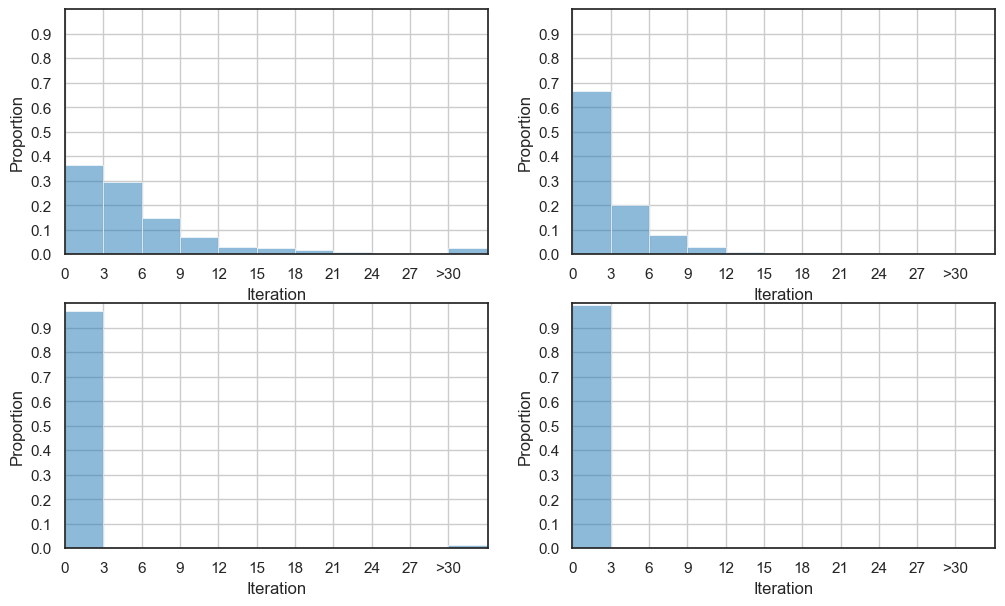

In [19]:
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.histplot(smoothed_data[i], bins=i_range, stat = 'proportion')
    ax.set_ylim(y1, y2); ax.set_xlim(x1, x2+3.1); 
    ax.set_yticks(np.arange(y1, y2, 0.1)); ax.set_xticks(np.round(np.arange(x1, x2+1, 3),0), i_lable);
    ax.set_xlabel("Iteration"); plt.grid(True); 
    ax.legend([],[], frameon=False) #remove the ledgend

In [20]:
'''The result of this module corresponds to Table 4 in the paper'''
def statistic(mo_x, g1, m1, e1, t1, x2): #l2_x is multistep optimization data, x1 is denoise (among which x1[:,-8:-4] are the raw data), x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position     ", "speed        ","acceleration ","jerk         "]
    smoothed_set = [m1, e1, t1, g1]; filter_set = ["Moving average", "Exponential", "Triangular", "Gaussian"]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    multistep_id = [3, 4, 5, -1] #  column number of position, speed, acceleration, jerk in the multistep optimization data
    up = [200, 30, 4, 8] #upper bounds of derivatives of positions
    low = [-200, 0, -5, -8] #lower bounds of derivatives of positions
    for i in range(4):
        true_value = true_data[:,ground_truth_id[i] ] - g1[:,4] if i == 0 else true_data[:,ground_truth_id[i] ]
        print("++++++++++++++++Raw data++++++++++++++++")
        raw = g1[:,-8+i] - g1[:,-8] if i == 0 else g1[:,-8+i] #data smoothed by multistep optimization method
        mse_test0 = mean_squared_error(raw, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mae_test0 = mean_absolute_error(raw, true_value)
        mean_x0 = round(np.mean(raw),4); max_x0 = round(np.max(raw),1); min_x0 = round(np.min(raw),1); std_x0 = round(np.std(raw),2)
        outlier0 = round(100*len(raw[np.where((np.round(raw[:],5) > up[i]) | (np.round(raw[:],5) < low[i]))])/len(raw),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x0, "Std: ", std_x0, "Range: [", min_x0, max_x0, "]  Outlier: ", outlier0, "mse: ", round(mse_test0,2), "mae: ", round(mae_test0,2)); 
        print("+++++++++Multistep optimiztaion+++++++++")
        multistep_smooth = mo_x[:,multistep_id[i]] - g1[:,4] if i == 0 else mo_x[:,multistep_id[i]] #data smoothed by multistep optimization method
        mse_test1 = mean_squared_error(multistep_smooth, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mae_test1 = mean_absolute_error(multistep_smooth, true_value)
        mean_x1 = round(np.mean(multistep_smooth),4); max_x1 = round(np.max(multistep_smooth),1); min_x1 = round(np.min(multistep_smooth),1); std_x1 = round(np.std(multistep_smooth),2)
        outlier1 = round(100*len(multistep_smooth[np.where((np.round(multistep_smooth[:],5) > up[i]) | (np.round(multistep_smooth[:],5) < low[i]))])/len(multistep_smooth),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x1, "Std: ", std_x1, "Range: [", min_x1, max_x1, "]  Outlier: ", outlier1, "mse: ", round(mse_test1,2), "mae: ", round(mae_test1,2)); 
        for k in range(4):
            smoothed = smoothed_set[k][:,-4] - smoothed_set[k][:,-8] if i == 0 else smoothed_set[k][:,-4+i] #data smoothed by our method
            print("+++++++++++++",filter_set[k],"filter+++++++++++++++++")
            mse_test2 = mean_squared_error(smoothed, true_value) #mean squared error between our smoothed data and ground truth
            mae_test2 = mean_absolute_error(smoothed, true_value)
            mean_x2 = round(np.mean(smoothed),4); max_x2 = round(np.max(smoothed),1); min_x2 = round(np.min(smoothed),1); std_x2 = round(np.std(smoothed),2)
            outlier2 = round(100*len(smoothed[np.where((np.round(smoothed[:],5) > up[i]) | (np.round(smoothed[:],5) < low[i]))])/len(smoothed),1)
            print("derivative: ", derivatives[i], "Mean: ", mean_x2, "Std: ", std_x2, "Range: [", min_x2, max_x2, "]  Outlier: ", outlier2, "mse: ", round(mse_test2,2), "mae: ", round(mae_test2,2));    
        print("+++++++++Manual re-extraction+++++++++++")
        rextracted = true_data[:, ground_truth_id[i]] - g1[:,4] if i == 0 else true_data[:, ground_truth_id[i]] #data smoothed by our method
        mse_test3 = mean_squared_error(rextracted, true_value) # always zero
        mae_test3 = mean_absolute_error(rextracted, true_value)
        mean_x3 = round(np.mean(rextracted),4); max_x3 = round(np.max(rextracted),1); min_x3 = round(np.min(rextracted),1); std_x3 = round(np.std(rextracted),2)
        outlier3 = round(100*len(rextracted[np.where((np.round(rextracted[:],5) > up[i]) | (np.round(rextracted[:],5) < low[i]))])/len(rextracted),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x3, "Std: ", std_x3, "Range: [", min_x3, max_x3, "]  Outlier: ", outlier3, "mse: ", round(mse_test3,2), "mae: ", round(mae_test3,2)); 
    
statistic(veh_multistep_pd.values, smooth_trajg, smooth_trajm, smooth_traje, smooth_trajt, veh_reextract_pd.values) 

++++++++++++++++Raw data++++++++++++++++
derivative:  position      Mean:  0.0 Std:  0.0 Range: [ 0.0 0.0 ]  Outlier:  0.0 mse:  1.91 mae:  0.98
+++++++++Multistep optimiztaion+++++++++
derivative:  position      Mean:  -0.0392 Std:  0.88 Range: [ -56.6 9.9 ]  Outlier:  0.0 mse:  2.18 mae:  0.99
+++++++++++++ Moving average filter+++++++++++++++++
derivative:  position      Mean:  -0.0068 Std:  0.51 Range: [ -6.7 6.4 ]  Outlier:  0.0 mse:  2.19 mae:  1.05
+++++++++++++ Exponential filter+++++++++++++++++
derivative:  position      Mean:  -0.0066 Std:  0.45 Range: [ -6.3 5.7 ]  Outlier:  0.0 mse:  2.12 mae:  1.04
+++++++++++++ Triangular filter+++++++++++++++++
derivative:  position      Mean:  -0.0089 Std:  0.42 Range: [ -6.6 6.3 ]  Outlier:  0.0 mse:  2.08 mae:  1.02
+++++++++++++ Gaussian filter+++++++++++++++++
derivative:  position      Mean:  -0.0088 Std:  0.38 Range: [ -6.5 6.1 ]  Outlier:  0.0 mse:  2.04 mae:  1.01
+++++++++Manual re-extraction+++++++++++
derivative:  position  

<span style="color:black; font-size:150%"> Comparison with an existing method
<table>
    <tr>
        <td colspan="2", rowspan="2">Variables</td>
        <td rowspan="2"> Raw data </td>
        <td rowspan="2">Multistep optimization </td>
        <td colspan="4"> Our method </td>
        <td rowspan="2"> Manual re-extraction </td>
    </tr>
    <tr>
        <td> Filter 1 </td>
        <td> Filter 2 </td>
        <td> Filter 3 </td>
        <td> Filter 4 </td>
    </tr>    
    <tr>
        <td rowspan="2">Position ($m$)</td>
        <td> MSE </td>
        <td> 1.91 </td>
        <td> 2.18 </td>
        <td> 2.19 </td>
        <td> 2.12 </td>
        <td> 2.08 </td>
        <td> 2.04 </td>
        <td> / </td>
    </tr>
    <tr>
        <td> MAE  </td>
        <td> 0.98 </td>
        <td> 0.99 </td>
        <td> 1.05 </td>
        <td> 1.04 </td>
        <td> 1.02 </td>
        <td> 1.01 </td>
        <td> / </td>
    </tr>
    <tr>
        <td rowspan="6">Speed ($m/s$)</td>
        <td> Mean </td>
        <td> 8.07 </td>
        <td> 8.05 </td>
        <td> 8.06 </td>
        <td> 8.07 </td>
        <td> 8.07 </td>
        <td> 8.07 </td>
        <td> 7.88 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 4.07 </td>
        <td> 4.01 </td>
        <td> 3.95 </td>
        <td> 3.96 </td>
        <td> 3.96 </td>
        <td> 3.97 </td>
        <td> 3.89 </td>
    </tr>
    <tr>
        <td> Range </td>
        <td> [0,36.0] </td>
        <td> [0,27.0] </td>
        <td> [0,26.9] </td>
        <td> [0,27] </td>
        <td> [0,26.8] </td>
        <td> [0,26.7] </td>
        <td> [0,26.4] </td>
    </tr>
    <tr>
        <td> Outlier(%) </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> MSE </td>
        <td> 0.88 </td>
        <td> 0.47 </td>
        <td> 0.43 </td>
        <td> 0.42 </td>
        <td> 0.38 </td>
        <td> 0.37 </td>
        <td> / </td>
    </tr>
    <tr>
        <td> MAE  </td>
        <td> 0.62 </td>
        <td> 0.48 </td>
        <td> 0.46 </td>
        <td> 0.46 </td>
        <td> 0.44 </td>
        <td> 0.44 </td>
        <td> / </td>
    </tr>
    <tr>
        <td rowspan="6"> Acceleration ($m/s^2$)</td>
        <td> Mean </td>
        <td> -0.04 </td>
        <td> -0.04 </td>
        <td> -0.03</td>
        <td> -0.04 </td>
        <td> -0.05 </td>
        <td> -0.05 </td>
        <td> 0.03 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 6.69 </td>
        <td> 0.92 </td>
        <td> 0.81 </td>
        <td> 0.8 </td>
        <td> 0.66 </td>
        <td> 0.66 </td>
        <td> 0.58 </td>
    </tr>
    <tr>
        <td> Range </td>
        <td> [-176.5,292.2] </td>
        <td> [-14.1,4.5] </td>
        <td> [-5.0,4.0] </td>
        <td> [-4.4,4.0] </td>
        <td> [-5.0,4.0] </td>
        <td> [-5.0,4.0] </td>
        <td> [-4.2,3.5] </td>
    </tr>
    <tr>
        <td> Outlier(%) </td>
        <td> 15.0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> MSE </td>
        <td> 44.56 </td>
        <td> 0.68 </td>
        <td> 0.66 </td>
        <td> 0.64 </td>
        <td> 0.4 </td>
        <td> 0.4 </td>
        <td> / </td>
    </tr>
    <tr>
        <td> MAE  </td>
        <td> 2.64 </td>
        <td> 0.60 </td>
        <td> 0.55 </td>
        <td> 0.54 </td>
        <td> 0.45 </td>
        <td> 0.44 </td>
        <td> / </td>
    </tr>
    <tr>
        <td rowspan="6">Jerk ($m/s^3$)</td>
        <td> Mean </td>
        <td> -0.17 </td>
        <td> -0.13 </td>
        <td> -0.11 </td>
        <td> -0.11 </td>
        <td> -0.06 </td>
        <td> -0.06 </td>
        <td> -0.02 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 99.08 </td>
        <td> 2.41 </td>
        <td> 1.81 </td>
        <td> 1.86 </td>
        <td> 1.07 </td>
        <td> 0.97 </td>
        <td> 0.62 </td>
    </tr>
    <tr>
        <td> Range </td>
        <td> [-4171.5,2954.4] </td>
        <td> [-141.0,39.4] </td>
        <td> [-8.0,8.0] </td>
        <td> [-8.0,8.0] </td>
        <td> [-8.0,8.0] </td>
        <td> [-7.4,8.0] </td>
        <td> [-5.3,7.1] </td>
    </tr>
    <tr>
        <td> Outlier(%) </td>
        <td> 42.3 </td>
        <td> 0.6 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
        <td> 0 </td>
    </tr>
    <tr>
        <td> MSE </td>
        <td> 9817.87 </td>
        <td> 5.90 </td>
        <td> 3.46 </td>
        <td> 3.65 </td>
        <td> 1.33 </td>
        <td> 1.12 </td>
        <td> / </td>
    </tr>
    <tr>
        <td> MAE  </td>
        <td> 32.50 </td>
        <td> 1.65 </td>
        <td> 1.23 </td>
        <td> 1.31 </td>
        <td> 0.82 </td>
        <td> 0.75 </td>
        <td> / </td>
    </tr>
</table>
- 1: simple moving average, 2: exponential, 3: triangular, 4: Gaussian

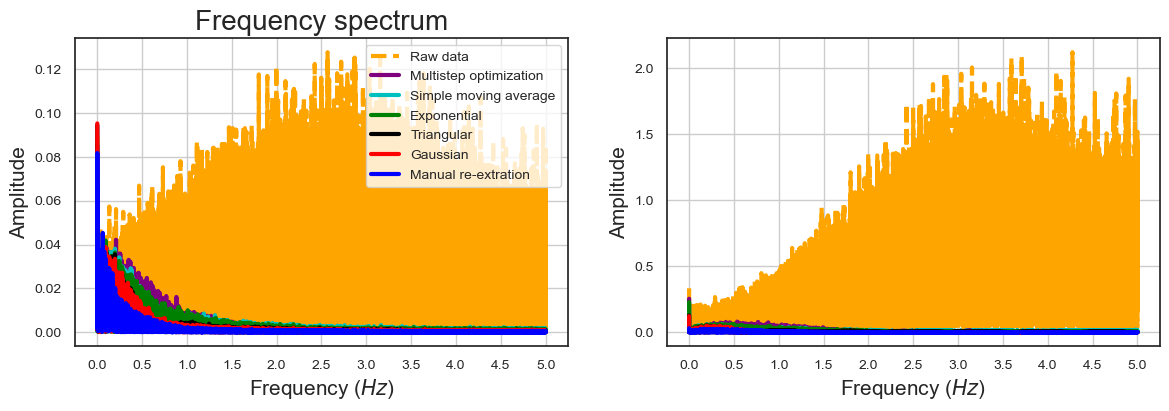

In [21]:
displaySpectrum_smooth(smooth_trajg, smooth_trajm, smooth_traje, smooth_trajt, veh_multistep_pd.values, veh_reextract_pd.values, data_id = 2)

- <a href="#/1/1">1</a>. [Introduction](./iterative_filter_smoothing.ipynb#Introduction)
- <a href="#/3/1">3</a>. [A simplified iterative moving average method for smoothing](./iterative_filter_smoothing.ipynb#Methodology)
    - Flow chart of the method
    - Speeding smoothing
    - Integration of the smoothed speeds
- <a href="#/3/1">3</a>. [Proof of termination within a finite number of iterations</span>](./iterative_filter_smoothing.ipynb#Methodology)
    - Discrete Fourier Transform (DFT) of the kernel functions
    - Proof of the termination
- <a href="#/4/1">4</a>. [ Method application and comparison](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
    - Choice of parameters for filters
    - Calibration with sample trajectories
    - Evaluation of different filters and comparison with an existing method
- <a href="#/5/1">5</a>. [<span style="color:red; font-size:200%"> Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

## Conclusion
- Summary
    - In one iteration
        1. Cyclic mean padding
        2. Applying moving average filters
        3. Normalization
        4. Check for termination
    - Iterative process
        - If there are still outliers, take the current speed profile as the new input and initiate another iteration to further smooth the speeds
        - Only when all speeds, accelerations, and jerks are physically meaningful, terminate the iterations
    - The termination of the method is guaranteed
    - Numerically demonstrate the efficacy of our method upon the NGSIM I80 camera 6 data
        - Our method eliminates all outliers and rapid oscillations while retaining most of the information in the raw data
        - Statistical comparisons reveal our method can better resemble those manually re-extracted than an existing method

- Contribution
    - Introduce a novel iterative moving average method to effectively smooth longitudinal vehicle trajectory data.
    - We provide a rigorous mathematical proof about the termination within a finite number of iterations
- Limitation and future extensions
    - Due to the choice of the mean padding, may face problems at the edge of the signal when the values at the edges are greatly different from the mean value -> quadratic programming method and conservation law method
    - Other options for smoothing speeds such as the weighted kNN regression algorithm and the Savitzky-Golay filter
    - Test the proposed method using data obtained from other sources.
    - More mathematically tractable techniques that that can eliminate the need for the iterative process
    - Smooth lateral vehicle trajectories with varying termination conditions

# Two-step quadratic programming for physically meaningful smoothing of longitudinal vehicle trajectories

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [<span style="color:red; font-size:200%">  Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

- <a href="#/1/1">1</a>. [<span style="color:red; font-size:200%"> Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Dissertation_slides.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Dissertation_slides.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Dissertation_slides.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Dissertation_slides.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Dissertation_slides.ipynb.ipynb#Conclusion)

## Introduction
### The proposed method

- Two steps
    - Step 1: minimization of the discrepancy between the half-smoothed and raw positions 
    - Step 2: minimization of the sum of squared highest order derivatives
- Advantages
    - Internally consistent
        -  Smoothed speeds and higher order derivatives of positions are consistently defined as symplectic differences in positions
    - Physically meaningful bounds
    - Unique optimal solutions

### Comparison of our method with different splines methods

- <table>
    <tr>
        <td colspan="2">Method</td>
        <td>Discrepancy </td>
        <td>Roughness </td>
        <td>Spline basis</td>
        <td>Bounded derivatives of positions </td>
        <td>Prior position errors </td>
    </tr>
    <tr>
        <td colspan="2">Smoothing splines</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Regression splines</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">Penalty splines</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Toledo et al.,2007)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Marczak and Buisson, 2012)</td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td colspan="2">(Venthuruthiyil and Chunchu, 2018)</td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
    </tr>
    <tr>
        <td rowspan="2">Our method</td>
        <td>Step 1</td>
        <td>$\surd$ </td>
        <td> </td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
    </tr>
    <tr>
        <td>Step 2</td>
        <td> </td>
        <td>$\surd$ </td>
        <td> </td>
        <td>$\surd$ </td>
        <td>$\surd$ </td>
    </tr>
</table>

### Minimization of the highest order of derivatives

- [(Whittaker, 1922)](https://www.cambridge.org/core/services/aop-cambridge-core/content/view/744E6CBD93804DA4DF7CAC50507FA7BB/S0013091500077853a.pdf/div-class-title-on-a-new-method-of-graduation-div.pdf) proposed the use of the sum of squared third-order derivatives to measure the roughness of the smoothed data
    - Minimum jerk trajectory of human arm movements [(Flash and Hogan, 1985)](https://www.jneurosci.org/content/5/7/1688.short)
    - Drivers’ stress levels increase when they experience stronger jerks [(Othman et al. 2008)](https://ieeexplore.ieee.org/abstract/document/4811498)
- Minimum jerk/snap were used to design drones' and robot manipulators' trajectories  [(Gasparetto and Zanotto,2010,](https://www.sciencedirect.com/science/article/pii/S0965997809002464) [Mellinger and Kumar, 2011)](https://ieeexplore.ieee.org/document/5980409) <br>
- Calibrate the highest order: using empirical data, considering both the quality of smoothed trajectory and computational complexity
- Only consider up to snaps with the highest order of four, due to the large increase in complexity

## Derivatives of positions and their physically meaningful bounds

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/2/1">2</a>. [<span style="color:red; font-size:200%"> Derivatives of positions and their physically meaningful bounds](./Dissertation_slides.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Dissertation_slides.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Dissertation_slides.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Dissertation_slides.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Dissertation_slides.ipynb.ipynb#Conclusion)

### Internally consistent derivatives of positions
- We can write the higher-order derivatives of positions as follows:
$$
\small {x}^{(k)}(t) = \frac{d {x}^{(k-1)}(t)}{dt} = \frac{d^{(k)}{x}(t)}{dt^{(k)}},
$$
    - $x(t)$: a time-continuous trajectory, $x^{(k)}(t)$: the $k$th order derivative of $x(t)$, $k=1,\cdots,K$, where $K$ is the highest order of derivatives.

- Symplectic discretization (mixed implicit-explicit Euler discretization) 
    - $\small x_m^{(k)}$: the $k$ th-order derivatives of positions at $t_m$ ($m=\lfloor \frac{k+1}2 \rfloor+1, \cdots, M-\lfloor \frac{k}2 \rfloor$)
    
<img src="https://raw.githubusercontent.com/ximeng96/Two-step-quadratic-programming-for-physically-meaningful-smoothing-of-longitudinal-vehicle-trajector/main/figures/differentiate.JPG" width="50%" align="center"> 

- In particular
$$\small x^{(2k+1)}_m = \frac{x_m^{(2k)}-x_{m-1}^{(2k)}}{\Delta t}, \ \ k=0,1, \cdots  $$ 
$$\small x^{(2k+2)}_m = \frac{x_{m+1}^{(2k+1)}-x_{m}^{(2k+1)}}{\Delta t},  \ \ k=0,1, \cdots  $$ 
- Rewritten $\textbf{x}^{(k)}$ with matrices
$$ \small \textbf{x}^{(k)} = \frac{W^{(k)} \textbf{x}}{\Delta t^k},$$
$$\small W^{(k)} = ((\textbf{0}| I_{M-k}) - (I_{M-k}| \textbf{0})) W^{(k-1)}, \quad k = 1,\cdots,K.\ \ (5.5) $$   
    -  $\textbf{x}^{(k)}$: the vector of $x_m^{(k)}$, $W^{(k)}$: the $k$th difference matrix which has a staircase structure, and its dimension is $(M-k)\times M$

In [22]:
def difference_matrix(v_num): # the input is the number of speeds of one vehicle, the outputs are difference matrices
    diff0_0 = -np.identity(v_num+1); diff0_1 = np.identity(v_num+1); # for positions
    diff1 = np.zeros((2*v_num,v_num+1)); # for speeds
    diff2 = np.zeros((2*v_num-2,v_num+1)); # for accelerations
    diff3 = np.zeros((2*v_num-4,v_num+1)); # for jerks
    diff4 = np.zeros((2*v_num-6,v_num+1)); # for snaps
    '''The following calculations correspond to (eq 5) regarding different k'''
    for i in range(v_num): #coefficient matrix for speeds
        diff1[i,i:i+2] = [1,-1] 
        diff1[i+v_num,i:i+2] = [-1,1]
    for i in range(v_num-1): #coefficient matrix for accelerations
        diff2[i,i:i+3] = [-1,2,-1] 
        diff2[i+(v_num-1),i:i+3] = [1,-2,1] 
    for i in range(v_num-2): #coefficient matrix for jerks
        diff3[i,i:i+4] = [1,-3,3,-1] 
        diff3[i+(v_num-2),i:i+4] = [-1,3,-3,1] 
    for i in range(v_num-3): #coefficient matrix for snaps
        diff4[i,i:i+5] = [-1,4,-6,4,-1] 
        diff4[i+(v_num-3),i:i+5] = [1,-4,6,-4,1] 
    return diff0_0, diff0_1, diff1, diff2, diff3, diff4

#### Lemmas and Corollaries
| Lemma/corollary | Concept | Later usage |
| :---- | :------------------------- | :-------------------------- |
| Lemma 5.1 | The product of $W$ and $1$ is $0$ | Find feasible solution for step 1 |
| Lemma 5.2 | $W^{(k)}$ can be rewriten with $D^k$, where $D = \left( \frac{(1, 0, \cdots, 0)}{W^{(1)}} \right)$ | Help define the submatrix $W_1$ and $W_2$ |
| Corollary 5.3 | $W_1$ and $W_2$ can be written as submatrices of $D^k$ | Help show they are invertable |
| Corollary 5.4 | The rank of $ (W^{(k)})^\top W^{(k)}$ is $ M-k$ | Help show $(W^{(k)})^\top W^{(k)}$ is not positive definite |


- **Lemma 5.1.** For $ \small k=1,\cdots,K$, the sum of each row in $ \small W^{(k)}$ is zero; i.e., <br>
$$ \small W^{(k)} \cdot \textbf{1}=\textbf{0},$$
    where $\textbf{1}$ is a $(M-k)\times 1$ vector of ones.
- **Lemma 5.2.** With $D$ defined as:
$$
\small D= \left(
\begin{matrix}
1  & 0  &  \cdots  &  \cdots & \cdots & 0 \\
-1  & 1  &  \ddots &  &   & \vdots \\
0      & -1  &  1  &  \ddots &  & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & & \ddots & \ddots & \ddots & 0 \\
0      & \cdots & \cdots  &  0  & -1 & 1 \\
\end{matrix}
\right)_{M\times M}
$$
then $\small W^{(k)}$ can be written as: 
$$\small W^{(k)} = (\underset{(M-k)\times k}{\textbf{0}}| I_{M-k}) D^k, $$ 
where $\small \textbf{0}$ is a zero matrix with the dimension written below it


- **Corollary 5.3** We define two submatrices of $\small  W^{(k)}$, $\small  W_1^{(k)}$ and $\small W_2^{(k)}$, as follows:
$$
\scriptsize W_1^{(k)} \equiv (W_{i,q}^{(k)})_{1\leq i \leq M-k, 1 \leq q \leq k}, \ \ \ \ W_2^{(k)} \equiv (W_{i,q}^{(k)})_{1\leq i \leq M-k, k+1 \leq q \leq M}. 
$$
Then $\small W_1^{(k)}$ and $\small W_2^{(k)}$ are submatrices of $D^k$: 
$$
\scriptsize W_1^{(k)} = (D^k_{i,q})_{k+1\leq i\leq M, 1\leq j\leq k},\ \ \ \ \scriptsize W_2^{(k)} = (D^k_{i,q})_{k+1\leq i\leq M, k+1\leq j\leq M}.
$$
    - For example, when $k$ = 3
\begin{equation}
  \scriptsize D^{3}
  = \left(
  \begin{matrix}
    1  & 0 & 0 & 0 & \cdots  & 0  \\
    -3  & 1 & 0 & 0 & \cdots  & 0  \\
    3  & -3 & 1 & 0 & \cdots  & 0  \\
    -1  & 3 & -3 & 1 & \cdots  & 0  \\
    \vdots  & \ddots & \ddots & \ddots & \cdots  & \vdots  \\
    0  & \cdots & -1 & 3 & -3  & 1  \\
  \end{matrix} \right)_{M \times M} =
\left(\begin{array}{c|c} 
    \underset{3\times 3}{\textbf{D}^{3}_{11}}  &  \underset{3\times (M-3)}{\textbf{D}^{3}_{12}}  \\ 
    \hline
   \underset{(M-3)\times 3}{\textbf{D}^{3}_{21}}  &  \underset{(M-3)\times (M-3)}{\textbf{D}^{3}_{22}}  \\ 
\end{array}\right)
\end{equation}    
        - $\scriptsize W_1^{(3)}$ and $\scriptsize W_2^{(3)}$:    
\begin{equation}
  \scriptsize W_{1}^{(3)}
  = \left(
  \begin{matrix}
    -1  & 3 & -3  \\
    0  & -1 & 3  \\
    0  & 0 & -1  \\
    \vdots  & \vdots & \vdots \\
    0  & \cdots & 0  \\
  \end{matrix} \right)_{(M-3) \times 3} 
\scriptsize W_{2}^{(3)}  =
\left( \begin{matrix}
    1  & 0 & 0 & 0 & \cdots  & 0  \\
    -3  & 1 & 0 & 0 & \cdots  & 0  \\
    3  & -3 & 1 & 0 & \cdots  & 0  \\
    -1  & 3 & -3 & 1 & \cdots  & 0  \\
    \vdots  & \ddots & \ddots & \ddots & \cdots  & \vdots  \\
    0  & \cdots & -1 & 3 & -3  & 1  \\
  \end{matrix} \right)_{(M-3) \times (M-3)} 
\end{equation}    
- **Corollary 5.4** The rank of $\small (W^{(k)})^\top W^{(k)}$ is $\small  M-k$.

### Linear inequality constraints based on bounded derivatives of positions
#### Linear inequality constraints
- Bounded derivatives of positions:
$$
x^{(k)}_{-} \leq \textbf{x}^{(k)} \leq x^{(k)}_{+}, \ \  k = 1,...,K
$$
    where $x^{(k)}_{-}$ and $x^{(k)}_{+}$ represent the lower and upper bounds of $\textbf{x}^{(k)}$
- Replacing $\textbf{x}^{(k)}$ by positions.
$$
\Delta t ^k x^{(k)}_{-} \leq W^{(k)} \textbf{x} \leq \Delta t ^k x^{(k)}_{+}, \ \  k = 1,...,K
$$

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/2/1">2</a>. [ Derivatives of positions and their physically meaningful bounds](./Dissertation_slides.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [<span style="color:red; font-size:200%"> Two-step quadratic programming method](./Dissertation_slides.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Dissertation_slides.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Dissertation_slides.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Dissertation_slides.ipynb.ipynb#Conclusion)

## Two-step quadratic programming method
- Two steps:
    1. Minimization of the discrepancy between the half-smoothed and raw positions
    2. Minimization of the sum of squared highest order derivatives
- Each step involve an optimization problem
- Input:
    - Raw positions
- Parameters
    - Physically meaningful ranges of derivatives of positions
    - Prior position errors
- Output:
    - Step 1: half-smoothed positions
    - Step 2: smoothed positions
    - Smoothed higher-order derivatives can be calculated with smoothed positions

<img src="https://raw.githubusercontent.com/ximeng96/Two-step-quadratic-programming-for-physically-meaningful-smoothing-of-longitudinal-vehicle-trajector/main/figures/flowchart.JPG" width="60%"/> 

### Step1: minimization of the discrepancy between the half-smoothed and raw positions
- The optimization problem: 
$$
\begin{align}
&\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x}),  \\
& s.t. \\
&\small x^{(k)}_- \leq \hat{\textbf{x}}^{(k)} \leq x^{(k)}_+, \ \ k = 1,...,K, 
\end{align}
$$
    
    $\small \hat{\textbf{x}}$:  vector of the variables in the quadratic programming problem, $\small \hat{\textbf{x}}^{(k)}$: vector of the $\small k$ th-order derivatives of $\small \hat{\textbf{x}}$ <br>
- Rewritten optimization problem:
$$
\begin{align}
&\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x}), \\
&\small \text{s.t.}\\ 
&\small -W^{(k)}\hat{\textbf{x}} \leq - \Delta t^k x^{(k)}_{-}, \ \ k = 1,\cdots,K, \\
&\small W^{(k)}\hat{\textbf{x}} \leq  \Delta t^k x^{(k)}_{+}  \ \ k = 1,\cdots,K. 
\end{align}
$$    
- By solving this optimization problem, the resulting positions ensure that all higher-order derivatives are within physically meaningful ranges

In [23]:
#The code for calculate half-smoothed positions
def reconstruct_traj_l2(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id): # the input is the raw position, speed bounds, acceleration bounds, jerk bounds, snap bounds
    M = len(raw_x) - 1
    x = cp.Variable(M+1) #Define variables
    # coefficient matrix
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    '''the coefficient matrix and the right side of the constraints, (eq 9a)-(eq 9e)'''
    f = int(round(1/delta_t,0)); 
    if cons_id == 1: #highest order is accelerations
        coe_l = np.vstack( (W0_0,W0_1,W1*f) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1),np.array([up_v]*M).reshape(M,1) ) ).reshape(4*M+2,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 2: #highest order is accelerations
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1) ) ).reshape(6*M,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 3: #highest order is jerks
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1),
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1), np.array([-down_j]*(M-2)).reshape(M-2,1), np.array([up_j]*(M-2)).reshape(M-2,1)) ).reshape(8*M-4,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    if cons_id == 4: #highest order is snaps
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3),W4*(f**4)) );  #coefficient matrix of constraints
        coe_r = np.vstack( ( np.array([0]*(M+1)).reshape(M+1,1), np.array([550]*(M+1)).reshape(M+1,1), -np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape(M-1,1), np.array([up_a]*(M-1)).reshape(M-1,1), np.array([-down_j]*(M-2)).reshape(M-2,1), np.array([up_j]*(M-2)).reshape(M-2,1),
                            np.array([-down_s]*(M-3)).reshape(M-3,1), np.array([up_s]*(M-3)).reshape(M-3,1) ) ).reshape(10*M-10,) #right side of constraints
        cons = [coe_l @ x <= coe_r] #constraints, AX <= b
    obj = cp.sum_squares(x - raw_x) #objective function
    model = cp.Problem(cp.Minimize(obj), cons)
    #solve the model
    model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    new_x = x.value; pos_array = np.array(raw_x).reshape(len(raw_x),1) #reconstructed positions and raw_positions
    
    return new_x, pos_array, model 

### Step2: minimization of the sum of squared highest order derivatives
#### Position range calculation

- The lower bound of the $m$th position in the trajectory: 
    - $\hat{x}_m$: if $x_m-\hat{x}_m$ exceeds the prior position error $\varepsilon$
        -  $x_m$: raw positions, $\hat{x}_m$: half-smoothed positions
    - $x_m - \varepsilon$: otherwise
- The upper bound of the $m$th position in the trajectory: 
    - $\hat{x}_m$: if $\hat{x}_m-x_m$ exceeds the prior position error $\varepsilon$
    - $x_m + \varepsilon$: otherwise
- The position can be calculated as follows:
$$
\min\{x_m - \varepsilon, \hat{x}_m\} \leq \tilde{x}_m \leq  \max\{ x_m + \varepsilon, \hat{x}_m\},
$$

In [24]:
def position_limit(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, cons_id): 
    #the input are the raw positions, and the outputs are lower bound and the upper bound of the position
    import copy
    new_x, raw_pos, pos_model = reconstruct_traj_l2(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id); #calculate the reconstructed positions based on l_2 norm minimization
    raw_up = raw_x + est_acc; raw_down = raw_x - est_acc #upper and lower limit of the raw position, if it is a feasible region, then this is the position constraint
    upper_x = np.maximum(raw_x + est_acc, new_x); lower_x = np.minimum(raw_x - est_acc, new_x) #(eq 10) 
    return upper_x, lower_x, new_x

#### Minimization of the sum of squared highest-order derivatives

- The objective function:
$$
\small \min_{\tilde{\textbf{x}}}  (\tilde{\textbf{x}}^{(K)})^\top \tilde{\textbf{x}}^{(K)}. 
$$
- Given that $\small \tilde{\textbf{x}}^{(K)}=\frac{W^{(K)} \tilde{\textbf{x}}}{\Delta t^{K}}$, the objective function can be reformulated as:
$$
\small \min_{\tilde{\textbf{x}}} \frac{1}{\Delta t^{2K}} {\tilde{\textbf{x}}^\top (W^{(K)} )^\top W^{(K)}\tilde{\textbf{x}}}.
$$
- For the objective function to be strictly convex, $\small (W^{(K)} )^\top W^{(K)}$ need to be positive definite [(Nocedal and Wright, 2006)](https://www.math.uci.edu/~qnie/Publications/NumericalOptimization.pdf)
- A positive semi-definite matrix is positive definite if and only if it is invertible. [(Bhatia, 2009)](http://www.cmat.edu.uy/~lessa/tesis/Positive%20Definite%20Matrices.pdf)
    - Recall **Corollary 5.4** The rank of $\small (W^{(k)})^\top W^{(k)}$ is $\small  M-k$.
    - Therefore, $(W^{(K)} )^\top W^{(K)}$ is not invertible or positive definite.
- We require that the initial $K$ elements in $\small \tilde{\textbf{x}}^{(K)}$ equal to the half-smoothed positions: $\small \tilde x_m=\hat x_m$ for $\small m=1,\cdots, K$.
- How this leads to the strict convexity will be proved later

#### Minimization of the sum of squared highest-order derivatives (Cont.)
    
- The optimization problem: 
$$
\begin{align}
& \small \min_{\tilde{\textbf{x}}}{(W^{(K)} \tilde{\textbf{x}})^\top (W^{(K)}\tilde{\textbf{x}})}, \\
& \small s.t. \\  
& \small - \tilde{\textbf{x}} \leq - {\textbf{x}}_-, \\
& \small \tilde{\textbf{x}} \leq {\textbf{x}}_+, \\
& \small -W^{(k)}\tilde{\textbf{x}} \leq - \Delta t^k x^{(k)}_-,  \  \ k = 1,...,K, \\
& \small W^{(k)}\tilde{\textbf{x}} \leq \Delta t^k x^{(k)}_+,  \  \ k = 1,...,K, \\
& \small \tilde{\textbf{x}}_{1:K} = \hat{\textbf{x}}_{1:K},
\end{align}
$$
where $\small \hat{\textbf{x}}_{1:K} = (\hat{x}_1, \hat{x}_2, ..., \hat{x}_{K})^\top $.
- The possible values of $K$ are 1, 2, 3, or 4, and the coefficient matrices differ based on the chosen value of $K$.

In [25]:
# The code for step 2
def reconstruct_traj_minhighest(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id): # the input is the raw position, speed bounds, acceleration bounds, jerk bounds, snap bounds
    M = len(raw_x) - 1
    x = cp.Variable(M+1, pos = True) #Define variables
    pos_up, pos_down, l2_pos = position_limit(raw_x, id, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, cons_id) #lower bound and upper bound of positions
    '''the coefficient matrix and the right side of the constraints, (eq 13a)-(eq 13f)'''
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    f = int(round(1/delta_t,0)); 
    if cons_id == 1: #highest order is speed
        coe_l = np.vstack( (W0_0,W0_1,W1*f) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1) ) ).reshape(4*M+2,) #right side of constraints
        obj = cp.sum_squares(((W1[M:]*f) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0]] #constraints, AX <= b , initial value equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 2: #highest order is acceleration
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2)) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1),
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1) ) ).reshape(6*M,) #right side of constraints
        obj = cp.sum_squares(((W2[M-1:]*(f**2)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1]] #constraints, AX <= b , initial two values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 3: #highest order is jerk
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3)) ); #coefficient matrix of constraints
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1), np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1) ) ).reshape(8*M-4,) #right side of constraints
        obj = cp.sum_squares(((W3[M-2:]*(f**3)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1], x[2] == l2_pos[2]] #constraints, AX <= b, initial three values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) 
    if cons_id == 4: #highest order is snap
        coe_l = np.vstack( (W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3),W4*(f**4)) );
        coe_r = np.vstack( ( -pos_down.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([down_v]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), 
                            np.array([-down_a]*(M-1)).reshape((M-1),1), np.array([up_a]*(M-1)).reshape((M-1),1),  np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1), 
                           np.array([-down_s]*(M-3)).reshape(M-3,1), np.array([up_s]*(M-3)).reshape(M-3,1) ) ).reshape(10*M-10,) #right side of constraints
        obj = cp.sum_squares(((W4[M-3:]*(f**4)) @ x)[:]) #objective function
        cons = [coe_l @ x <= coe_r, x[0] == l2_pos[0], x[1] == l2_pos[1], x[2] == l2_pos[2], x[3] == l2_pos[3]] #constraints, AX <= b , initial four values equal to the half-smoothed positions
        model = cp.Problem(cp.Minimize(obj), cons)
        model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    #print("status",model.status,"The optimal value is", round(model.value,5))
    new_x = x.value; pos_array = np.array(raw_x).reshape(len(raw_x),1); l2_pos = l2_pos.reshape(len(l2_pos),1) #reconstructed positions and raw_positions
        
    return new_x, l2_pos, pos_array, model 

In [26]:
# Code for calculating the higher-order derivatives of smoothed positions
def higher_order_calc_pos(old_matrix, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, 
                          uniqueness, cons_id, data_id):
    new_array_np = old_matrix.values
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them
    cal_array = np.zeros((1,21)); cal_array_l2 = np.zeros((1,21))
    for n_id in range(len(id_set)):
        new_matrix = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )]; new_matrix_l2 = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )]
        raw_pos = new_matrix[:,-14] 
        l2_x, l2_pos_array, l2_model = reconstruct_traj_l2(raw_pos, id_set[n_id], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, cons_id) 
        new_pos, l2_position, original_pos, model_pos = reconstruct_traj_minhighest(raw_pos, id_set[n_id], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id)
        l2_x = l2_x.reshape(len(raw_pos),1); new_pos = new_pos.reshape(len(raw_pos),1)
        #half-smoothed positions and higher order derivatives
        new_matrix_l2[:,-7] = l2_x[:,0];
        new_matrix_l2[1:,-6] =   differentiation(new_matrix_l2[:,-7], new_matrix_l2[:,-13], delta_t,  order_ind = 1)[1:] #speed implicit
        new_matrix_l2[1:-1,-5] = differentiation(new_matrix_l2[:,-6], new_matrix_l2[:,-12], delta_t,  order_ind = 2)[1:-1]  #acceleration explicit
        new_matrix_l2[2:-1,-4] = differentiation(new_matrix_l2[:,-5], new_matrix_l2[:,-11], delta_t,  order_ind = 3)[2:-1]  #jerk implicit
        new_matrix_l2[2:-2,-3] = differentiation(new_matrix_l2[:,-4], new_matrix_l2[:,-10], delta_t,  order_ind = 4)[2:-2]  #snap explicit
        if data_id == 1:
            new_matrix_l2 = new_matrix_l2[50:-2]
        cal_array_l2 = np.vstack((cal_array_l2, new_matrix_l2))
        #smoothed positions and higher order derivatives
        new_matrix[:,-7] = new_pos[:,0]; 
        new_matrix[1:,-6] =  differentiation(new_matrix[:,-7], new_matrix[:,-13], delta_t,  order_ind = 1)[1:]   #speed implicit
        new_matrix[1:-1,-5] = differentiation(new_matrix[:,-6], new_matrix[:,-12], delta_t,  order_ind = 2)[1:-1]  #acceleration explicit
        new_matrix[2:-1,-4] = differentiation(new_matrix[:,-5], new_matrix[:,-11], delta_t,  order_ind = 3)[2:-1]  #jerk implicit
        new_matrix[2:-2,-3] = differentiation(new_matrix[:,-4], new_matrix[:,-10], delta_t,  order_ind = 4)[2:-2]  #snap explicit
        if data_id == 1:
            new_matrix = new_matrix[50:-2]
        cal_array = np.vstack((cal_array, new_matrix)) #[2:-2]
        pos_error = np.mean(np.abs(new_matrix[:, -14] - new_matrix[:, -7])); #calculate the MAE between raw and reconstructed trajectory of one vehicle 
        obj_v = round(np.sum(new_matrix[:, -6]**2),3); obj_a = round(np.sum(new_matrix[:, -5]**2),3); obj_j = round(np.sum(new_matrix[:, -4]**2),3); obj_s = round(np.sum(new_matrix[:, -3]**2),3); 
        #print("id", id_set[n_id] ,"pos_error", pos_error, "obj_v", obj_v, "obj_a", obj_a, "obj_j", obj_j, "obj_s", obj_s) 
    cal_array = cal_array[1: ]; cal_array_l2 = cal_array_l2[1: ]
    pos_error = np.mean(np.abs(cal_array[:,-14]-cal_array[:,-7])); print("pos_error", pos_error, "$m$") #calculate the MAE between raw and reconstructed trajectory of the dataset
    return cal_array, cal_array_l2

## Theoretical properties and computational complexity 

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/2/1">2</a>. [ Derivatives of positions and their physically meaningful bounds](./Dissertation_slides.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [ Two-step quadratic programming method](./Dissertation_slides.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [<span style="color:red; font-size:200%"> Theoretical properties and computational complexity](./Dissertation_slides.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [Calibration, validation, and application](./Dissertation_slides.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Dissertation_slides.ipynb.ipynb#Conclusion)

- Existence and uniqueness of solutions
$$ 
\left\{
\begin{array}{l}
{\text{Why unique optimal: always have stable output}} \\
\text{Existence.} \left\{\begin{array}{l}
                    \text{Lemma 5.1 -> Constant vectors are always feasible solutions for Step 1} \\
                    \text{Solutions of step 1 are always feasible for step 2} \\
                    \end{array}
                    \right\} \begin{array}{l} \text{ Feasible regions not empty} \end{array} \\
{\text{Uniqueness}}  \left\{\begin{array}{l}
                    {\text{Remove the bracket in the objective function of step 1}} \\
                    {\text{Corollary 5.3 -> rewrite the objective function of step 2 with $W_1,W_2$}}\\
                    \end{array}
                    \right\} \begin{array}{l} {\text{Objective function strictly convex}} \end{array} \\
\end{array}
\right.
$$

### Existence of solutions

- **Theorem 5.5. The quadratic programming problem in step 1 always has feasible solutions, since the domain is non-empty.**
- Proof <br>
    - Recall **Lemma 5.1. For $ \small k=1,\cdots,K$, the sum of each row in $ \small W^{(k)}$ is zero; i.e.,
$ \small W^{(k)} \cdot \textbf{1}=\textbf{0} $**
    - When all elements of vector $\hat{\mathbf{x}}$ are equal (i.e., $\hat{\mathbf{x}}$ is a constant vector), the following equation always holds:
$$
W^{(k)}\cdot \hat{\mathbf{x}} = 0,\ \ k = 1,\cdots, K.
$$
    - All the constraints are satisfied for a stationary trajectory <br>
    - Therefore, step 1 always has a feasible solution.
- **Theorem 5.6. The quadratic programming problem in step 2 always has feasible solutions, since the domain is non-empty.**
- Proof <br>
    - Any solution obtained in step 1 is inherently feasible for step 2. <br>
    - Therefore, the feasible regions for the quadratic programming problem in step 2 are guaranteed to be non-empty, ensuring the existence of at least one feasible solution for $\tilde{\textbf{x}}$ such that $\tilde{\textbf{x}} = \hat{\textbf{x}}$.

### Uniqueness of solutions

- **Theorem 5.7.** The quadratic programming problem in step 1 always has a unique optimal solution, since the objective function is strictly convex.
- Proof <br>
    - The objective function $\small \min_{\hat{\textbf{x}}} (\hat{\textbf{x}}-\textbf{x})^\top(\hat{\textbf{x}}-\textbf{x})$ can be written as $\small \min_{\hat{\textbf{x}}} \hat{\textbf{x}}^\top\hat{\textbf{x}}-2 \hat{\textbf{x}}^\top \textbf{x}+ \textbf{x}^\top\textbf{x}$. <br>
    - The function is strictly convex in the half-smoothed positions, $\hat{\textbf{x}}$. <br>
    - Therefore, the quadratic programming problem in step 1 always has a unique optimal solution.

- **Theorem 5.8.** The quadratic programming problem in step 2 always has a unique optimal solution, since the objective function is strictly convex.
- Proof <br>
    - The objective function can be written as:
$$
    \small \min [W^{(K)}(\tilde{\textbf{x}}^{'}+\tilde{\textbf{x}}^{''})]^\top[W^{(K)}(\tilde{\textbf{x}}^{'}+\tilde{\textbf{x}}^{''})]
    = (W^{(K)}\tilde{\textbf{x}}^{''})^\top (W^{(K)}\tilde{\textbf{x}}^{''}) + 2(W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{''}) + (W^{(K)}\tilde{\textbf{x}}^{'})^\top(W^{(K)}\tilde{\textbf{x}}^{'}),
$$
        - where $\small \tilde{\textbf{x}}^{'} = (\hat{x}_1, \hat{x}_2, \cdots, \hat{x}_{K}, 0, 0, \cdots, 0)^\top$, $\small \tilde{\textbf{x}}^{''} = (0,\cdots, 0,\tilde{x}_{K+1}, \tilde{x}_{K+2}, \cdots, \tilde{x}_M)^\top$, and $\tilde{\textbf{x}} = \tilde{\textbf{x}}^{'} + \tilde{\textbf{x}}^{''}$ <br>
    - Define $\small \tilde{\textbf{x}}^{'}_{1:K} = (\hat{x}_1, \cdots, \hat{x}_{K})^\top$ and $\small \tilde{\textbf{x}}_{K+1:M}^{''} = (\tilde{x}_{K+1}, \tilde{x}_{K+2}, \cdots, \tilde{x}_{M})^\top$ <br>
        - The reformulated objective function:
$$
    \small \min (W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''})^\top W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''} + (W_1^{(K)}\tilde{\textbf{x}}^{'}_{1:K})^\top(W_2^{(K)}\tilde{\textbf{x}}_{K+1:M}^{''}). 
$$
    - $\small W_2^{(K)}$ is a triangular matrix with all the entries on its main diagonal being one and it is a full-rank matrix <br>
    - $\small (W_2^{(K)})^\top W_2^{(K)}$ is positive definite <br>
    - Therefore, the objective function is strictly convex, and step 2 always possess a unique optimal solution

- **Corollary 5.3.** $\small W_1^{(k)}$ and $\small W_2^{(k)}$ are submatrices of $D^k$: 
$$
\scriptsize W_1^{(k)} = (D^k_{i,q})_{k+1\leq i\leq M, 1\leq j\leq k},\ \ \ \ \scriptsize W_2^{(k)} = (D^k_{i,q})_{k+1\leq i\leq M, k+1\leq j\leq M}.
$$
    - For example, when $k$ = 3
\begin{equation}
  \scriptsize D^{3}
  = \left(
  \begin{matrix}
    1  & 0 & 0 & 0 & \cdots  & 0  \\
    -3  & 1 & 0 & 0 & \cdots  & 0  \\
    3  & -3 & 1 & 0 & \cdots  & 0  \\
    -1  & 3 & -3 & 1 & \cdots  & 0  \\
    \vdots  & \ddots & \ddots & \ddots & \cdots  & \vdots  \\
    0  & \cdots & -1 & 3 & -3  & 1  \\
  \end{matrix} \right)_{M \times M} =
\left(\begin{array}{c|c} 
    \underset{3\times 3}{\textbf{D}^{3}_{11}}  &  \underset{3\times (M-3)}{\textbf{D}^{3}_{12}}  \\ 
    \hline
   \underset{(M-3)\times 3}{\textbf{D}^{3}_{21}}  &  \underset{(M-3)\times (M-3)}{\textbf{D}^{3}_{22}}  \\ 
\end{array}\right)
\end{equation}    
        - $\scriptsize W_1^{(3)}$ and $\small W_2^{(3)}$:    
\begin{equation}
  \scriptsize W_{1}^{(3)}
  = \left(
  \begin{matrix}
    -1  & 3 & -3  \\
    0  & -1 & 3  \\
    0  & 0 & -1  \\
    \vdots  & \vdots & \vdots \\
    0  & \cdots & 0  \\
  \end{matrix} \right)_{(M-3) \times 3} 
\scriptsize W_{2}^{(3)}  =
\left( \begin{matrix}
    1  & 0 & 0 & 0 & \cdots  & 0  \\
    -3  & 1 & 0 & 0 & \cdots  & 0  \\
    3  & -3 & 1 & 0 & \cdots  & 0  \\
    -1  & 3 & -3 & 1 & \cdots  & 0  \\
    \vdots  & \ddots & \ddots & \ddots & \cdots  & \vdots  \\
    0  & \cdots & -1 & 3 & -3  & 1  \\
  \end{matrix} \right)_{(M-3) \times (M-3)} 
\end{equation}    

### Computational complexity regarding the highest-order derivatives

- Both the optimization problems can be written in the following format:
$$
\begin{align}
    \small \min_{\textbf{x}} \; & {\textbf{x}^\top G\textbf{x}+\textbf{c}^\top \textbf{x}}, \\
    \mbox{s.t.} \; & Q \textbf{x} \leq \textbf{b},
\end{align}
$$
    where $\textbf{x}$ is the vector of variables, $G$ is an $n_1 \times n_1$ positive definite matrix and $Q$ is an $n_2\times n_1$ matrix with $\text{rank}(Q)=n_1$. 
- In our cases, $n_1$ is a constant and $n_2$ changes according to the highest-order derivatives (the value of $K$).
- The barrier algorithm is a type of interior point method, which has been widely used in embedded optimization including IBM ILOG CPLEX, GUROBI, etc.
- The iteration complexity for converging to a point with a desired accuracy **grows like $O(\sqrt{n_2})$**
- In the context of our method, the iteration complexity relates to $K$ ($M$, number of positions, is a constant for one trajectory,  and $M\gg K$)
    - The theoretical iteration complexity for both steps 1 and 2 grows like $O(\sqrt{2KM})$

## Calibration, comparison, and application with NGSIM and highD data

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/2/1">2</a>. [Derivatives of positions and their physically meaningful bounds](./Dissertation_slides.ipynb#Principles)
    - Derivatives of positions
    - Linear inequality constraints based on bounded derivatives of positions
- <a href="#/3/1">3</a>. [Two-step quadratic programming method](./Dissertation_slides.ipynb#Methodology)
    - Minimization of the discrepancy between the half-smoothed and raw positions
    - Minimization of the sum of squared highest-order derivatives
- <a href="#/3/1">4</a>. [Theoretical properties and computational complexity](./Dissertation_slides.ipynb#Methodology)
    - Existence of solutions
    - Uniqueness of solutions
    - Computational complexity regarding the highest-order derivatives
- <a href="#/4/1">5</a>. [<span style="color:red; font-size:200%"> Calibration, validation, and application](./Dissertation_slides.ipynb#Numerical-application)
    - Calibration of the highest order of derivatives
    - Comparison with an existing method with respect to manually re-extracted data 
    - Application to the highD data
- <a href="#/5/1">6</a>. [Conclusion](./Dissertation_slides.ipynb.ipynb#Conclusion)

In [27]:
veh_traj = pd.read_csv('raw_camera65.csv', usecols = ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following'])

#change time to second
veh_traj['Global_Time'] = veh_traj['Global_Time'] * 0.001
for item in ['Local_Y','v_Length']: #Change the unit from ft/s to m/s
    veh_traj[item] = veh_traj[item]*0.3048
#add 14 columns at the end, called "distance", "velocity", "acceleration", "jerk", "snap", "spacing", and "relative speed"
veh_traj['distance'] = 0; veh_traj['velocity'] = 0; veh_traj['acceleration'] = 0; veh_traj['jerk'] = 0; veh_traj['snap'] = 0
veh_traj['delta_x'] = 0; veh_traj['delta_v'] = 0
veh_traj['smooth_x'] = 0; veh_traj['smooth_v'] = 0; veh_traj['smooth_a'] = 0; veh_traj['smooth_j'] = 0; veh_traj['smooth_s'] = 0
veh_traj['smooth_delta_x'] = 0; veh_traj['smooth_delta_v'] = 0

### Calibration of the highest order of derivatives
#### Performance of the method with different highest orders of derivatives and without the second step

- [(Coifman and Li, 2017a)](https://www.sciencedirect.com/science/article/pii/S0191261517300838) manually re-extracted the positions in the NGSIM dataset recorded by camera 6 on the I80 freeway
- The released video shows that many errors in raw data are addressed
- Speed range $[0,30] m/s$; acceleration range $[-5,4] m/s^2$; jerk range $[-8,8] m/s^3$; snap range $[-12,12] m/s^4$
- We choose $\epsilon = 0.6\ m$
- We adopt $K$ values from 1 to 4 and apply our method, and solve the quadratic programming problems

In [28]:
# This module is used as an application function of our method
def method_application(raw_traj, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id, data_id):
    original_array = raw_traj.values
    import copy
    new_array_np = copy.deepcopy(original_array); cal_array = np.zeros((1,21));
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them [new_array_np[410000,0]] #
    for n_id in range(len(id_set)): #go over each vehicle
        new_array = new_array_np[np.where(new_array_np[:,0] == id_set[n_id] )] 
        new_array[:,-14] = np.absolute(new_array[:,3] - new_array[0,3]) + 4 #moving distance 
        new_array[:,2] = (new_array[:,1] - new_array[0,1]) * delta_t #time 
        new_array[1:,-13] = differentiation(new_array[:,-14], new_array[:,-13], delta_t,  order_ind = 1)[1:] #speed implicit, Eq 1a
        new_array[1:-1,-12] = differentiation(new_array[:,-13], new_array[:,-12], delta_t,  order_ind = 2)[1:-1] #acceleration explicit, Eq 1b
        new_array[2:-1,-11] = differentiation(new_array[:,-12], new_array[:,-11], delta_t,  order_ind = 3)[2:-1] #jerk implicit, Eq 1c
        new_array[2:-2,-10] = differentiation(new_array[:,-11], new_array[:,-10], delta_t,  order_ind = 4)[2:-2] #snap explicit, Eq 1d

        cal_array = np.vstack((cal_array, new_array));
    veh_update = pd.DataFrame(copy.deepcopy(cal_array[1:]));
    smooth_veh2, smooth_veh1 = higher_order_calc_pos(veh_update[:], down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, uniqueness, cons_id, data_id)

    return smooth_veh2, smooth_veh1

| Variables | | Raw data | K=1 | K=2 | K=3 | K=4 |
| :---- | :-------| :---: | :---: | :---: | :---: | :---: |
| Step 1 | Position MSE $(m^2)$  | 1.91 | 1.91 | 1.91 | 1.90 | 1.90 |
| Step 1 | Speed MSE $(m^2/s^2)$ | 0.88 | 0.87 | 0.60 | 0.54 | 0.50 |
| Step 1 | Aacceleration MSE $(m^2/s^4)$ | 44.56 | 44.09 | 5.09 | 1.79 | 1.05 |
| Step 1 | Jerk MSE $(m^2/s^6)$ | 9960.09 | 9826.03 | 499.38 | 40.98 | 7.86 |
| Step 1 + Step 2 | Position MSE $(m^2)$ | 1.91 | 2.12 | **1.80** | 1.87 | 1.95 |
| Step 1 + Step 2 | Speed MSE $(m^2/s^2)$ | 0.88 | 0.40 | **0.29** | 0.32 | 0.40 |
| Step 1 + Step 2 | Aacceleration MSE $(m^2/s^4)$ | 44.56 | 4.59 | 0.26 | **0.25** | 0.34 |
| Step 1 + Step 2 | Jerk MSE $(m^2/s^6)$ | 9960.09 | 693.29 | 1.50 | **0.63** | **0.63** |

- The incorporation of step 2 in addition to step 1 results in a substantially greater reduction in MSEs. Ex. when $K=3$, the acceleration MSE after applying step 1 is $ 1.79\ m^2/s^4$, and reduces to $0.25\ m^2/s^4$ after incorporating step 2
- $K=2$ yields the smallest MSEs in positions and speeds, $K = 3$ produces the lowest MSEs in accelerations, and both $K=3$ and $K=4$ leads to the lowest MSE in jerks
- The MSEs exhibit little difference when adopting either $K=2$ or $K=3$, while the MSE between our smoothed and manually re-extracted jerks decreases by more than half when adopting $K=3$ in comparison to $K=2$.
- We will choose $K=3$ if the computation complexity is acceptable

In [29]:
# Performance of our method with different K
def calc_time(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order, data_id):
    # data_id: 1->NGSIM data 2->highD data
    import time; time_list = []
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min snap+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_s = time.time()
    smooth_veh_snap, smooth_veh_l2s = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order, data_id)
    T2_s = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_j = time.time()
    smooth_veh_jerk, smooth_veh_l2j = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-1, data_id)
    T2_j = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min acceleration+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_a = time.time()
    smooth_veh_acc, smooth_veh_l2a = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-2, data_id) 
    T2_a = time.time(); 
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min speed+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_v = time.time()
    smooth_veh_vel, smooth_veh_l2v = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order-3, data_id) 
    T2_v = time.time(); 
    
    time_list.append(round((T2_v - T1_v),3)); time_list.append(round((T2_a - T1_a),3)); time_list.append(round((T2_j - T1_j),3)); time_list.append(round((T2_s - T1_s),3)); 
    print("time_list", time_list)

    return smooth_veh_vel,smooth_veh_acc,smooth_veh_jerk,smooth_veh_snap, time_list, smooth_veh_l2v, smooth_veh_l2a, smooth_veh_l2j, smooth_veh_l2s
down_vel = 0; up_vel = 30; down_acc = -5; up_acc = 4; down_jerk = -8; up_jerk = 8; down_snap = -12; up_snap = 12; 
delta_t = 0.1; est_acc = 0.6; unique = 1; non_unique = 0; highest_order = 4
id_car = 1486
id_num = [id_car, 1478] #+ sorted(set(veh_traj.values[np.where(veh_traj.values[:,0] == id_tar)][:,5].tolist()),key = veh_traj.values[np.where(veh_traj.values[:,0] == id_tar)][:,5].tolist().index)
smooth_veh_v,smooth_veh_a,smooth_veh_j,smooth_veh_s, run_time, smooth_l2v, smooth_l2a, smooth_l2j, smooth_l2s = calc_time(veh_traj, down_vel, 
            up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order, data_id = 1) #[veh_traj['Vehicle_ID'].isin(id_num)]
pd.DataFrame(smooth_veh_s, columns = ['Vehicle_ID','Frame_ID','Global_Time','Local_Y','v_Length', 'Preceding','Following', 'x', 'v', 'a', 'j', 's', 'delta_x', 'delta_v', 'smooth_x', 'smooth_v', 'smooth_a', 'smooth_j', 'smooth_s', 'smooth_deltax', 'smooth_deltav'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min snap+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-02
pos_error 0.3463631374530798 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.33667034575907123 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min acceleration+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.3402511966387067 $m$
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min speed+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.4042924987328699 $m$
time_list [206.598, 243.396, 294.724, 384.811]


,Vehicle_ID,Frame_ID,Global_Time,Local_Y,v_Length,Preceding,Following,x,v,a,...,s,delta_x,delta_v,smooth_x,smooth_v,smooth_a,smooth_j,smooth_s,smooth_deltax,smooth_deltav
0,1.000,746.000,5.000,384.686,4.359,0.000,11.000,38.695,7.071,-0.396,...,76.200,0.000,0.000,38.265,6.507,0.825,-0.161,-0.593,0.000,0.000
1,1.000,747.000,5.100,385.389,4.359,0.000,11.000,39.399,7.032,0.091,...,-21.336,0.000,0.000,38.924,6.589,0.803,-0.220,-0.532,0.000,0.000
2,1.000,748.000,5.200,386.093,4.359,0.000,11.000,40.103,7.041,0.366,...,-51.816,0.000,0.000,39.591,6.670,0.776,-0.273,-0.470,0.000,0.000
3,1.000,749.000,5.300,386.801,4.359,0.000,11.000,40.810,7.077,0.122,...,-0.000,0.000,0.000,40.265,6.747,0.744,-0.320,-0.408,0.000,0.000
4,1.000,750.000,5.400,387.510,4.359,0.000,11.000,41.519,7.090,-0.122,...,6.096,0.000,0.000,40.947,6.821,0.707,-0.361,-0.347,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143612,1283.000,4131.000,12.800,445.204,4.206,0.000,1293.000,121.396,11.235,-9.327,...,-140.208,0.000,0.000,121.127,10.662,1.856,0.627,0.004,0.000,0.000
143613,1283.000,4132.000,12.900,446.235,4.206,0.000,1293.000,122.426,10.302,-10.058,...,2560.320,0.000,0.000,122.212,10.847,1.918,0.628,0.002,0.000,0.000
143614,1283.000,4133.000,13.000,447.164,4.206,0.000,1293.000,123.355,9.296,14.813,...,-2557.272,0.000,0.000,123.316,11.039,1.981,0.628,0.001,0.000,0.000
143615,1283.000,4134.000,13.100,448.242,4.206,0.000,1293.000,124.433,10.778,14.112,...,252.984,0.000,0.000,124.440,11.237,2.044,0.628,0.000,0.000,0.000


In [30]:
''' Determination of the proper K, The result of this module corresponds to Table 3 in the paper'''
veh_reextract_pd = pd.read_csv('manually_reextract.csv')
veh_multistep_pd = pd.read_csv('multistep.csv')
sample_reextract = veh_reextract_pd[veh_reextract_pd['Vehicle_ID'].isin(id_num)].values

def statistic(l1_x, x1, x2): #l2_x is the output of step 1, x1 is denoise, x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position    ", "speed       ","acceleration","jerk        "]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    for i in range(4):
        print("+++++++++Step 1+++++++++")
        l2_smooth = l1_x[:,3] + l1_x[:,-7] - l1_x[:,-14] if i == 0 else l1_x[:,-7+i]
        mse_test = mean_squared_error(l2_smooth,true_data[:,ground_truth_id[i] ]) #mean squared error between the smoothed and raw data
        print("derivative: ", derivatives[i], "    mse: ", round(mse_test,2) ); #"rmse :",round(rmse_test,3), 
        print("+++++++++Step 2+++++++++")
        smoothed = x1[:,3] + x1[:,-7] - x1[:,-14] if i == 0 else x1[:,-7+i]
        mse_test = mean_squared_error(smoothed,true_data[:,ground_truth_id[i] ]) #mean squared error between the smoothed and raw data
        print("derivative: ", derivatives[i], "    mse: ", round(mse_test,2) ); #"rmse :",round(rmse_test,3), 
    
print("----------------------------------------K = 1------------------------------------------------")
statistic(smooth_l2v, smooth_veh_v, veh_reextract_pd.values) 
print("----------------------------------------K = 2------------------------------------------------")
statistic(smooth_l2a, smooth_veh_a, veh_reextract_pd.values) 
print("----------------------------------------K = 3------------------------------------------------")
statistic(smooth_l2j, smooth_veh_j, veh_reextract_pd.values) 
print("----------------------------------------K = 4------------------------------------------------")
statistic(smooth_l2s, smooth_veh_s, veh_reextract_pd.values) 

----------------------------------------K = 1------------------------------------------------
+++++++++Step 1+++++++++
derivative:  position         mse:  1.91
+++++++++Step 2+++++++++
derivative:  position         mse:  2.12
+++++++++Step 1+++++++++
derivative:  speed            mse:  0.87
+++++++++Step 2+++++++++
derivative:  speed            mse:  0.4
+++++++++Step 1+++++++++
derivative:  acceleration     mse:  44.09
+++++++++Step 2+++++++++
derivative:  acceleration     mse:  4.59
+++++++++Step 1+++++++++
derivative:  jerk             mse:  9826.03
+++++++++Step 2+++++++++
derivative:  jerk             mse:  693.29
----------------------------------------K = 2------------------------------------------------
+++++++++Step 1+++++++++
derivative:  position         mse:  1.91
+++++++++Step 2+++++++++
derivative:  position         mse:  1.8
+++++++++Step 1+++++++++
derivative:  speed            mse:  0.6
+++++++++Step 2+++++++++
derivative:  speed            mse:  0.29
+++++++++Step 1++

In [31]:
# computational complexity
import matplotlib.pyplot as plt
font1 = 10; lo = 4; line = 1.5; line2 = 2.5; s1 = 15
font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 15,}

- Time Complexity
<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/time_complexity.PNG" width="300%"/> 

#### An example with the two-step method and selected highest order of derivatives

- Vehicle 1486 from the NGSIM I80 Camera 6 dataset as the example
- K = 3: bounded positions, speeds, accelerations, jerks, and minimize the sum of squared jerks

In [33]:
def plot_example(smooth_veh_j, sample_reextract, id_num):
    font1 = 10; lo = 2; line = 3; line2 = 3; line3 = 3; s1 = 10
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    y_axis = ["Position (m)", "Speed (m/s)", "Acceleration ($m/s^2$)", "Jerk ($m/s^3$)"]
    raw_id = [-13, -12, -11]; smooth_id = [-6, -5, -4]; extract_id = [11, 12, 17]
    lower_bound = [-0.5, -5.5, -8]; upper_bound = [np.max(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-6])+2, 5.5, 8]
    plt.figure(figsize=(12,7));
    plt.subplot(2,2,1)
    plt.title("Positions, speeds, accelerations, and jerks",fontsize= 25)
    plt.ylabel(y_axis[0],font2); plt.xlabel("Frame ID",font2)
    plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3] + smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-7]- smooth_veh_a[np.where(smooth_veh_j[:,0]==id_num[0])][:,-14], color = "r", linewidth= line2, label = "Smoothed data");
    plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,5] + sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,9], color = "b", linewidth=line2, label = "Manual re-extraction");
    plt.grid(); plt.legend(fontsize=font1); #plt.show() , loc = lo
   
    for i in range(1,4):
        plt.subplot(2,2,i+1)
        plt.ylabel(y_axis[i],font2); plt.xlabel("Frame ID",font2)
        plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
        plt.ylim(lower_bound[i-1],upper_bound[i-1])
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,raw_id[i-1]], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,smooth_id[i-1]], color = "r", linewidth= line2, label = "Smoothed data");
        plt.plot(sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,1],sample_reextract[np.where(sample_reextract[:,0] == id_num[0])][:,extract_id[i-1]], color = "b", linewidth=line2, label = "Manual re-extraction");
        plt.grid(True); #plt.show()
        plt.legend([],[], frameon=False) #remove the ledgend  

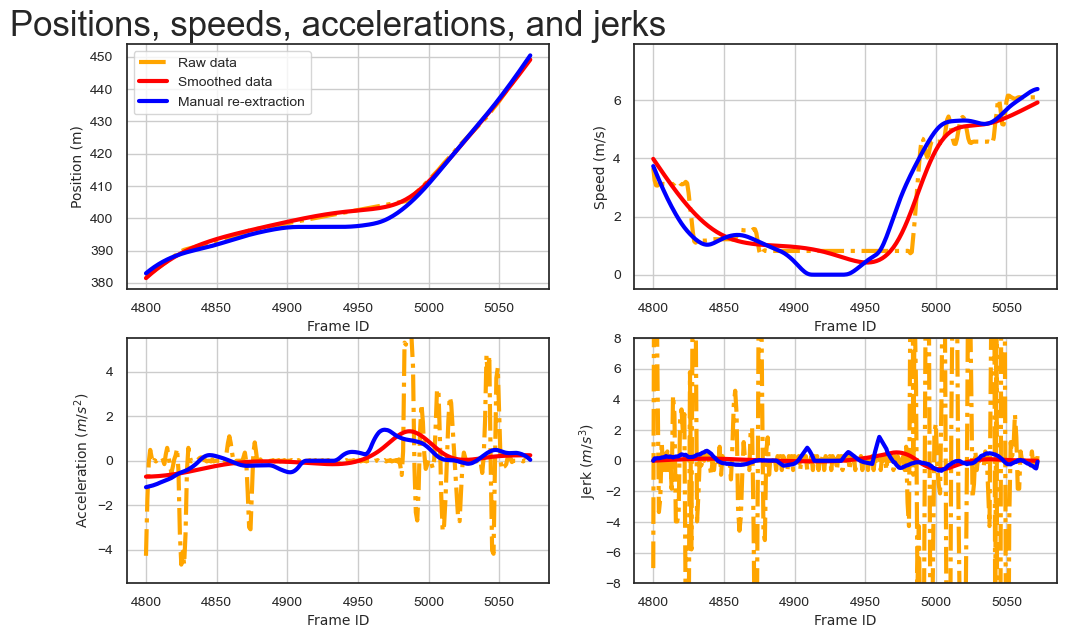

In [34]:
id_car=1486;id_num=[id_car,1478];plot_example(smooth_veh_j,sample_reextract,id_num)

In [75]:
#recalculate the positions
export_data = copy.deepcopy(smooth_veh_j)
export_data[:,3] = export_data[:,3] + export_data[:, -7] - export_data[:,-14]
export_data = pd.DataFrame(export_data[:, [0,1,2,3,4,5,-6,-5,-4]])
export_data.columns = ["vehicle_id", "frame_id", "travel_time", "local_y", "v_length", "front_vehicle", "speed","acceleration","jerk"]
export_data

,vehicle_id,frame_id,travel_time,local_y,v_length,front_vehicle,speed,acceleration,jerk
0,1.000,746.000,5.000,384.896,4.359,0.000,6.262,0.350,0.129
1,1.000,747.000,5.100,385.526,4.359,0.000,6.297,0.361,0.107
2,1.000,748.000,5.200,386.159,4.359,0.000,6.333,0.370,0.087
3,1.000,749.000,5.300,386.796,4.359,0.000,6.370,0.376,0.067
4,1.000,750.000,5.400,387.437,4.359,0.000,6.407,0.381,0.048
...,...,...,...,...,...,...,...,...,...
143612,1283.000,4131.000,12.800,444.982,4.206,0.000,10.710,1.599,0.082
143613,1283.000,4132.000,12.900,446.069,4.206,0.000,10.870,1.605,0.059
143614,1283.000,4133.000,13.000,447.172,4.206,0.000,11.030,1.609,0.039
143615,1283.000,4134.000,13.100,448.291,4.206,0.000,11.191,1.611,0.023


In [76]:
export_data.to_csv('minjerk_camera6.csv')

In [35]:
def displaySpectrum_smooth(data_j, data_reextract, data_id): #data_id = 1 for ngsim, data = 2 for highd
    import copy; from scipy.fftpack import fft
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    N = len(data_j); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency

    hat_a_hz = fft(data_j[:,-12],N); hat_j_hz = fft(data_j[:,-11],N); #raw data
    ja_hz = fft(data_j[:,-5],N); jj_hz = fft(data_j[:,-4],N); #Our method
    reex_a_hz = fft(data_reextract[:,-6],N); reex_j_hz = fft(data_reextract[:,-1],N)
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N;  
    mag_ja = 2*(np.absolute(ja_hz))/N; mag_jj = 2*(np.absolute(jj_hz))/N;
    mag_reex_a = 2*(np.absolute(reex_a_hz))/N; mag_reex_j = 2*(np.absolute(reex_j_hz))/N
    
    s1 = 15; font2 = {'weight' : 'normal', 'size' : 15,}; 
    plt.figure(figsize=(14,4)); plt.xticks(np.arange(0, 5.5, 0.5)) #plt.xlim(0,100)
    plt.subplot(1,2,1) 
    plt.title("Frequency spectrum (sample trajectory)",fontsize= 25)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_a[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2], mag_ja[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_reex_a[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 1); #plt.show()

    plt.subplot(1,2,2) 
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_j[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    plt.plot(frq[:len(frq) // 2], mag_jj[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_reex_j[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    plt.grid(True); 

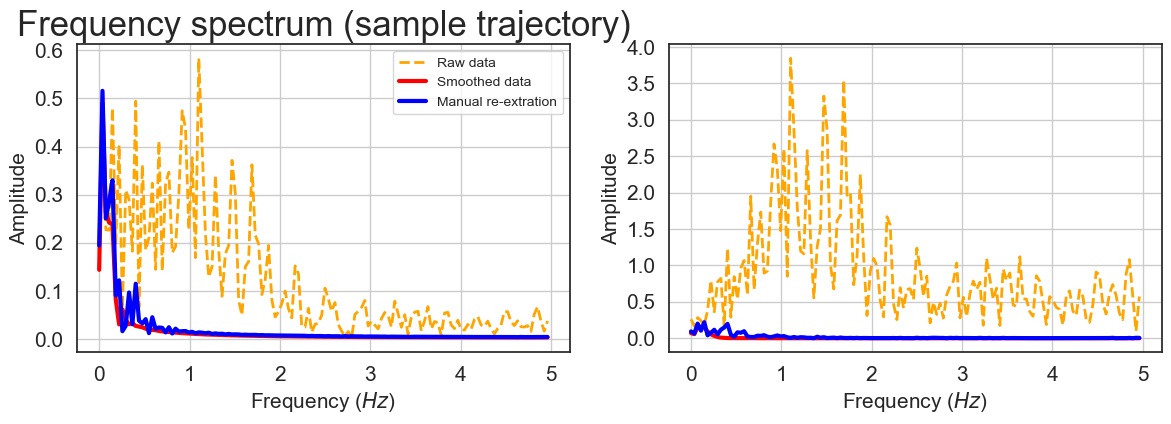

In [36]:
displaySpectrum_smooth(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])], sample_reextract[np.where(sample_reextract[:,0] == id_num[0])], data_id = 1)

### Comparison with an existing method with respect to manually re-extracted data
<table>
    <tr>
        <td colspan="2">Variables</td>
        <td>Raw data </td>
        <td>Multistep optimization </td>
        <td>Iterative moving average </td>
        <td>Our method </td>
        <td>Manual re-extraction </td>
    </tr>
    <tr>
        <td rowspan="1">Position ($m$)</td>
        <td> MSE </td>
        <td> 1.91 </td>
        <td> 2.18 </td>
        <td> 2.04 </td>
        <td> 1.87 </td>
        <td> / </td>
    </tr>
    <tr>
        <td rowspan="5">Speed($m/s$)</td>
        <td> Mean </td>
        <td>8.07 </td>
        <td>8.05 </td>
        <td>8.07 </td>
        <td>8.04 </td>
        <td>7.88 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 4.07</td>
        <td> 4.01</td>
        <td> 3.97</td>
        <td> 3.99</td>
        <td> 3.89</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [0,36.0]</td>
        <td>[0,27.0]</td>
        <td>[0,26.7]</td>
        <td> [0,27.2]</td>
        <td> [0,26.4]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td>MSE</td>
        <td>0.88 </td>
        <td>0.47 </td>
        <td>0.37 </td>
        <td>0.32 </td>
        <td>/ </td>
    </tr>
    <tr>
        <td rowspan="5">Acceleration ($m/s^2$)</td>
        <td> Mean </td>
        <td> -0.04</td>
        <td> -0.04</td>
        <td> -0.05</td>
        <td> -0.03</td>
        <td> 0.03</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 6.69</td>
        <td> 0.92</td>
        <td> 0.66</td>
        <td> 0.6</td>
        <td> 0.58</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-176.5,292.2]</td>
        <td> [-14.1,4.5]</td>
        <td> [-5.0,4.0]</td>
        <td> [-4.8,4.0]</td>
        <td> [-4.2,3.5]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> 15.0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td>MSE</td>
        <td> 44.56</td>
        <td> 0.68</td>
        <td> 0.4</td>
        <td> 0.25</td>
        <td> \</td>
    </tr>
    <tr>
        <td rowspan="5">Jerk ($m/s^3$)</td>
        <td> Mean </td>
        <td>  -0.17</td>
        <td>-0.13  </td>
        <td> -0.06</td>
        <td> -0.02</td>
        <td> -0.02</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 99.80</td>
        <td> 2.41</td>
        <td> 0.97</td>
        <td> 0.59</td>
        <td> 0.62</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-4171.5,2954.4]</td>
        <td> [-141.0,39.4]</td>
        <td> [-7.8,8.0]</td>
        <td> [-8.0,8.0]</td>
        <td> [-5.3,7.1]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td>42.3 </td>
        <td>  0.6</td>
        <td>0 </td>
        <td>0 </td>
        <td> 0</td>
    </tr>
    <tr>
        <td>MSE</td>
        <td> 9960.09</td>
        <td> 5.9</td>
        <td> 1.12</td>
        <td> 0.63</td>
        <td> / </td>
    </tr>
</table>

In [ ]:
'''The result of this module corresponds to Table 4 in the paper'''
def statistic(mo_x, x1, x2): #l2_x is multistep optimization data, x1 is denoise (among which x1[:,-14:-7] are the raw data), x2 is ground truth
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import copy
    true_data = copy.deepcopy(x2)
    true_data[:,5] = true_data[:,5] + true_data[:,9]
    derivatives = ["position     ", "speed        ","acceleration ","jerk         "]
    ground_truth_id = [5, -7, -6, -1] #  column number of position, speed, acceleration, jerk in the ground truth data
    multistep_id = [3, 4, 5, -1] #  column number of position, speed, acceleration, jerk in the multistep optimization data
    up = [200, 30, 4, 8] #upper bounds of derivatives of positions
    low = [-200, 0, -5, -8] #lower bounds of derivatives of positions
    for i in range(4):
        true_value = true_data[:,ground_truth_id[i] ] - x1[:,3] if i == 0 else true_data[:,ground_truth_id[i] ]
        print("++++++++++++++++Raw data++++++++++++++++")
        raw = x1[:,-14+i] - x1[:,-14] if i == 0 else x1[:,-14+i] #data smoothed by multistep optimization method
        mse_test0 = mean_squared_error(raw, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mean_x0 = round(np.mean(raw),2); max_x0 = round(np.max(raw),1); min_x0 = round(np.min(raw),1); std_x0 = round(np.std(raw),2)
        outlier0 = round(100*len(raw[np.where((np.round(raw[:],5) > up[i]) | (np.round(raw[:],5) < low[i]))])/len(raw),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x0, "Std: ", std_x0, "Range: [", min_x0, max_x0, "]  Outlier: ", outlier0, "mse: ", round(mse_test0,2) ); 
        print("+++++++++Multistep optimiztaion+++++++++")
        multistep_smooth = mo_x[:,multistep_id[i]] - x1[:,3] if i == 0 else mo_x[:,multistep_id[i]] #data smoothed by multistep optimization method
        mse_test1 = mean_squared_error(multistep_smooth, true_value) #mean squared error between the multistep optimiztaion smoothed data and ground truth
        mean_x1 = round(np.mean(multistep_smooth),2); max_x1 = round(np.max(multistep_smooth),1); min_x1 = round(np.min(multistep_smooth),1); std_x1 = round(np.std(multistep_smooth),2)
        outlier1 = round(100*len(multistep_smooth[np.where((np.round(multistep_smooth[:],5) > up[i]) | (np.round(multistep_smooth[:],5) < low[i]))])/len(multistep_smooth),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x1, "Std: ", std_x1, "Range: [", min_x1, max_x1, "]  Outlier: ", outlier1, "mse: ", round(mse_test1,2) ); 
        print("+++++++++++++Our method+++++++++++++++++")
        smoothed = x1[:,-7] - x1[:,-14] if i == 0 else x1[:,-7+i] #data smoothed by our method
        mse_test2 = mean_squared_error(smoothed, true_value) #mean squared error between our smoothed data and ground truth
        mean_x2 = round(np.mean(smoothed),2); max_x2 = round(np.max(smoothed),1); min_x2 = round(np.min(smoothed),1); std_x2 = round(np.std(smoothed),2)
        outlier2 = round(100*len(smoothed[np.where((np.round(smoothed[:],5) > up[i]) | (np.round(smoothed[:],5) < low[i]))])/len(smoothed),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x2, "Std: ", std_x2, "Range: [", min_x2, max_x2, "]  Outlier: ", outlier2, "mse: ", round(mse_test2,2) ); 
        print("+++++++++Manual re-extraction+++++++++++")
        rextracted = true_data[:, ground_truth_id[i]] - x1[:,3] if i == 0 else true_data[:, ground_truth_id[i]] #data smoothed by our method
        mse_test3 = mean_squared_error(rextracted, true_value) # always zero
        mean_x3 = round(np.mean(rextracted),2); max_x3 = round(np.max(rextracted),1); min_x3 = round(np.min(rextracted),1); std_x3 = round(np.std(rextracted),2)
        outlier3 = round(100*len(rextracted[np.where((np.round(rextracted[:],5) > up[i]) | (np.round(rextracted[:],5) < low[i]))])/len(rextracted),1)
        print("derivative: ", derivatives[i], "Mean: ", mean_x3, "Std: ", std_x3, "Range: [", min_x3, max_x3, "]  Outlier: ", outlier3, "mse: ", round(mse_test3,2) ); 
    
statistic(veh_multistep_pd.values, smooth_veh_j, veh_reextract_pd.values) 

In [38]:
def displaySpectrum_smoothall(data_qp, data_mo, data_reex, data_id): #data_id = 1 for NGSIM, data_id = 2 for highd
    import copy; from scipy.fftpack import fft
    import seaborn as sns
    from scipy import fftpack, arange; import matplotlib.pyplot as plt
    from pylab import plot, show, title, xlabel, ylabel, subplot
    if data_id == 1:
        N = len(data_qp); duration = N*0.1; dt = 0.1 #duration and sampling step(s)
    elif data_id == 2:
        N = len(data_qp); duration = N*0.04; dt = 0.04 #duration and sampling step(s)
    fs = 1/dt; #sampling frequency
    series_raw = copy.deepcopy(data_qp);  
    hat_a_hz = fft(series_raw[:,9],N); hat_j_hz = fft(series_raw[:,10],N); #raw data
    moa_hz = fft(data_mo[:,5],N); moj_hz = fft(data_mo[:,9],N) #Multistep optimization
    qpa_hz = fft(data_qp[:,-5],N); qpj_hz = fft(data_qp[:,-4],N); #Our method
    reex_a_hz = fft(data_reex[:,-6],N); reex_j_hz = fft(data_reex[:,-1],N)
    
    frq = np.linspace(0, fs, N)
    raw_a = 2*(np.absolute(hat_a_hz))/N; raw_j = 2*(np.absolute(hat_j_hz))/N; #raw data
    mag_moa = 2*(np.absolute(moa_hz))/N; mag_moj = 2*(np.absolute(moj_hz))/N; #Multistep optimization
    mag_qpa = 2*(np.absolute(qpa_hz))/N; mag_qpj = 2*(np.absolute(qpj_hz))/N; #Our method
    mag_reex_a = 2*(np.absolute(reex_a_hz))/N; mag_reex_j = 2*(np.absolute(reex_j_hz))/N
    
    s1 = 15; font2 = {'weight' : 'normal', 'size' : s1,}; 
    sns.set(rc={"figure.figsize": (14,4)}, style="white", palette=None)
    
    plt.figure(figsize=(14,4)); plt.xticks(np.arange(0, 5.5, 0.5)) #plt.xlim(0,100)
    plt.subplot(1,2,1)
    plt.title("Frequency spectrum", fontsize = 25)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_a[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_moa[:len(frq) // 2], color = "g", linewidth=3, label = "Multistep optimization");
        plt.plot(frq[:len(frq) // 2], mag_qpa[:len(frq) // 2], color = "r", linewidth=3, label = "Our method"); 
        plt.plot(frq[:len(frq) // 2],mag_reex_a[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration"); 
    elif data_id == 2:
        plt.plot(frq[:len(frq) // 2], mag_qpa[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    plt.grid(True); plt.legend(fontsize=10, loc = 1); #plt.show()
    
    plt.subplot(1,2,2)
    plt.ylabel("Amplitude",font2); plt.xlabel("Frequency ($Hz$)",font2)
    plt.xticks(fontsize=s1); plt.yticks(fontsize=s1)
    plt.plot(frq[:len(frq) // 2],raw_j[:len(frq) // 2], color = "orange", linewidth=2, linestyle='--', label = "Raw data");
    if data_id == 1:
        plt.plot(frq[:len(frq) // 2],mag_moj[:len(frq) // 2], color = "g", linewidth=3, label = "Multistep optimization");
        plt.plot(frq[:len(frq) // 2], mag_qpj[:len(frq) // 2], color = "r", linewidth=3, label = "Our method"); 
        plt.plot(frq[:len(frq) // 2],mag_reex_j[:len(frq) // 2], color = "b", linewidth=3, label = "Manual re-extration");
    elif data_id == 2:
        plt.plot(frq[:len(frq) // 2], mag_qpj[:len(frq) // 2], color = "r", linewidth=3, label = "Smoothed data"); 
    plt.grid(True); 

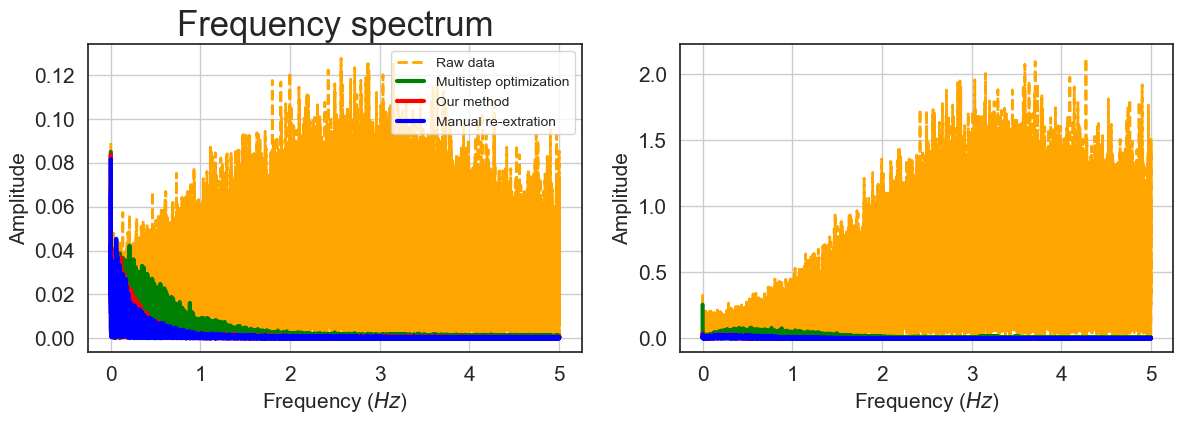

In [39]:
displaySpectrum_smoothall(smooth_veh_j, veh_multistep_pd.values, veh_reextract_pd.values, data_id = 1)

### Application to the highD dataset

- Collected via cameras carried by drones
- No speed limit on the recorded segment
- Speed range: $[0,50] m/s$; acceleration range $[-5,4] m/s^2$; jerk range $[-8,8] m/s^3$
- Prior position error $0.1 m$
- Choose vehicle 1011 as an example and then apply our method to the entire dataset

In [40]:
veh_traj_highd = pd.read_csv('25_tracks.csv', usecols = ['id','frame','laneId','x','width', 'precedingId','followingId'])
order = ['id','frame','laneId','x','width', 'precedingId','followingId']
veh_traj_highd = veh_traj_highd[order]

#add 14 columns at the end, called "distance", "velocity", "acceleration", "jerk", "snap", "spacing", and "relative speed"
veh_traj_highd['distance'] = 0; veh_traj_highd['velocity'] = 0; veh_traj_highd['acceleration'] = 0 ; veh_traj_highd['jerk'] = 0 ; veh_traj_highd['snap'] = 0
veh_traj_highd['delta_x'] = 0; veh_traj_highd['delta_v'] = 0
veh_traj_highd['smooth_x'] = 0; veh_traj_highd['smooth_v'] = 0; veh_traj_highd['smooth_a'] = 0; veh_traj_highd['smooth_j'] = 0; veh_traj_highd['smooth_s'] = 0
veh_traj_highd['smooth_delta_x'] = 0; veh_traj_highd['smooth_delta_v'] = 0

In [41]:
def calc_time_highd(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order,data_id):
    import time; time_list = []
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    T1_j = time.time()
    smooth_veh_jerk, smooth_veh_l2j = method_application(veh_traj, down_vel, up_vel, down_acc, up_acc, down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order,data_id)
    T2_j = time.time(); 
    time_list.append(round((T2_j - T1_j),3))
    print("time_list", time_list)

    return smooth_veh_jerk, time_list, smooth_veh_l2j
down_vel = 0; up_vel = 50; down_acc = -5; up_acc = 4; down_jerk = -8; up_jerk = 8; down_snap = -12; up_snap = 12; 
delta_t = 0.04; est_acc = 0.1; unique = 1; non_unique = 0; highest_order = 3
 
id_car = 1011
id_num = [id_car, 1005] # sample vehicle and its front vehicle
smooth_veh_highd, run_time_highd, smooth_l2_highd = calc_time_highd(veh_traj_highd, down_vel, up_vel, down_acc, up_acc, 
                                               down_jerk, up_jerk, down_snap, up_snap, delta_t, est_acc, unique, highest_order,data_id=2) #[veh_traj['id'].isin(id_num)]
pd.DataFrame(smooth_veh_highd, columns = ['id','frame','laneId','x','width', 'precedingId','followingId', 'x', 'v', 'a', 'j', 's', 'delta_x', 'delta_v', 'smooth_x', 'smooth_v', 'smooth_a', 'smooth_j', 'smooth_s', 'smooth_deltax', 'smooth_deltav'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++min jerk+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
pos_error 0.05234977394201237 $m$
time_list [3997.217]


,id,frame,laneId,x,width,precedingId,followingId,x,v,a,...,s,delta_x,delta_v,smooth_x,smooth_v,smooth_a,smooth_j,smooth_s,smooth_deltax,smooth_deltav
0,1.000,1.000,0.000,366.390,5.150,0.000,5.000,4.000,0.000,0.000,...,0.000,0.000,0.000,3.979,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,2.000,0.040,366.980,5.150,0.000,5.000,4.590,14.750,25.000,...,0.000,0.000,0.000,4.602,15.590,4.000,0.000,0.000,0.000,0.000
2,1.000,3.000,0.080,367.610,5.150,0.000,5.000,5.220,15.750,6.250,...,11718.750,0.000,0.000,5.232,15.750,3.680,-8.000,0.000,0.000,0.000
3,1.000,4.000,0.120,368.250,5.150,0.000,5.000,5.860,16.000,6.250,...,-3906.250,0.000,0.000,5.868,15.897,3.360,-8.000,0.000,0.000,0.000
4,1.000,5.000,0.160,368.900,5.150,0.000,5.000,6.510,16.250,0.000,...,7812.500,0.000,0.000,6.510,16.032,3.040,-8.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019747,2850.000,29456.000,1.120,21.750,5.860,2845.000,0.000,17.800,12.000,-6.250,...,0.000,0.000,0.000,17.882,12.150,-0.911,-0.052,0.862,0.000,0.000
2019748,2850.000,29457.000,1.160,22.220,5.860,2845.000,0.000,18.270,11.750,6.250,...,-7812.500,0.000,0.000,18.367,12.114,-0.911,-0.017,0.431,0.000,0.000
2019749,2850.000,29458.000,1.200,22.700,5.860,2845.000,0.000,18.750,12.000,6.250,...,-7812.500,0.000,0.000,18.850,12.077,-0.911,-0.000,0.000,0.000,0.000
2019750,2850.000,29459.000,1.240,23.190,5.860,2845.000,0.000,19.240,12.250,-6.250,...,0.000,0.000,0.000,19.332,12.041,-0.911,0.000,0.000,0.000,0.000


In [77]:
#recalculate the positions
export_highd = copy.deepcopy(smooth_veh_highd)
export_highd[:,3] = export_highd[:,3] + export_highd[:, -7] - export_highd[:,-14]
export_highd = pd.DataFrame(export_highd[:, [0,1,2,3,5,6,-6,-5,-4]])
export_highd.columns = ["vehicle_id", "frame_id", "travel_time", "local_y", "v_length", "front_vehicle", "speed","acceleration","jerk"]
export_highd

,vehicle_id,frame_id,travel_time,local_y,v_length,front_vehicle,speed,acceleration,jerk
0,1.000,1.000,0.000,366.369,0.000,5.000,0.000,0.000,0.000
1,1.000,2.000,0.040,366.992,0.000,5.000,15.590,4.000,0.000
2,1.000,3.000,0.080,367.622,0.000,5.000,15.750,3.680,-8.000
3,1.000,4.000,0.120,368.258,0.000,5.000,15.897,3.360,-8.000
4,1.000,5.000,0.160,368.900,0.000,5.000,16.032,3.040,-8.000
...,...,...,...,...,...,...,...,...,...
2019747,2850.000,29456.000,1.120,21.832,2845.000,0.000,12.150,-0.911,-0.052
2019748,2850.000,29457.000,1.160,22.317,2845.000,0.000,12.114,-0.911,-0.017
2019749,2850.000,29458.000,1.200,22.800,2845.000,0.000,12.077,-0.911,-0.000
2019750,2850.000,29459.000,1.240,23.282,2845.000,0.000,12.041,-0.911,0.000


In [78]:
export_highd.to_csv('minjerk_highd.csv')

In [42]:
def plot_example_highd(smooth_veh_j, id_num):
    font1 = 10; lo = 2; line = 3; line2 = 3; line3 = 3; s1 = 10
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    y_axis = ["Position (m)", "Speed (m/s)", "Acceleration ($m/s^2$)", "Jerk ($m/s^3$)"]
    raw_id = [-13, -12, -11]; smooth_id = [-6, -5, -4];
    lower_bound = [-0.5, -5.5, -8]; upper_bound = [np.max(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-6])+2, 5.5, 8]
    plt.figure(figsize=(12,7));
    plt.subplot(2,2,1)
    plt.title("Positions, speeds, accelerations, and jerks",fontsize= 25)
    plt.ylabel(y_axis[0],font2); plt.xlabel("Frame ID",font2)
    plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],np.abs(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3]-smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][0,3]), color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
    plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,1],np.abs(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,3]-smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][0,3])+smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-7]-smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][:,-14], color = "r", linewidth= line2, label = "Smoothed data"),
    plt.grid(); plt.legend(fontsize=font1); #plt.show() , loc = lo
   
    for i in range(1,4):
        plt.subplot(2,2,i+1)
        plt.ylabel(y_axis[i],font2); plt.xlabel("Frame ID",font2)
        plt.xticks(fontsize= s1); plt.yticks(fontsize= s1)
        plt.ylim(lower_bound[i-1],upper_bound[i-1])
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,raw_id[i-1]], color = "orange", linewidth=line, linestyle='-.', label = "Raw data"); 
        plt.plot(smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,1],smooth_veh_j[np.where(smooth_veh_j[:,0]==id_num[0])][2:,smooth_id[i-1]], color = "r", linewidth= line2, label = "Smoothed data");
        plt.grid(True); #plt.show()
        plt.legend([],[], frameon=False) #remove the ledgend  

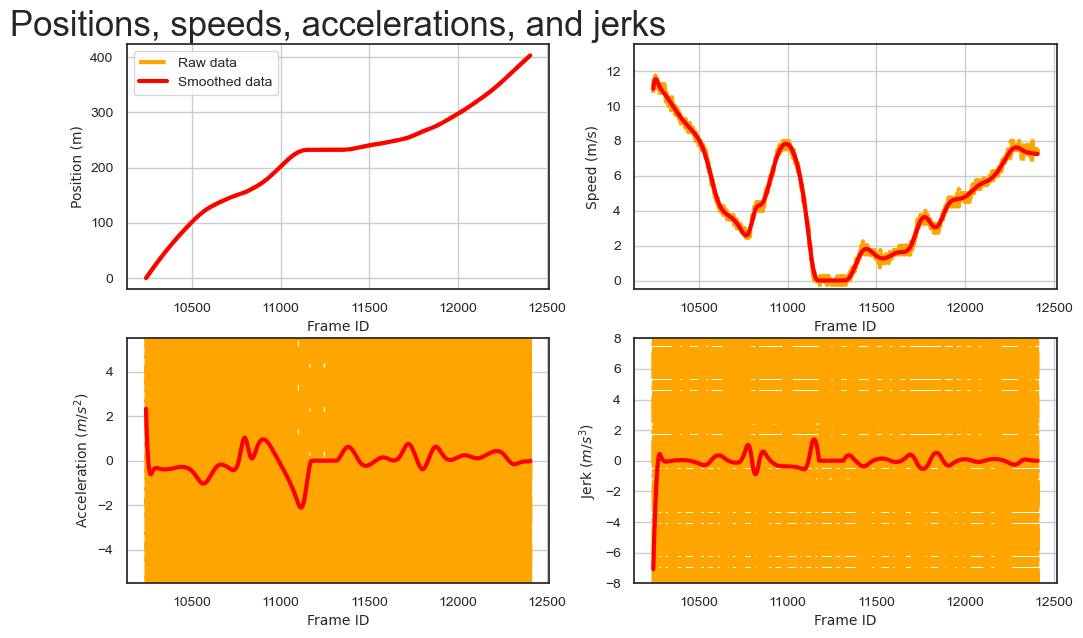

In [43]:
id_car=1011;id_num =[id_car,1005];plot_example_highd(smooth_veh_highd,id_num)

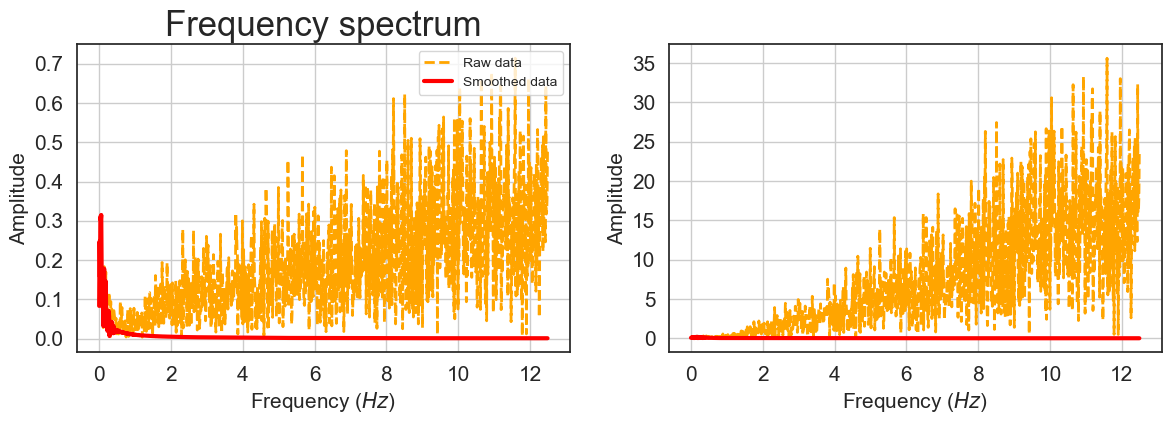

In [44]:
displaySpectrum_smoothall(smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], smooth_veh_highd[np.where(smooth_veh_highd[:,0]==id_num[0])], data_id = 2)

In [45]:
#statistic inditations
def statistic_highd(x1,x2, low, up): #x1 is denoise, x2 is raw data
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    mse_test = mean_squared_error(x2,x1) #mean squared error between the smoothed and raw data
    rmse_test = mse_test ** 0.5 #root mean squared error between the smoothed and raw data
    mae_test = mean_absolute_error(x2,x1) #mean absolute error between the smoothed and raw data
    print("mse :", round(mse_test,2), "mae :", round(mae_test,2), "absolute mean", round(np.mean(np.abs(x1)),2) ); #"rmse :",round(rmse_test,3), 
    print("+++++++++Raw data++++++++")
    mean_x = np.mean(x2); max_x = np.max(x2); min_x = np.min(x2); std_x = np.std(x2)
    print("mean :",round(mean_x,2), "range: [", round(min_x,1), round(max_x,1), "]; std :", round(std_x, 2) )
    outlier = len(x2[np.where((np.round(x2[:],5) > up) | (np.round(x2[:],5) < low))])/len(x2)
    print("outlier %", np.round(outlier*100,1))
    print("++++++Smoothed data++++++")
    mean_x = np.mean(x1); max_x = np.max(x1); min_x = np.min(x1); std_x = np.std(x1)
    print("mean :",round(mean_x,2), "range: [", round(min_x,1), round(max_x,1), "]; std :", round(std_x, 2) )
    outlier = len(x1[np.where((np.round(x1[:],5) > up) | (np.round(x1[:],5) < low))])/len(x1)
    print("outlier %", np.round(outlier*100,1))
    
print("----------------------------------position residual------------------------------------------")
statistic_highd(smooth_veh_highd[:,-7]-smooth_veh_highd[:,-14], smooth_veh_highd[:,-14]-smooth_veh_highd[:,-14], -200, 200) 
print("----------------------------------------speed------------------------------------------------")
statistic_highd(smooth_veh_highd[:,-6], smooth_veh_highd[:,-13], 0, 50) 
print("-------------------------------------acceleration--------------------------------------------")
statistic_highd(smooth_veh_highd[:,-5], smooth_veh_highd[:,-12], -5, 4) 
print("----------------------------------------jerk-------------------------------------------------")
statistic_highd(smooth_veh_highd[:,-4], smooth_veh_highd[:,-11], -8, 8) 

----------------------------------position residual------------------------------------------
mse : 0.0 mae : 0.05 absolute mean 0.05
+++++++++Raw data++++++++
mean : 0.0 range: [ 0.0 0.0 ]; std : 0.0
outlier % 0.0
++++++Smoothed data++++++
mean : 0.0 range: [ -0.9 0.8 ]; std : 0.06
outlier % 0.0
----------------------------------------speed------------------------------------------------
mse : 0.05 mae : 0.17 absolute mean 13.87
+++++++++Raw data++++++++
mean : 13.87 range: [ -6.0 35.3 ]; std : 7.7
outlier % 0.1
++++++Smoothed data++++++
mean : 13.87 range: [ -0.0 34.7 ]; std : 7.7
outlier % 0.0
-------------------------------------acceleration--------------------------------------------
mse : 41.1 mae : 4.5 absolute mean 0.36
+++++++++Raw data++++++++
mean : 0.07 range: [ -200.0 231.2 ]; std : 6.45
outlier % 57.9
++++++Smoothed data++++++
mean : 0.04 range: [ -4.6 4.0 ]; std : 0.54
outlier % 0.0
----------------------------------------jerk---------------------------------------------

<span style="color:black; font-size:150%"> Statistic summary of the raw and smoothed datasets
<table>
    <tr>
        <td colspan="2">Dataset</td>
        <td>Variables </td>
        <td>Position residual ($m$) </td>
        <td>Speed ($m/s$) </td>
        <td>Acceleration $m/s^2$ </td>
        <td>Jerk $m/s^3$ </td>
    </tr>
    <tr>
        <td rowspan="9">HighD</td>
        <td rowspan="4"> Raw data </td>
        <td> Mean </td>
        <td> / </td>
        <td> 13.87 </td>
        <td> 0.07 </td>
        <td> -0.39 </td>
    </tr>
    <tr>
        <td> Std </td>
        <td> / </td>
        <td> 7.70 </td>
        <td> 6.45 </td>
        <td> 267.76 </td>
    </tr>
    <tr>
        <td> Range </td>
        <td> / </td>
        <td> [-6.0,35.3] </td>
        <td> [-200.0, 231.2] </td>
        <td> [-7656.2,9062.5] </td>
    </tr>
    <tr>
        <td> Outliers (%)</td>
        <td> / </td>
        <td>0.1 </td>
        <td>57.9 </td>
        <td>74.2 </td>
    </tr>
    <tr>
        <td rowspan="5"> Smoothed data </td>
        <td> Mean </td>
        <td> 0</td>
        <td> 13.87</td>
        <td> 0.04</td>
        <td> -0.11</td>
    </tr>
    <tr>
        <td> Std </td>
        <td> 0.06</td>
        <td> 7.70</td>
        <td> 0.54</td>
        <td> 0.92</td>
    </tr>
    <tr>
        <td>Range </td>
        <td> [-0.9,0.8]</td>
        <td>[0,34.7]</td>
        <td> [-4.6,4.0]</td>
        <td> [-8.0,8.0]</td>
    </tr>
    <tr>
        <td>Outliers (%)</td>
        <td> /</td>
        <td> 0</td>
        <td> 0</td>
        <td> 0</td>
    </tr>
    <tr>
        <td> $E(|\tilde{\textbf{x}}-\textbf{x}|)$ </td>
        <td>0.05 </td>
        <td>/ </td>
        <td>/ </td>
        <td>/ </td>
    </tr>
</table>

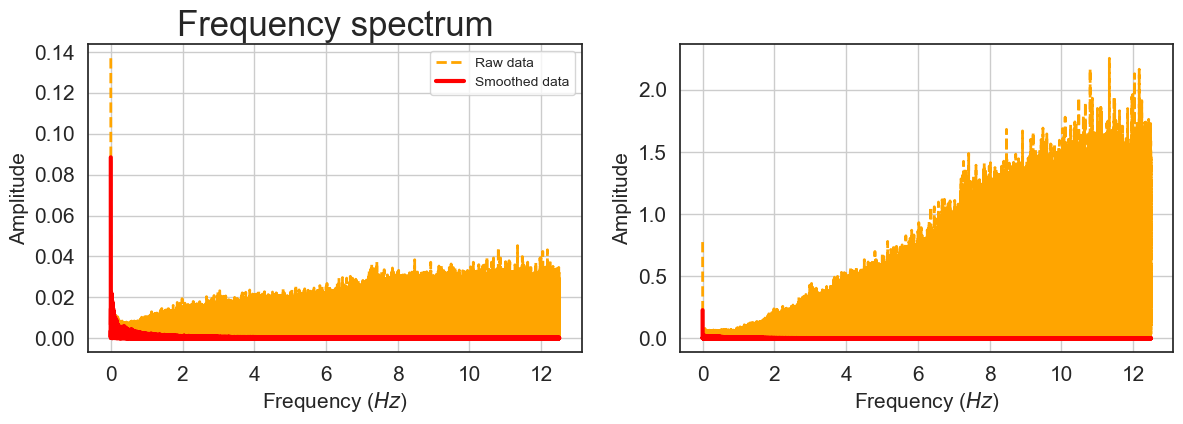

In [46]:
displaySpectrum_smoothall(smooth_veh_highd, smooth_veh_highd, smooth_veh_highd, data_id = 2)

## Conclusion
- Summary
    - Elements that are considered
        - Discrepancy
        - Roughness
        - Bounded derivatives of positions
        - Prior position errors
    - Methodology
        - Step 1: minimization of the discrepancy between the half-smoothed and raw positions 
        - Step 2: minimization of the sum of squared highest order derivatives
    - Properties
        - Always yield unique optimal solutions
    - Numerical applications
        - Effectively remove outliers and high-frequency noises
        - Outperform the existing method 
        - Closely resemble those manually re-extracted data

- Contribution
    - Define speeds and higher order derivatives as symplectic differences in positions and discuss the properties of resulted difference matrices, form the foundation of the ensuing formulation of our method
    - Introduce a novel method to effectively smooth longitudinal vehicle trajectory data
    - Theoretically prove the existence and uniqueness of solutions
    - Demonstrate that a highest order of three yields an efficient method and smoothed trajectories comparable to manually re-extracted ones
- Future extension
    - Incorporating the equality constraints using moments into our method
    - Smooth longitudinal trajectories obtained from other sources
    - Smooth lateral vehicle trajectories
    - Trajectory imputation (handle trajectories with missing values)
    - Trajectory planning and design

# Quadratic programming method for vehicle trajectory imputation using fixed and mobile sensor data

### Prework: construct the dataset to be imputed

- Randomly pick out 50, 40, 30, and 25 platoons consist of 3, 4, 5, and 6 vehicle in the NGSIM dataset and highD dataset, respectively

In [1]:
# Pick out the platoons of 3, 4, 6, and 6 vehicles in the NGSIM and highD datasets.
'''three successive vehicles'''
three_set1 = [[163,169,187], [356,360,365], [466,475,482], [470,479,486], [572,575,587], [646,666,679], [886,902,904], [939,967,973], [987,997,1004], [1014,1026,1029], 
             [1125,1131,1137], [1192,1198,1213], [1235,1243,1251], [1200,1214,1215], [1232,1241,1240], [1212,1216,1224], [1218,1228,1231], [1292,1304,1309], [1343,1353,1365], [1287,1291,1305], 
             [1332,1341,1346], [1481,1485,1489], [1463,1478,1486], [1425,1435,1445], [1454,1460,1467], [1479,1482,1490], [1496,1491,1503], [1479,1482,1490], [1483,1487,1501], [1497,1506,1512], 
             [1507,1518,1522], [1509,1528,1534], [1553,1557,1562], [1751,1750,1759], [1821,1829,1845], [1851,1861,1868], [1873,1882,1887], [1898,1927,1929], [1951,1941,1961], [1992,1984,1998], 
             [2006,2019,2022], [2035,2042,2050], [2102,2098,2105], [2194,2205,2236], [2341,2347,2352], [2382,2391,2395], [2461,2459,2473], [2486,2765,2775], [2774,2796,2809], [2842,2853,2866]]
'''four successive vehicles'''
four_set1 =[[55,54,59,60], [117,3340,142,159], [356,360,365,373], [466,475,482,485], [470,479,486,493], 
           [514,522,525,537], [572,575,587,625], [580,588,3361,615], [795,794,842,853], [886,902,904,907], 
           [987,997,1004,1025], [1192,1198,1213,1223], [1235,1243,1251,1259], [1200,1214,1215,1219], [1232,1241,1240,1252], 
           [1212,1216,1224,1222], [1218,1228,1231,1238], [1292,1304,1309,1314], [1382,1390,1406,1417], [1287,1291,1305,1307], 
           [1441,1444,1456,1463], [1486,1497,1506,1512], [1507,1518,1522,1529], [1425,1435,1445,1454], [1479,1482,1490,1496], 
           [1507,1518,1522,1529], [1483,1487,1501,1509], [1553,1557,1562,1572], [1616,1628,1651,1670], [1821,1829,1845,1851], 
           [1873,1882,1887,1898], [1951,1941,1961,1992], [2006,2019,2022,2035], [2102,2098,2105,2116], [2194,2205,2236,2254], 
           [2341,2347,2352,2358], [2382,2391,2395,2405], [2461,2459,2473,2474], [2486,2765,2775,2774], [2842,2853,2866,2870]]
'''five successive vehicles'''
five_set1 = [[173,176,183,192,193], [356,360,365,373,380], [466,475,482,485,504], [514,522,525,537,559], [572,575,587,625,640], 
            [886,902,904,907,914], [1192,1198,1213,1223,1233], [1235,1243,1251,1259,1260], [1200,1214,1215,1219,1226], [1232,1241,1240,1252,1266], 
            [1212,1216,1224,1222,1229], [1218,1228,1231,1238,1239], [1292,1304,1309,1314,1318], [1333,1338,1343,1353,1365], [1287,1291,1305,1307,1317], 
            [1425,1435,1445,1454,1460], [1478,1486,1497,1506,1512], [1479,1482,1490,1496,1491], [1483,1487,1501,1509,1528], [1553,1557,1562,1572,1592], 
            [1821,1829,1845,1851,1861], [1873,1882,1887,1898,1927], [1951,1941,1961,1992,1984], [2006,2019,2022,2035,2042], [2102,2098,2105,2116,2119], 
            [2341,2347,2352,2358,2367], [2382,2391,2395,2405,2411], [2461,2459,2473,2474,2481], [2486,2765,2775,2774,2796], [2842,2853,2866,2870,2880]]
'''six successive vehicles'''
six_set1 = [[87,90,93,97,112,116], [103,3333,115,124,136,140], [146,162,164,168,179,185], [189,197,202,210,213,222], [356,360,365,373,380,389], 
           [466,475,482,485,504,508], [470,479,486,493,512,517], [514,522,525,537,559,567], [580,588,3361,615,628,638], [795,794,842,853,855,870], 
           [886,902,904,907,914,927], [1292,1304,1309,1314,1318,1326], [1463,1478,1486,1497,1506,1512], [1425,1435,1445,1454,1460,1467], [1483,1487,1501,1509,1528,1534], 
           [1821,1829,1845,1851,1861,1868], [1873,1882,1887,1898,1927,1929], [1951,1941,1961,1992,1984,1998], [2006,2019,2022,2035,2042,2050], [2102,2098,2105,2116,2119,2134], 
           [2341,2347,2352,2358,2367,2381], [2382,2391,2395,2405,2411,2426], [2461,2459,2473,2474,2481,2497], [2486,2765,2775,2774,2796,2809], [2842,2853,2866,2870,2880,2897]]
'''three successive vehicles: 50 samples'''
three_set2 = [[216,221,226], [238,242,250], [251,258,264], [263,268,273], [277,281,287], [292,295,300], [304,310,319], [310,319,338], [314,321,327], [332,339,343], 
             [341,346,354], [352,355,361], [359,366,375], [360,364,365], [369,372,376], [377,382,387], [386,389,393], [428,440,453], [448,452,457], [450,460,467],
             [465,473,501], [865,876,885], [895,905,911], [971,974,977], [1005,1011,1016], [1096,1100,1107], [1212,1219,1227], [1279,1286,1293], [1300,1303,1309], [1305,1312,1324], 
             [1332,1336,1342], [1355,1359,1367], [1398,1402,1404], [1404,1409,1413], [1417,1423,1429], [1448,1451,1459], [1472,1477,1485], [1663,1668,1673], [1725,1729,1734], [1757,1762,1767], 
             [1809,1815,1824], [1883,1889,1897], [2393,2397,2403], [2408,2416,2420], [2411,2417,2422], [2444,2450,2454], [2470,2477,2479], [2486,2490,2493], [2543,2547,2552], [2561,2566,2576]] 
'''four successive vehicles: 35 samples'''
four_set2 = [[238,242,250,259], [245,251,258,264], [251,258,264,267], [292,295,300,304], [295,300,304,310], 
            [301,309,314,321], [309,314,321,327], [346,354,360,364], [350,359,366,375], [405,410,415,418], 
            [410,415,418,422], [440,453,465,473], [398,403,406,412], [420,427,435,442], [509,517,524,529], 
            [1001,1005,1011,1016], [1005,1011,1016,1025], [1279,1286,1293,1300], [1300,1303,1309,1316], [1303,1309,1316,1320], 
            [1355,1359,1367,1371], [1393,1406,1417,1423], [1688,1691,1697,1700], [1743,1747,1755,1757], [1774,1777,1780,1786], 
            [1820,1828,1832,1839], [1398,1402,1404,1409], [1844,1851,1862,1867], [1855,1863,1869,1873], [1903,1905,1922,1932], 
            [2350,2361,2372,2376], [2391,2395,2400,2407], [2411,2417,2422,2427], [2444,2450,2454,2462], [2485,2486,2490,2493], 
            [2487,2496,2507,2513], [2493,2497,2502,2508], [2494,2500,2518,2528], [2512,2517,2524,2530], [2533,2540,2542,2550]] 
'''five successive vehicles: 30 samples'''
five_set2 = [[245,251,258,264,267], [295,300,304,310,319], [301,309,314,321,327], [346,354,360,364,365], [364,365,369,372,376], 
            [386,389,393,397,402], [393,397,402,405,410], [401,408,428,440,453], [405,410,415,418,422], [440,453,465,473,501], 
            [450,460,467,475,483], [460,467,475,483,488], [509,517,524,529,535], [1001,1005,1011,1016,1025], [1279,1286,1293,1300,1303], 
            [1300,1303,1309,1316,1320], [1398,1402,1404,1409,1413], [1643,1648,1653,1657,1667], [1653,1657,1667,1675,1681], [1700,1702,1707,1710,1717], 
            [1747,1755,1757,1762,1767], [1834,1844,1851,1862,1867], [1855,1863,1869,1873,1882], [2397,2403,2408,2416,2420], [2411,2417,2422,2427,2432],
            [2489,2494,2500,2518,2528], [2482,2485,2486,2490,2493], [2487,2496,2507,2513,2519], [2508,2512,2517,2524,2530], [2607,2613,2620,2632,2639]] 
'''six successive vehicles: 25 samples'''
six_set2 = [[182,190,194,198,205,208], [292,295,300,304,310,319], [341,346,354,360,364,365], [360,364,365,369,372,376], [386,389,393,397,402,405], 
           [402,405,410,415,418,422], [410,415,418,422,425,430], [428,440,453,465,473,501], [450,460,467,475,483,488], [994,1001,1005,1011,1016,1025], 
           [1279,1286,1293,1300,1303,1309], [1635,1643,1648,1653,1657,1667], [1643,1648,1653,1657,1667,1675], [1648,1653,1657,1667,1675,1681], [1688,1691,1697,1700,1702,1707], 
           [1697,1700,1702,1707,1710,1717], [1743,1747,1755,1757,1762,1767], [1809,1815,1824,1834,1844,1851], [1824,1834,1844,1851,1862,1867], [2393,2397,2403,2408,2416,2420], 
           [2469,2473,2476,2482,2485,2486], [2476,2482,2485,2486,2490,2493], [2489,2494,2500,2518,2528,2533], [2500,2518,2528,2533,2540,2542], [2502,2508,2512,2517,2524,2530]]
#The one is set by previously we ramdonly pick out the label of CAV and CV (10% CAV and 10% CV), 
#CAVs can detect the trajectories of its front and following vehicles, CVs can only report their own trajectories
net_traj = [[1552,1557,1565,1570,1574],
            [1578],[1584,1591,1596,1603],
            [1603,1607,1615,1618,1621,1627,1635,1643],
            [1653],[1657,1667,1675,1681,1688,1691],
            [1691,1697,1700,1702,1707,1710],
            [1717],[1721,1725,1729,1734],
            [1743],[1747,1755,1757,1762,1767]]

In [48]:
def group(platoon, data, data_id):
    import copy
    n_id = platoon #pick out the vehicle in a platoon 1456, ,1506 [1867,3352,1877,1885,1890]
    if data_id == 0:
        new_array = data[data["id"].isin(n_id)]
    elif data_id == 1:
        new_array = data[data["Vehicle_ID"].isin(n_id)]
    new_array_np = new_array.values #the array format that can apply numpy
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index)#pick out all the ids, and create a list to store them
    #print(new_array_np[:,3].max())
    sub_veh_cal = np.zeros((1,15),)
    for i in range(len(n_id)):
        sub_veh = new_array_np[np.where((new_array_np[:,0] == n_id[i]))]
        if sub_veh[0,3] > sub_veh[-1,3]:
            sub_veh[:,3] = np.abs(sub_veh[:,3]-420) #new_array_np[:,3].max()
        if data_id == 0:
            sub_veh = sub_veh[np.where((sub_veh[:,3] >= 0 ) & (sub_veh[:,3] <= 1000))]
        sub_veh_cal = np.vstack((sub_veh_cal, sub_veh))
    sub_veh_cal = sub_veh_cal[1:]
    sub_veh_cal_df = pd.DataFrame(sub_veh_cal)#'Vehicle_ID','Frame_ID','Global_Time','Local_X','Local_Y','v_Vel','v_Acc','v_Length','Int_ID','Section_ID','Direction','Movement','Preceding','Space_Headway'
    sub_veh_cal_df.columns = ['Vehicle_ID','Frame_ID','Lane_ID','Local_Y(m)','veh_val','front','following','x1(m)','v1(m/s)','a1(m/s/s)','j1','x2','v2','a2','j2']
    return sub_veh_cal_df
#veh_complete = group(six_set2[23], veh_traj1, data_id = 1) #veh_unit_coif  highd_sample_pd
#veh_complete

In [49]:
def missing_data(data, x1, x2):
    new_array_np = data.values
    id_set = sorted(set(new_array_np[:,0].tolist()),key = new_array_np[:,0].tolist().index) #the vehicle id list
    n_id = id_set
    raw_set = np.zeros((1,15))
    leading_veh = new_array_np[np.where((new_array_np[:,0] == n_id[0]))] #the first vehicle
    leading_veh[:,-8] = new_array_np[np.where((new_array_np[:,0] == n_id[0]))][:,3]; leading_veh[:,-4] = new_array_np[np.where((new_array_np[:,0] == n_id[0]))][:,3]; leading_veh[:,4] = new_array_np[np.where((new_array_np[:,0] == n_id[0]))][:,3]
    raw_set = np.vstack((raw_set, leading_veh))
    for i in range(1,len(n_id)-1): #keep the first vehicle and the last vehicle
        sub_veh = new_array_np[np.where((new_array_np[:,0] == n_id[i]))] #pick out the trajectory of one vehicle
        sub_veh[:,4] = sub_veh[:,4] - 500
        sample_id = sub_veh[np.where((sub_veh[:,1] == sub_veh[0,1] ) | (sub_veh[:,1] == sub_veh[-1,1]))] #sub_veh[0,1] sub_veh[-1,1]
        sample_set = (sample_id[:,1]-sub_veh[0,1]).astype(int); #the relative frame id (time) of the known position
        sub_veh[sample_set,-8] = sample_id[:,3]; sub_veh[sample_set,-4] = sample_id[:,3]; sub_veh[sample_set,4] = sample_id[:,3]
        #print("i", id_set[i], "sample_set", sample_set, "sub_veh", sub_veh[:,4] )
        raw_set = np.vstack((raw_set, sub_veh))
    last_veh = new_array_np[np.where((new_array_np[:,0] == n_id[-1]))] # the last vehicle
    last_veh[:,-8] = new_array_np[np.where((new_array_np[:,0] == n_id[-1]))][:,3]; last_veh[:,-4] = new_array_np[np.where((new_array_np[:,0] == n_id[-1]))][:,3]; last_veh[:,4] = new_array_np[np.where((new_array_np[:,0] == n_id[-1]))][:,3]
    raw_set = np.vstack((raw_set, last_veh))
    return raw_set[1:]

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [A simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [<span style="color:red; font-size:200%">  Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

- <a href="#/1/1">1</a>. [<span style="color:red; font-size:200%">Introduction</span>](./Dissertation_slides.ipynb#Introduction)
- <a href="#/3/1">2</a>. [Simplified Newell's car-following model](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">3</a>. [Three-step quadratic programming method](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Introduction of the proposed method
        - Calculating the Fastest Possible Trajectory
        - Calculating the Slowest Possible Trajectory
        - Minimizing the sum of squared jerks
    - Determination of the time gap and jam spacing
- <a href="#/4/1">4</a>. [Numerical experiments](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Application to the vehicle platoons of different sizes
    - Application to a sample mixed-traffic system
- <a href="#/5/1">5</a>. [Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

### The proposed method

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/imputation_system.PNG" width="40%"/>

- Scenario:
    - Mixed traffic
    - Loop detectors are located at the entrance and the exit of the segment
- Input:
    - Dectected trajectories (CAVs, CVs, HDVs recorded by CAVs)
    - Entry and exit times of undetected vehicles

- Considered elements
    - Safe spacing between successive vehicles
    - Bounded speeds, accelerations, and jerks
    - Minimizing the sum of squared jerks
- Three steps
    - Calculate the fastest possible trajectory that maintains a safe distance from the preceding vehicle
    - Calculate the slowest possible trajectory that maintains safe distance from the following vehicles
    - Compute the trajectory that lies between the slowest and fastest possible trajectories, optimizing for the minimal sum of squared jerks
- Lane changing and overtaking behaviors are not considered

## Sympletic discretization scheme of positions and simplified Newell's car-following model


- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/3/1">2</a>. [<span style="color:red; font-size:200%">Simplified Newell's car-following model</span>](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">3</a>. [Three-step quadratic programming method](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Introduction of the proposed method
        - Calculating the Fastest Possible Trajectory
        - Calculating the Slowest Possible Trajectory
        - Minimizing the sum of squared jerks
    - Determination of the time gap and jam spacing
- <a href="#/4/1">4</a>. [Numerical experiments](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Application to the vehicle platoons of different sizes
    - Application to a sample mixed-traffic system
- <a href="#/5/1">5</a>. [Conclusion](./iterative_filter_smoothing.ipynb#Conclusion)

### Simplified Newell’s Car-following Model

- Assumptions:
    - A following vehicle aims to advance as much as possible 
    - Concurrently ensures a minimum safe inter-vehicle spacing from the leading vehicle
    - All within the constraints of the speed limit
$$
\small x^{n}(t+\tau^n_{+}) = \min \{x^{n-1}(t)-\zeta^n_{+}, x^n(t)+x^{(1)}_{max}\tau_n^{+}\ \}
$$
    - $\tau^n_{+}$ and $\zeta^n_{+}$ are the time gap and jam spacing between vehicle $n$ and vehicle $n-1$, $x^n(t)$ is the position of vehicle $n$ at time $t$, and $x^{(1)}_{max}$ is the upper bound of the speed
    - The model does not consider the boundedness of the higher-order derivatives of positions, and such boundedness will be incorporated into the constraints of our optimization problems

## Three-step quadratic programming method for longitudinal vehicle trajectory imputation

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/3/1">2</a>. [Simplified Newell's car-following model](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">3</a>. [<span style="color:red; font-size:200%">Three-step quadratic programming method</span>](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Introduction of the proposed method
        - Calculating the Fastest Possible Trajectory
        - Calculating the Slowest Possible Trajectory
        - Minimizing the sum of squared jerks
    - Determination of the time gap and jam spacing
- <a href="#/4/1">4</a>. [Numerical experiments](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Application to the vehicle platoons of different sizes
    - Application to a sample mixed-traffic system
- <a href="#/5/1">5</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

### Introduction of the proposed method

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/imputation_illustration_flow.PNG" width="80%"/>

#### Calculating the fastest possible trajectory

- Upper bound:
    - A temporal and spatial translation of the trajectory of its leading vehicle by a time gap $\tau^{1}_{+}$ and a jam spacing $\zeta^{1}_{+}$
$$ 
\small  x^{n}_{+}(t_m^n)= \left\{\begin{matrix}
                   \small  x^{n-1}(t^n_m-\tau^n_{+})-\zeta^{n}_{+}, \ \  \text{when}\ t^n_m \leq t^{n-1}_M + \tau^n_{+} \\
                   \small  x^n(t^{n}_M), \ \ \text{when}\ t^n_m > t^{n-1}_M + \tau^n_{+} \\
                    \end{matrix}
                    \right. 
$$
    - $\textbf{x}^{n}_{+}$: upper bounds of the trajectory of vehicle $n$
- Calculate the fastest possible trajectory $\hat{\textbf{x}}^{n}_{+}$
$$
\begin{align}
& \small \min_{\hat{\textbf{x}}^{n}_{+}} (\hat{\textbf{x}}^{n}_{+}-\textbf{x}^{n}_{+})^T(\hat{\textbf{x}}^{n}_{+}-\textbf{x}^{n}_{+}), \\
& \small s.t. \\  
& \small -\hat{\textbf{x}}^{n}_{+} \leq 0, \\
& \small \hat{\textbf{x}}^{n}_{+} \leq \textbf{x}^{n}_{+}, \\
& \small -W^{(k)}\hat{\textbf{x}}^{n}_{+} \leq - x^{(k)}_{-}\Delta t^k , \ \ k = 1,2,3, \\
& \small W^{(k)}\hat{\textbf{x}}^{n}_{+} \leq  x^{(k)}_{+}\Delta t^k ,  \ \ k = 1,2,3, \\
& \small \hat{x}_{+}^{n}(t_1^n)= {x}^{n}(t_1^n), \hat{x}_{+}^{n}(t_M^n)= {x}^{n}(t_M^n)
\end{align}
$$

In [50]:
def upper_bound(raw_x, front, follow, delta_t, tau, zeta ):
    observed_x1 = raw_x[0]; observed_x2 = raw_x[-1] 
    observed_x = np.vstack((observed_x1, observed_x2)) # the starting and the end point of the trajectory to be imputed
    ini_digit = int(observed_x1[1] - raw_x[0,1]); last_digit = int(observed_x2[1] - raw_x[0,1]) #the digit of the initial point and the last point
    '''construct the safety bound '''
    tau_step = int(tau/delta_t);
    initial_t = observed_x1[1] - tau_step #initial time-step of the safety bound (in frame id)
    last_t = observed_x2[1] - tau_step #last time-step of the safety bound (in frame id)
    safe_matrix = front[np.where((front[:,1] >= (initial_t if initial_t >= front[0,1] else front[0,1])) & (front[:,1] <= (last_t if last_t <= front[-1,1] else front[-1,1]) ))]
    if safe_matrix[0,-4] < safe_matrix[-1,-4]: #south to north
        safe_bound = (safe_matrix[:,-4] - zeta).reshape(len(safe_matrix),1)
    if safe_matrix[0,-4] > safe_matrix[-1,-4]: #north to south
        safe_bound = (safe_matrix[:,-4] + zeta).reshape(len(safe_matrix),1)
    if int(front[-1,1] - last_t) < 0: #the trajectory of the front vehicle ends before the moved following vehicle
        patch_last = np.zeros((int(last_t-front[-1,1]), len(front[0])))
        patch_last[:,3] = np.max([front[-1,3], raw_x[last_digit,3]] )
        safe_bound = np.vstack(( safe_bound.reshape(len(safe_bound),1), patch_last[:,3].reshape(len(patch_last[:,3]),1) )) #combine the patch and the moved trajectory
    pos_array = copy.deepcopy(raw_x) #imputed positions and raw matrix
    pos_array[ini_digit:last_digit+1,-8] = safe_bound.reshape(len(safe_bound),)#new_x #new matrix (included imputed x)
    return safe_bound, pos_array

In [51]:
def calc_upper_bound(raw_x, front, follow, id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, tau, zeta): # the input are matrices of front trajectory and the target vehicle, speed bounds, acceleration bounds, jerk bounds, snap bounds
    import cvxpy as cp
    observed_x1 = raw_x[0]; observed_x2 = raw_x[-1] 
    ini_digit = int(observed_x1[1] - raw_x[0,1]); last_digit = int(observed_x2[1] - raw_x[0,1]) #the digit of the initial point and the last point
    tau_step = int(tau/delta_t); #time gap in the unit of time steps
    initial_t = observed_x1[1] - tau_step #initial time-step of the safety bound (in frame id)
    last_t = observed_x2[1] - tau_step #last time-step of the safety bound (in frame id)
    '''construct the safety bound '''
    safety_bound, bound_matrix = upper_bound(raw_x, front, follow, delta_t, tau, zeta )
    '''the upper bound should not effect follower's initial point'''
    index_follower = np.argwhere(bound_matrix[:,1] == follow[0,1]) #if follow[0,3] >= bound_array[np.where(bound_array[:,1] == follow[0,1])][0,4] else bound_array[np.where(bound_array[:,1] == follow[0,1])][0,4]#this point should be greater than the point
    pos_down = np.zeros((len(bound_matrix), 1)); pos_down[int(index_follower): ,0] = follow[0,3]+5
    '''define variables'''
    M = int(last_t - initial_t)  #the number of speed constraints
    x = cp.Variable(M+1) #Define variables
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M) #coefficient matrix
    '''optimization problems '''
    f = int(round(1/delta_t)) #frequency
    coe_l = np.vstack(( W0_0, W0_1, W1*f,W2*(f**2),W3*(f**3) )); #print(coe_l) #coefficient matrix of constraints
    coe_r = np.vstack( ( -pos_down, bound_matrix[:,-8].reshape(M+1,1), np.array([0]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), np.array([-down_a]*(M-1)).reshape((M-1),1), 
                np.array([up_a]*(M-1)).reshape((M-1),1), np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1)  ) ).reshape(8*M-4,) #right side of constraints
    obj = cp.sum_squares(x - bound_matrix[:,-8].reshape(len(bound_matrix),))
    cons = [coe_l @ x <= coe_r, x[0] == raw_x[0,3], x[-1] == raw_x[-1,3]] #constraints  x[1] >= raw_x[ini_digit+1,3],
    model = cp.Problem(cp.Minimize(obj), cons)
    '''solve the model'''
    model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2, reoptimize=True)
    if model.status != 'infeasible_or_unbounded':
        new_x = x.value; pos_array = copy.deepcopy(raw_x) #imputed positions and raw matrix
        pos_array[ini_digit:last_digit+1,-8] = new_x #new matrix (included imputed x)
        print("step 1 pos", model.status, "opt", round(model.value,3))
        return safety_bound, pos_array, model 
    else: 
        print("step 1 pos", model.status,)
        return np.array([-1]*len(raw_x)).reshape(len(raw_x),1),np.array([-1]*len(raw_x)).reshape(len(raw_x),1),0

#### Calculating the slowest possible trajectory

- Lower bound:
    - Ensure a safe distance from the available trajectory of the trailing vehicle
    - Maintain a safe distance from the positions of its followers when they enter the segment
$$ 
 \small x^{n}_{-}(t_m^n)=  \left\{\begin{matrix}
                    \small x^{N}(t_m^n+(N-n)\tau^n_{-})+(N-n)\zeta^{n}_{-}, \ \  \text{when}\ t_m^n \geq t^{N}_1 - (N-n)\tau^n_{-} \\
                    \small \max \{x^n(t^n_1), x^{n+q}(t^{n+q}_1)+q\zeta_{min}\}, \ \ \text{when}\ t^{n+q}_1 - q\tau_{min} \leq t_m^n \leq t^{n+q+1}_1 - (q+1)\tau_{min}, q = 1,...,N-n-1 \\
                    \end{matrix}
                    \right. 
$$
    - $\tau^n_{-}$ and $\zeta^{n}_{-}$: time gap and jam spacing between vehicle $n$ its followers
- Calculate the slowest possible trajectory $\hat{\textbf{x}}^{n}_{-}$
$$
\begin{align}
& \small \min_{\hat{\textbf{x}}^{n}_{-}} (\hat{\textbf{x}}^{n}_{-}-\textbf{x}^{n}_{-})^T(\hat{\textbf{x}}^{n}_{-}-\textbf{x}^{n}_{-}), \\
& \small s.t. \\  
& \small -\hat{\textbf{x}}^{n}_{-} \leq -\textbf{x}^{n}_{-}, \\
& \small \hat{\textbf{x}}^{n}_{-} \leq \hat{\textbf{x}}^{n}_{+}, \\
& \small -W^{(k)}\hat{\textbf{x}}^{n}_{-} \leq - x^{(k)}_{-}\Delta t^k, \ \ k = 1,2,3,  \\
& \small W^{(k)}\hat{\textbf{x}}^{n}_{-}  \leq  x^{(k)}_{+}\Delta t^k.  \ \ k = 1,2,3, \\
& \small \hat{x}_{-}^{n}(t_1^n)= {x}^{n}(t_1^n), \hat{x}_{-}^{n}(t_M^n)= {x}^{n}(t_M^n).
\end{align}
$$

In [52]:
def lower_bound(whole_matrix,id_set, step1_matrix, raw_x, front, follow, last, delta_t, low_tau, tau_1, tau_2, zeta_1, zeta_2):
    observed_x1 = raw_x[0]; observed_x2 = raw_x[-1] 
    ini_digit = int(observed_x1[1] - raw_x[0,1]); last_digit = int(observed_x2[1] - raw_x[0,1]) #the digit of the initial point and the last point
    '''construct the lower bound '''
    id_set.index(raw_x[0,0]) #the position of target vehicle
    num_space = len(id_set) - id_set.index(raw_x[0,0]) - 1 #number of spase between the target vehicle and the last vehicle
    tau_step = int(round(tau_2/delta_t,0));
    last_ini_t = observed_x1[1] + num_space * tau_step #initial time-step of the safety bound regarding the followers (in frame id)
    last_last_t = observed_x2[1] + num_space * tau_step #last time-step of the safety bound regarding the followers(in frame id)
    safe_matrix = last[np.where((last[:,1] >= (last_ini_t if last_ini_t > last[0,1] else last[0,1]) ) & (last[:,1] <= ( last_last_t if last_last_t < last[-1,1] else last[-1,1] ) ))] #the trajectory of the last vehicle after moving
    if safe_matrix[0,3] < safe_matrix[-1,3]: #south to north
        lower_bound = (safe_matrix[:,3] + num_space * zeta_2).reshape(len(safe_matrix),1)
    if safe_matrix[0,3] > safe_matrix[-1,3]: #north to south
        lower_bound = (safe_matrix[:,3] - num_space * zeta_2).reshape(len(safe_matrix),1)
    if int(last[0,1] - last_ini_t) > 0: # if the last trajectory starts after the moved target trajectory
        patch_ini = np.zeros((int(last[0,1]-last_ini_t), len(last[0]))) #number of initial points need to be interpolated
        patch_ini[:,3] = np.min([last[0,3], raw_x[ini_digit,3]] )
        lower_bound = np.vstack(( patch_ini[:,3].reshape(len(patch_ini[:,3]),1), lower_bound.reshape(len(lower_bound),1) )) #combine the patch and the moved trajectory
    #regarding the initial point of the follower
    for veh_id in range(id_set.index(raw_x[0,0]), len(id_set)):
        num_space = veh_id - id_set.index(raw_x[0,0]) #number of zeta to consider between two vehicles
        follow_ini = whole_matrix[np.where(whole_matrix[:,0] == id_set[veh_id])][0]
        inifollower = np.argwhere(step1_matrix[:,1] == follow_ini[1]-num_space*low_tau); #initial time of the follower
        follow_pos = np.array([follow_ini[3]+num_space*6]*(len(step1_matrix[:,1]) - int(inifollower)) )
        lower_bound[int(inifollower): ] = np.maximum(lower_bound[int(inifollower): ].reshape(len(lower_bound[int(inifollower): ]),1), follow_pos.reshape(len(follow_pos),1))
    pos_array = copy.deepcopy(step1_matrix) #imputed positions and raw matrix
    pos_array[ini_digit:last_digit+1,4] = lower_bound.reshape(len(lower_bound),)
    return lower_bound.reshape(len(lower_bound),1), pos_array

In [53]:
def calc_lower_bound(id_set, step1_x, step1_matrix, whole_matrix, raw_x, front, follow, last, id, x1, x2, down_v, up_v, down_a, up_a, 
                     down_j, up_j, down_s, up_s, delta_t, low_tau, tau_1, tau_2, zeta_1, zeta_2): # the input are matrices of front trajectory and the target vehicle, speed bounds, acceleration bounds, jerk bounds, snap bounds
    #tau and zeta are in the unit of seconds
    observed_x1 = raw_x[0]; observed_x2 = raw_x[-1] 
    observed_x = np.vstack((observed_x1, observed_x2)) # the starting and the end point of the trajectory to be imputed
    ini_digit = int(observed_x1[1] - raw_x[0,1]); last_digit = int(observed_x2[1] - raw_x[0,1]) #the digit of the initial point and the last point
    pos_up = step1_matrix[ini_digit: last_digit+1][:,-8] #the upper bound of the trajectory
    '''construct the lower bound '''
    low_bound, bound_array = lower_bound(whole_matrix,id_set, step1_matrix, raw_x, front, follow, last, delta_t, low_tau, tau_1, tau_2, zeta_1, zeta_2)
    print((np.round(pos_up-bound_array[:,4],6)).min())
    '''define variables and coefficient matrix '''
    M = len(raw_x)-1 #the number of speed constraints
    x = cp.Variable(M+1) #Define variables
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M)
    f = int(round(1/delta_t)) #frequency
    coe_l = np.vstack(( W0_0, W0_1, W1*f,W2*(f**2),W3*(f**3) )); #coefficient matrix of constraints np.array(pos_up)
    '''right side of constraints  -low_bound, pos_up.reshape(M+1,1),'''
    coe_r = np.vstack( ( -low_bound, pos_up.reshape(M+1,1), np.array([0]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), np.array([-down_a]*(M-1)).reshape((M-1),1), 
                np.array([up_a]*(M-1)).reshape((M-1),1), np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1)  )).reshape(8*M-4,) #right side of constraints
    obj = cp.sum_squares(x - bound_array[:,4].reshape(len(bound_array),))
    cons = [coe_l @ x <= coe_r, x[0] == raw_x[0,3], x[-1] == raw_x[-1,3]] 
    model = cp.Problem(cp.Minimize(obj), cons)
    model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2)
    if model.status != 'infeasible_or_unbounded':
        new_x = x.value; pos_array = copy.deepcopy(step1_matrix) #imputed positions and raw matrix, [:,-8] is the upper bound
        pos_array[ini_digit:last_digit+1,4] = new_x #new_x #new matrix (included imputed x) low_bound.reshape(len(low_bound),)#
        print("step 2 pos", model.status, "opt", round(model.value,3)) # pos_array[:,4],
        return low_bound, pos_array, model  
    else: 
        print("step 2 pos", model.status,)
        return np.array([-1]*len(raw_x)).reshape(len(raw_x),1), np.array([-1]*len(raw_x)).reshape(len(raw_x),1), model

#### Minimizing the sum squared jerks

- To ensure the uniqueness of solutions to the quadratic programming problem, must ensure $(W^{(3)})^TW^{(3)}$ forms a positive definite matrix
- Initial and last values are known, let the second position is known and it is the average of the slowest and fastest possible trajectory
- Minimum jerk trajectory:
$$
\begin{align}
& \min_{\tilde{\textbf{x}}^{n}} (W^{(3)}\tilde{\textbf{x}}^{n})^T(W^{(3)}\tilde{\textbf{x}}^{n}), \\
& \small s.t. \\  
& \small -\tilde{\textbf{x}}^{n} \leq -\hat{\textbf{x}}^{n}_{-}, \\
& \small \tilde{\textbf{x}}^{n} \leq \hat{\textbf{x}}^{n}_{+}, \\
& \small -W^{(k)}\tilde{\textbf{x}}^{n} \leq - x^{(k)}_{-}\Delta t^k, \ \ k = 1,2,3,  \\
& \small W^{(k)}\tilde{\textbf{x}}^{n}  \leq  x^{(k)}_{+}\Delta t^k,  \ \ k = 1,2,3, \\
& \tilde{x}^{n}(t_1^n)= {x}^{n}(t_1^n), \tilde{x}^{n}(t_M^n)= {x}^{n}(t_M^n), \tilde{x}^{n}(t_2^n)= [\hat{x}^{n}_{-}(t_2^n)+\hat{x}^{n}_{+}(t_2^n)]/2 .
\end{align}
$$

In [54]:
def imputate_traj(id_set, step2_x, lower_matrix, step1_x, step1_matrix, whole_matrix, raw_x, front, follow, last, id, 
                  x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, 
                  tau_1, tau_2, zeta_1, zeta_2): # the input is the raw matrix, speed bounds, acceleration bounds, jerk bounds, snap bounds
    observed_x1 = raw_x[0]; observed_x2 = raw_x[-1] 
    observed_x = np.vstack((observed_x1, observed_x2)) # the starting and the end point of the trajectory to be imputed
    ini_digit = int(observed_x1[1] - raw_x[0,1]); last_digit = int(observed_x2[1] - raw_x[0,1]) #the digit of the initial point and the last point
    '''the lower bound of the trajectory'''
    lower_bound = lower_matrix[ini_digit: last_digit+1, 4] #the lower bounde of the trajectory
    pos_up = lower_matrix[ini_digit:last_digit+1, -8] #the upper bounde of the trajectory
    '''define variables and coefficient matrix'''
    M = int(last_digit - ini_digit) #the number of speed constraints
    x = cp.Variable(M+1) #Define variables
    W0_0, W0_1, W1, W2, W3, W4 = difference_matrix(M) #coefficient matrix
    f = int(round(1/delta_t)) #frequency
    coe_l = np.vstack(( W0_0,W0_1,W1*f,W2*(f**2),W3*(f**3) )); #print(coe_l) #coefficient matrix of constraints
    coe_r = np.vstack( ( -lower_bound.reshape(M+1,1), pos_up.reshape(M+1,1), np.array([0]*M).reshape(M,1), np.array([up_v]*M).reshape(M,1), np.array([-down_a]*(M-1)).reshape((M-1),1), 
            np.array([up_a]*(M-1)).reshape((M-1),1),  np.array([-down_j]*(M-2)).reshape((M-2),1), np.array([up_j]*(M-2)).reshape((M-2),1) )).reshape(8*M-4,) 
    obj = cp.sum_squares(((W3[M-2:]*(f**3)) @ x)[:] ); #objective function
    cons = [coe_l @ x <= coe_r, x[0] == raw_x[ini_digit,3], x[1] == (pos_up[1]+lower_bound[1])/2, x[-1] == raw_x[last_digit,3] ] #constraints, AX <= b, the initial two and the last one are known
    #print(cons)                                            x[1] == (pos_up[1]+lower_bound[1])/2, 
    model = cp.Problem(cp.Minimize(obj), cons)
    model.solve(solver=cp.GUROBI, verbose = False, BarHomogeneous = 1, NumericFocus = 3, Aggregate = 0, ScaleFlag=2) #solve the model
    new_x = x.value; pos_array = copy.deepcopy(lower_matrix) #reconstructed positions and the matrix after step 1
    pos_array[ini_digit:last_digit+1,-4] = new_x; 
    print("step 3 status",model.status,"The optimal value is", round(model.value,3)) 
    return new_x, pos_array, model 

### Determination of the time gap and jam spacing

- If all the trajectories within the selected segment exhibit parallelism in the time-space diagram
    - Given a feasible time gap -> always calculate some jam spacing that makes the shifted trajectory of the leading vehicle precisely coincide with that of the following vehicle.
    - Not the case in the real life

- The time gap and jam spacing between the target vehicle and its front vehicle, $\tau^{n}_{+}$ and $\zeta^{n}_{+}$
    - Investigate $\small \tau^{n}_{+}$ ranging from $\small \tau_{min}$ to $\small \min\{t^n_1 - t^{n-1}_1, t^n_M - t^{n-1}_M\}$ at 0.2 seconds intervals and $\small \zeta^{n}_{+}$ ranging from $\small \zeta_{min}$ to $\small \zeta_{max}$ at 0.5 meters intervals.
    - Pick out the candidate parameter pairs $\small \langle \tau^{n}_{+}, \zeta^{n}_{+}\rangle$ that makes the shifted trajectories satisfy the following conditions:
        1. Be ahead of the entrance of the segment:
        $$\scriptsize x^{n-1}(t^{n}_1 - \tau^n_{+}) - \zeta^n_{+} > x^n(t^n_1)$$
        2. Be ahead of the entrance after shifting by $\tau_{min}$ and $\zeta_{min}$ when the following vehicles enter the segment
        $$\scriptsize x^{n-1}(t^{n+q}_1 - \tau^n_{+} - q\tau_{min}) - \zeta^n_{+} - q\zeta_{min} > x^{n+q}(t^{n+q}_1), q = 1,..., N-n$$
        3. Keep a safe distance from the detected trajectory of the trailing vehicle:
        $$ \scriptsize  x^{n-1}(t^N_m - \tau^n_{+} - (N-n)\tau_{min}) - \zeta^n_{+} > x^N(t^N_m) + (N-n)\zeta_{min}$$
        4. At the last point of the shifted trajectory, if traveling at the current speed, should be able to leave the segment at the desired time:
        $$\scriptsize \frac{\zeta^n_{+}}{t^n_M-t^{n-1}_M-\tau^n_{+}} \leq x^{(1),n-1}(t^{n-1}_M) $$
            - $x^{(1),n-1}(t^{n-1}_M)$: the leading vehicles' last speed
    - Select the one that minimizes the distance between the shifted leading vehicle's position at vehicle $n$'s entering time and the entrance point of the segment
    $$ \scriptsize \arg \min_{\tau^n_{+}, \zeta^n_{+}} [x^{n-1}(t^n_1-\tau^n_{+})-\zeta^n_{+}-x^n(t^n_1)]$$

<img src="https://raw.githubusercontent.com/ximeng96/Figures-for-link/main/figures/imputation_illustration_flow.PNG" width="80%"/>

- The time gap and jam spacing between the target vehicle and following vehicle, $\small \tau^{n}_{-}$ and $\small \zeta^{n}_{-}$
    - Investigate $\tau^{n}_{-}$ ranging from $\tau_{min}$ to $\min\{\frac{t^N_1 - t^n_1}{N-n}, \frac{t^N_M - t^n_M}{N-n}\}$ at 0.2 seconds intervals and $\zeta^{n}_{-}$ ranging from $\zeta_{min}$ to $\zeta_{max}$ at 0.5 meters intervals
    - Pick out the candidate parameter pairs $\langle \tau^{n}_{-}, \zeta^{n}_{-}\rangle$ which satisfy the following conditions
        1. Lower bound of the vehicle's positions should be no more than the fastest possible positions
        $$ \small \textbf{x}^{n}_{-} \langle \tau^{n}_{-}, \zeta^{n}_{-}\rangle \leq \hat{\textbf{x}}^{n}_{+} $$
    - Select the one that minimizes the distance between the shifted trailing vehicle's position at vehicle $n$'s exiting time and the exit point of the segment:
    $$ \small \arg \min_{\tau^n_{-}, \zeta^n_{-}} [x^n(t^n_M) - x^{N}(t^n_M+(N-n)\tau^n_{-}) - (N-n)\zeta^n_{-}] $$

In [55]:
def parameters(whole_matrix, raw_x, follow, front, last, id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
               delta_t, low_tau, up_tau, low_zeta, up_zeta): # all tau-related term are in the unit of time steps
    delta_x = 0.1; x_gap = 5; tau_gap = int(0.2/delta_t); up_id = 0; low_id = 0
    observed_x1 = raw_x[0]; observed_x2 = raw_x[-1] 
    ini_digit = int(observed_x1[1] - raw_x[0,1]); last_digit = int(observed_x2[1] - raw_x[0,1]) #the digit of the initial point and the last point of the target vehicle
    id_set = sorted(set(whole_matrix[:,0].tolist()),key = whole_matrix[:,0].tolist().index); num_space = len(id_set) - id_set.index(raw_x[0,0]) - 1 ; print("---------#---------------",num_space) #number of spase between the target vehicle and the last vehicle
    candidate_up = np.zeros(( int(int(min(raw_x[0,1]-front[0,1],raw_x[-1,1]-front[-1,1])-low_tau-1)/tau_gap)+1 , int((up_zeta-low_zeta-1)/x_gap)+1 )) #to store the upper bound
    candidate_low = np.zeros(( int((int(min((last[0,1]-raw_x[0,1])/num_space,(last[-1,1]-raw_x[-1,1])/num_space))-low_tau-1)/tau_gap)+1 , int((up_zeta-low_zeta-1)/x_gap)+1 )) #to store the lower bound
    for i in range(low_tau, int(min(raw_x[0,1]-front[0,1],raw_x[-1,1]-front[-1,1])), tau_gap): #tau range
        for k in range(low_zeta, up_zeta, x_gap): #zeta range
            tau_1 = round(i*delta_t,1); zeta_1 = round(k*delta_x,1); min_dis = 0.01; # the candidate parameters
            step1_x, step1_matrix = upper_bound(raw_x, front, follow,delta_t, tau_1, zeta_1 ) #reference of positions, step1_matrix is the matrix where [-8] is the upperbound
            slice_up = step1_matrix[np.where((step1_matrix[:,1] >= (step1_matrix[0,1] if step1_matrix[0,1] >= last[0,1] - (num_space)*i else last[0,1] - (num_space)*i )) 
                    & ( step1_matrix[:,1] <= (step1_matrix[-1,1] if step1_matrix[-1,1] <= last[-1,1] - (num_space)*i else last[-1,1] - (num_space)*i )) )] #the slice of the trajectory where the moved first traj overlap the last traj
            slice_last = last[np.where((last[:,1] >= slice_up[0,1] + (num_space)*i) & (last[:,1] <= slice_up[-1,1] + (num_space)*i))]
            front_lastt = step1_matrix[np.where(step1_matrix[:,-8] != np.max([front[-1,3], raw_x[-1,3]] ))][-1,1] #last point of the moving front traj
            move_frontx = step1_matrix[np.where(step1_matrix[:,-8] != np.max([front[-1,3], raw_x[-1,3]] ))][-1,-8] #the last pos calculated by moving front veh
            front_lastv = (front[-1,3]-front[-2,3])/delta_t
            for veh_id in range(id_set.index(raw_x[0,0]), len(id_set)):
                follow_ini = whole_matrix[np.where(whole_matrix[:,0] == id_set[veh_id])][0] #initial time point (frame id) of the follower
                inifollower = np.argwhere(step1_matrix[:,1] == follow_ini[1]-(veh_id - id_set.index(raw_x[0,0]))*low_tau); #initial time of the follower-n*tau     
                ini_dis = step1_matrix[int(inifollower),-8] - follow_ini[3] - (veh_id - id_set.index(raw_x[0,0]))*6 #distance between the target vehicle and its follower at the starting point
                min_dis = min_dis if min_dis < ini_dis else ini_dis
            if (step1_matrix[ini_digit,-8]>raw_x[ini_digit,3] and min_dis > 0 # and i < raw_x[-1,1] - front[-1,1] 
               and (raw_x[-1,1]-front_lastt)*front_lastv*delta_t > raw_x[-1,3]-move_frontx and ((slice_up[:,-8] - slice_last[:,3] - (num_space)*low_zeta*delta_x) > 0).all() ) : #((slice_up[:,-8] - slice_last[:,3] - (num_space)*low_zeta*delta_x) > 0).all() 
                up_id = 1
                candidate_up[int((i-low_tau)/tau_gap), int((k-low_zeta)/x_gap)] = step1_matrix[ini_digit,-8]-raw_x[ini_digit,3] #
    #print(candidate_up)
    candidate_up = np.where(candidate_up > 0, candidate_up, 99); up_para = np.argwhere(candidate_up == np.min(candidate_up)) #if original data is zero, replace it with 99
    tau_1 = round(up_para[0,0]*delta_t*tau_gap + low_tau*delta_t,1); zeta_1 = round(up_para[0,1]*x_gap*delta_x + low_zeta*delta_x,1);
    print("veh_id", raw_x[0,0], "tau1", tau_1,"zeta_1", zeta_1, "up_id", up_id )
    step1_x, step1_matrix, up_model = calc_upper_bound(raw_x, front, follow, id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, tau_1, zeta_1)
    ''' lower bound '''
    for i in range(low_tau, int(min((last[0,1]-raw_x[0,1])/num_space,(last[-1,1]-raw_x[-1,1])/num_space)), tau_gap): #tau range
        for k in range(low_zeta, up_zeta, x_gap): #zeta range 
            tau_2 = round(i*delta_t,1); zeta_2 = round(k*delta_x,1);
            lower_x, lower_matrix = lower_bound(whole_matrix,id_set, step1_matrix, raw_x, front,follow,last, delta_t, low_tau, tau_1, tau_2, zeta_1, zeta_2) #reference of positions,  lower_matrix is the matrix where [4] is the upperbound
            if  lower_matrix[-1,4] < raw_x[-1,3] and (lower_matrix[1:-1,4] < step1_matrix[1:-1,-8]).all(): #(lower_x <= step1_x).all() and 
                low_id = 1
                candidate_low[int((i-low_tau)/tau_gap), int((k-low_zeta)/x_gap)] = raw_x[last_digit,3] - lower_matrix[-1,4] #
    candidate_low = np.where(candidate_low > 0, candidate_low, 99); low_para = np.argwhere(candidate_low == np.min(candidate_low)) #if original data is zero, replace it with 99
    tau_2 = round(low_para[0,0]*delta_t*tau_gap + low_tau*delta_t,1); zeta_2 = round(low_para[0,1]*x_gap*delta_x + low_zeta*delta_x,1);
    lower_x, lower_matrix, low_model = calc_lower_bound(id_set, step1_x, step1_matrix, whole_matrix, raw_x, front, follow, last, id, x1, x2, 
                                                        down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, low_tau, tau_1, tau_2, zeta_1, zeta_2) #reference of positions
    print("tau2", tau_2, "zeta2", zeta_2, "low_id", low_id)
    return tau_1, zeta_1, tau_2, zeta_2, lower_x, lower_matrix, step1_x, step1_matrix

In [56]:
def impute_group(whole_matrix, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                    delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc):
    id_set = sorted(set(whole_matrix[:,0].tolist()),key = whole_matrix[:,0].tolist().index)#pick out all the ids, and create a list to store them
    print("id_set", id_set)
    last = whole_matrix[np.where((whole_matrix[:,0] == id_set[-1]))]
    font1 = 15; lo = 4; line = 2.5; line2 = 1.5; m = 1.5
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 15,}
    color_list = ["g", "b", "m", "r", "c", "brown", "k"]
    
    cal_mat = np.zeros((1,len(whole_matrix[0])))
    
    for i in range(1,len(id_set)-1):#len(id_set)-1
        sub_veh = whole_matrix[np.where((whole_matrix[:,0] == id_set[i]))] #target vehicle
        follow = whole_matrix[np.where((whole_matrix[:,0] == id_set[i+1]))]
        #print("i", id_set[i], "raw",sub_veh,"last", last)
        if i == 1:
            front = whole_matrix[np.where((whole_matrix[:,0] == id_set[i-1]))] #pick out front vehicle
        else:
            front = cal_mat[np.where((cal_mat[:,0] == id_set[i-1]))] #front vehicle
        tau1, zeta1, tau2, zeta2, pos_low, step2_mat, pos_up, step1_mat = parameters(whole_matrix, sub_veh, follow, front, last, sub_veh[0,0], x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, tau_low, tau_up, zeta_low, zeta_up)
        imputed_pos, new_matrix, step2_model = imputate_traj(id_set, pos_low, step2_mat, pos_up, step1_mat, whole_matrix, sub_veh, front, follow, last, id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, est_acc, tau1, tau2, zeta1, zeta2)
        cal_mat = np.vstack((cal_mat, new_matrix))
        
    return cal_mat[1:]

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/3/1">2</a>. [Simplified Newell's car-following model](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">3</a>. [Three-step quadratic programming method](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Introduction of the proposed method
        - Calculating the Fastest Possible Trajectory
        - Calculating the Slowest Possible Trajectory
        - Minimizing the sum of squared jerks
    - Determination of the time gap and jam spacing
- <a href="#/4/1">4</a>. [<span style="color:red; font-size:200%">Numerical experiments</span>](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Application to the vehicle platoons of different sizes
    - Application to a sample mixed-traffic system
- <a href="#/5/1">5</a>. [Conclusion](./Dissertation_slides.ipynb#Conclusion)

## Numerical experiments



In [57]:
x1 = 0; x2 = 420
veh_highd = pd.read_csv('25_tracks.csv',usecols = ["id", "frame", "xVelocity", "x", "precedingId","followingId","laneId"])
order = ["id", "frame","laneId","x","xVelocity","precedingId","followingId"]
veh_highd = veh_highd[order]
veh_traj1 = pd.read_csv('coifman.csv', 
            usecols = ['Vehicle_ID','Frame_ID','Local_y','Vehicle Velocity','Lane_ID','Preceding','Following']) #,'stop'
order = ['Vehicle_ID','Frame_ID','Lane_ID','Local_y','Vehicle Velocity','Preceding','Following']
veh_traj1 = veh_traj1[order]
for item in ['Local_y','Vehicle Velocity']:
    veh_traj1[item] = veh_traj1[item]*0.3048
def change_unit(veh_traj1, data_id):
    veh_traj1['x1'] = 0; veh_traj1['v1'] = 0; veh_traj1['a1'] = 0 ; veh_traj1['j1'] = 0 
    veh_traj1['x2'] = 0; veh_traj1['v2'] = 0; veh_traj1['a2'] = 0; veh_traj1['j2'] = 0
    return veh_traj1

In [58]:
def big_loop(pla_set, ground_truth, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc):
    '''pla_set: a set of the vehicle ids in the groups of platoons; data: total dataset; data_id: the id of the dataset; x1,x2: initial and end positions'''
    data = change_unit(ground_truth, data_id)
    full_set_traj = np.zeros((1, len(data.values[0])))
    platoon_len = np.zeros((len(pla_set),1)); platoon_err = np.zeros((len(pla_set),1))
    traj_list = []
    for set_id in range(len(pla_set)):
        platoon_len[set_id] = len(pla_set[set_id])
        if len(pla_set[set_id]) == 1: # if it is a CAV
            traj_list.append( data.values[np.where((data.values[:,0] == pla_set[set_id][0]))]  )
        else:
            veh_complete = group(pla_set[set_id], data, data_id) #pick out the entire group of raw trajectories
            incomplete_set = missing_data(veh_complete, x1, x2) #pick out the trajectory to be imputed
            imputed_pla = impute_group(incomplete_set, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc) #impute the trajectory
            '''the out put of the imputed trajectory will be entire trajectories, the structure of the output will be the same as data/incomplete_set/veh_complete'''
            from sklearn.metrics import mean_squared_error, mean_absolute_error
            ini_time = int(round(np.min(imputed_pla[:,1]))); last_time = int(round(np.max(imputed_pla[:,1])))
            pos_mae = np.zeros((int(round(last_time-ini_time))+1,2))
            for i in range(ini_time,last_time+1):
                sub_veh = imputed_pla[np.where((imputed_pla[:,1] == i))] #target vehicle
                pos_mae[i-ini_time,0] = i #time instant, (frame id)
                pos_mae[i-ini_time,1] = mean_absolute_error(sub_veh[:,3],sub_veh[:,-4])
            print("average mae", round(np.mean(pos_mae[:,1]),2), "----------------------id number in group----------------------------", set_id)
            platoon_err[set_id] = round(np.mean(pos_mae[:,1]),2) #error of this group of trajectory
            full_set_traj = np.vstack((full_set_traj, imputed_pla)) #combine the imputed trajectory, 3/4/5/6/7+ in a group
            traj_list.append( np.vstack(( np.vstack((veh_complete[veh_complete['Vehicle_ID'].isin([pla_set[set_id][0]])].values, imputed_pla)), veh_complete[veh_complete['Vehicle_ID'].isin([pla_set[set_id][-1]])].values)) )
    print("number of vehicles in platoons",  platoon_len[:,0])   
    return full_set_traj[1:], traj_list, platoon_err

### Application to the vehicle platoons of different sizes

- Sample platoons of sizes 3,4,5, and 6 in NGSIM and highD datasets
- Speed range $[0,30] m/s$; acceleration range $[-5,4] m/s^2$; jerk range $[-8,8] m/s^3$
- Incrementally introduce additional vehicles at the front of the platoons until they reach a size of six vehicles. The two six-vehicle platoons observed in the respective datasets are [1463, 1478, 1486, 1497, 1506, 1512] and [2476, 2482, 2485, 2486, 2490, 2493]

In [59]:
# Sample NGSIM
ngsim_sample_set = [[1463,1478,1486,1497,1506,1512]]
ngsim_sample_list = [[ngsim_sample_set[0][3:]],[ngsim_sample_set[0][2:]],[ngsim_sample_set[0][1:]],[ngsim_sample_set[0][0:]]]
data_id = 1; down_v = 0; up_v = 50; down_a = -5; up_a = 4; down_j = -8; up_j = 8; down_s = -12; up_s = 12; delta_t = 1/10; 
tau_low = int(round(0.2/delta_t)); zeta_low = 50; tau_up = int(2.4/delta_t); zeta_up = 121; est_acc = 7
imputed_ngsim_s3, list_ngsim_s3, pos_err_ngsim_s3 = big_loop([ngsim_sample_set[0][3:]], veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_ngsim_s4, list_ngsim_s4, pos_err_ngsim_s4 = big_loop([ngsim_sample_set[0][2:]], veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_ngsim_s5, list_ngsim_s5, pos_err_ngsim_s5 = big_loop([ngsim_sample_set[0][1:]], veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_ngsim_s6, list_ngsim_s6, pos_err_ngsim_s6 = big_loop([ngsim_sample_set[0][0:]], veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)

id_set [1497.0, 1506.0, 1512.0]
---------#--------------- 1
veh_id 1506.0 tau1 0.6 zeta_1 7.5 up_id 1
step 1 pos optimal opt 273.714
0.0
step 2 pos optimal opt 318.056
tau2 1.6 zeta2 8.5 low_id 1
step 3 status optimal The optimal value is 2.833
average mae 1.23 ----------------------id number in group---------------------------- 0
number of vehicles in platoons [3.]
id_set [1486.0, 1497.0, 1506.0, 1512.0]
---------#--------------- 2
veh_id 1497.0 tau1 0.8 zeta_1 6.0 up_id 1
step 1 pos optimal opt 101.204
0.0
step 2 pos optimal opt 497.433
tau2 1.4 zeta2 7.0 low_id 1
step 3 status optimal The optimal value is 1.981
---------#--------------- 1
veh_id 1506.0 tau1 0.6 zeta_1 6.0 up_id 1
step 1 pos optimal opt 166.335
0.0
step 2 pos optimal opt 318.056
tau2 1.6 zeta2 8.5 low_id 1
step 3 status optimal The optimal value is 1.286
average mae 1.28 ----------------------id number in group---------------------------- 0
number of vehicles in platoons [4.]
id_set [1478.0, 1486.0, 1497.0, 1506.0, 1

In [60]:
# Sample highd
highd_sample_set = [[2476,2482,2485,2486,2490,2493]]
highd_sample_list = [[highd_sample_set[0][3:]],[highd_sample_set[0][2:]],[highd_sample_set[0][1:]],[highd_sample_set[0][0:]]]
data_id = 0; down_v = 0; up_v = 50; down_a = -5; up_a = 4; down_j = -8; up_j = 8; down_s = -12; up_s = 12; delta_t = 1/25; 
tau_low = int(round(0.2/delta_t)); zeta_low = 50; tau_up = int(2.4/delta_t); zeta_up = 121; est_acc = 7
imputed_highd_s3, list_highd_s3, pos_err_highd_s3 = big_loop([highd_sample_set[0][3:]], veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_highd_s4, list_highd_s4, pos_err_highd_s4 = big_loop([highd_sample_set[0][2:]], veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_highd_s5, list_highd_s5, pos_err_highd_s5 = big_loop([highd_sample_set[0][1:]], veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_highd_s6, list_highd_s6, pos_err_highd_s6 = big_loop([highd_sample_set[0][0:]], veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)

id_set [2486.0, 2490.0, 2493.0]
---------#--------------- 1
veh_id 2490.0 tau1 1.2 zeta_1 9.5 up_id 1
step 1 pos optimal opt 2022.904
0.0
step 2 pos optimal opt 1092.303
tau2 0.6 zeta2 11.0 low_id 1
step 3 status optimal The optimal value is 33.906
average mae 2.23 ----------------------id number in group---------------------------- 0
number of vehicles in platoons [3.]
id_set [2485.0, 2486.0, 2490.0, 2493.0]
---------#--------------- 2
veh_id 2486.0 tau1 1.0 zeta_1 6.0 up_id 1
step 1 pos optimal opt 293.634
0.0
step 2 pos optimal opt 5458.322
tau2 1.0 zeta2 9.5 low_id 1
step 3 status optimal The optimal value is 24.403
---------#--------------- 1
veh_id 2490.0 tau1 1.0 zeta_1 12.0 up_id 1
step 1 pos optimal opt 2761.395
0.0
step 2 pos optimal opt 939.86
tau2 0.8 zeta2 7.5 low_id 1
step 3 status optimal The optimal value is 25.873
average mae 2.27 ----------------------id number in group---------------------------- 0
number of vehicles in platoons [4.]
id_set [2482.0, 2485.0, 2486.0, 2

In [61]:
def plot_net(traj_list, all_samples): #the input should be the imputed trajectories and id list
    #data = copy.deepcopy(traj_list)
    font1 = 10; lo = 4; line = 0.8; line2 = 0.5; m = 0.8
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    color_list = ["g", "b", "m", "r", "c", "brown", "k", "orange"]
    plt.figure(figsize=(12,7)); #plt.ylim(20,50);
    plt.ylabel("Position (m)",font2); plt.xlabel("Frame id",font2)
    plt.xticks(fontsize=font1); plt.yticks(fontsize=font1)
    for k in range(len(traj_list)):
        data = traj_list[k]; sample_list = all_samples[k]
        plt.subplot(2,2,k+1)
        for group_id in range(len(data)): #go through each group in the network  len(data)-1, 
            group = data[group_id] # a group in the net
            if len(sample_list[group_id]) == 1:
                group[:,3] = np.abs(group[:,3] - 420) if group[0,3] > group[-1,3] else group[:,3]
                plt.plot(group[:,1], group[:,3], color = color_list[2%len(color_list)], linewidth=line, linestyle='-', label = "CAV"); #trajectory of the first vehicle
                if group_id == 0:
                    plt.legend()
            else:
                id_set = sorted(set(group[:,0].tolist()),key = group[:,0].tolist().index)#pick out all the ids in a group, and create a list to store them
                plt.plot(group[np.where((group[:,0] == id_set[0]))][:,1] ,group[np.where((group[:,0] == id_set[0]))][:,3], color = color_list[7%len(color_list)], linewidth=line, linestyle='-', label = "Detected vehicle / CV"); #trajectory of the first vehicle
                plt.plot(group[np.where((group[:,0] == id_set[-1]))][:,1] ,group[np.where((group[:,0] == id_set[-1]))][:,3], color = color_list[7%len(color_list)], linewidth=line, linestyle='-'); #trajectory of the last vehicle
                for i in range (1,len(id_set)-1):
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,3], color = color_list[6%len(color_list)], linewidth=line, linestyle='-', label = "Ground truth");
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,-8], color = color_list[0%len(color_list)], linewidth=line2, linestyle='--', label = 'Fastest possible trajectory');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,4], color = color_list[1%len(color_list)], linewidth=line2, linestyle='--', label = 'Slowest possible trajectory');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,-4], color = color_list[3%len(color_list)], marker = 'o', markersize=m, label = 'Imputed trajectory');
                    plt.grid(True);
                    if group_id == 0 and i == 1 and k == 0:
                        plt.title("Imputation of sample trajectories",fontsize= 25)
                        plt.legend(fontsize=font1)

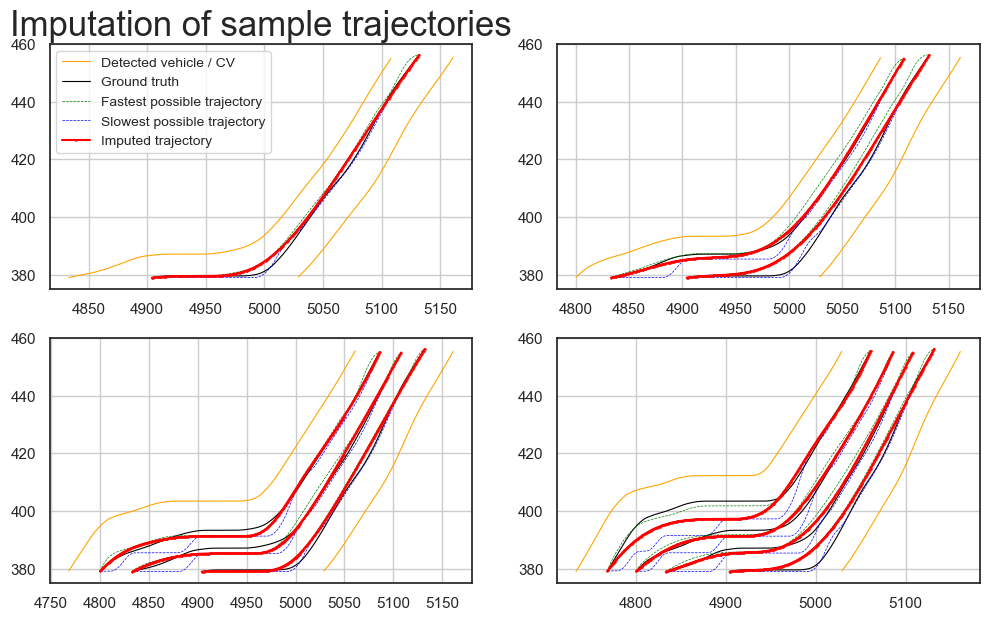

In [62]:
ngsim_traj_list = [list_ngsim_s3, list_ngsim_s4, list_ngsim_s5, list_ngsim_s6]
plot_net(ngsim_traj_list, ngsim_sample_list)

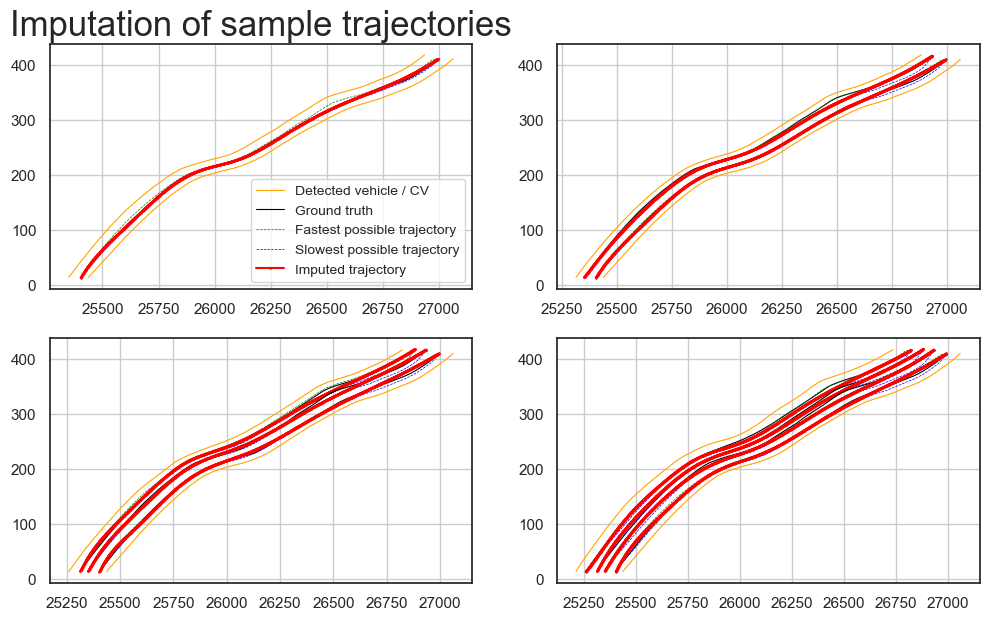

In [63]:
highd_traj_list = [list_highd_s3, list_highd_s4, list_highd_s5, list_highd_s6]
plot_net(highd_traj_list, highd_sample_list)

- Statistically show the efficacy of our method
    - In each dataset, we select 50, 40, 30, and 25 platoons respectively for the three-, four-, five-, and six-vehicle platoons
    - The ranges are set the same as before: Speed range $[0,30] m/s$; acceleration range $[-5,4] m/s^2$; jerk range $[-8,8] m/s^3$

In [64]:
# calibration result of highD data
data_id = 0; down_v = 0; up_v = 50; down_a = -5; up_a = 4; down_j = -8; up_j = 8; down_s = -12; up_s = 12; delta_t = 1/25; 
tau_low = int(round(0.2/delta_t)); zeta_low = 50; tau_up = int(2.4/delta_t); zeta_up = 121; est_acc = 7;
imputed_highd3, list_highd3, pos_err_highd3 = big_loop(three_set2, veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_highd4, list_highd4, pos_err_highd4 = big_loop(four_set2, veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_highd5, list_highd5, pos_err_highd5 = big_loop(five_set2, veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_highd6, list_highd6, pos_err_highd6 = big_loop(six_set2, veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)

id_set [216.0, 221.0, 226.0]
---------#--------------- 1
veh_id 221.0 tau1 1.2 zeta_1 8.0 up_id 1
step 1 pos optimal opt 836.839
0.0
step 2 pos optimal opt 60.089
tau2 1.2 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 54.412
average mae 1.77 ----------------------id number in group---------------------------- 0
id_set [238.0, 242.0, 250.0]
---------#--------------- 1
veh_id 242.0 tau1 1.8 zeta_1 5.0 up_id 1
step 1 pos optimal opt 200.745
0.0
step 2 pos optimal opt 1859.395
tau2 2.4 zeta2 11.5 low_id 1
step 3 status optimal The optimal value is 42.825
average mae 3.37 ----------------------id number in group---------------------------- 1
id_set [251.0, 258.0, 264.0]
---------#--------------- 1
veh_id 258.0 tau1 1.6 zeta_1 6.0 up_id 1
step 1 pos optimal opt 2060.296
0.0
step 2 pos optimal opt 191.281
tau2 1.6 zeta2 8.0 low_id 1
step 3 status optimal The optimal value is 22.65
average mae 2.47 ----------------------id number in group---------------------------- 2
id_set [2

average mae 2.05 ----------------------id number in group---------------------------- 24
id_set [1096.0, 1100.0, 1107.0]
---------#--------------- 1
veh_id 1100.0 tau1 0.6 zeta_1 6.5 up_id 1
step 1 pos optimal opt 237.287
0.0
step 2 pos optimal opt 1503.686
tau2 1.2 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 4.425
average mae 5.21 ----------------------id number in group---------------------------- 25
id_set [1212.0, 1219.0, 1227.0]
---------#--------------- 1
veh_id 1219.0 tau1 2.2 zeta_1 12.0 up_id 1
step 1 pos optimal opt 2442.428
0.0
step 2 pos optimal opt 908.094
tau2 1.8 zeta2 9.0 low_id 1
step 3 status optimal The optimal value is 0.015
average mae 4.09 ----------------------id number in group---------------------------- 26
id_set [1279.0, 1286.0, 1293.0]
---------#--------------- 1
veh_id 1286.0 tau1 1.0 zeta_1 5.5 up_id 1
step 1 pos optimal opt 2441.607
0.0
step 2 pos optimal opt 301.649
tau2 2.0 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is

step 1 pos optimal opt 1138.857
0.0
step 2 pos optimal opt 444.31
tau2 1.8 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 5.362
average mae 5.05 ----------------------id number in group---------------------------- 49
number of vehicles in platoons [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
id_set [238.0, 242.0, 250.0, 259.0]
---------#--------------- 2
veh_id 242.0 tau1 1.8 zeta_1 5.0 up_id 1
step 1 pos optimal opt 200.745
0.0
step 2 pos optimal opt 14680.024
tau2 2.2 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 10.182
---------#--------------- 1
veh_id 250.0 tau1 2.4 zeta_1 12.0 up_id 1
step 1 pos optimal opt 1995.004
0.0
step 2 pos optimal opt 3248.547
tau2 1.8 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 5.662
average mae 3.92 ----------------------id number in group---------------------------- 0
id_set [245.0, 251.0, 258.0

step 1 pos optimal opt 1011.412
0.0
step 2 pos optimal opt 745.351
tau2 1.0 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 0.162
---------#--------------- 1
veh_id 524.0 tau1 0.2 zeta_1 11.5 up_id 1
step 1 pos optimal opt 1222.504
0.0
step 2 pos optimal opt 460.467
tau2 1.2 zeta2 6.5 low_id 1
step 3 status optimal The optimal value is 0.106
average mae 1.88 ----------------------id number in group---------------------------- 14
id_set [1001.0, 1005.0, 1011.0, 1016.0]
---------#--------------- 2
veh_id 1005.0 tau1 2.0 zeta_1 11.5 up_id 1
step 1 pos optimal opt 2272.666
0.0
step 2 pos optimal opt 1295.333
tau2 1.8 zeta2 6.0 low_id 1
step 3 status optimal The optimal value is 192.993
---------#--------------- 1
veh_id 1011.0 tau1 1.8 zeta_1 7.0 up_id 1
step 1 pos optimal opt 433.254
0.0
step 2 pos optimal opt 169.038
tau2 1.6 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 83.144
average mae 2.23 ----------------------id number in group------------------------

average mae 1.68 ----------------------id number in group---------------------------- 28
id_set [1903.0, 1905.0, 1922.0, 1932.0]
---------#--------------- 2
veh_id 1905.0 tau1 0.4 zeta_1 12.0 up_id 1
step 1 pos optimal opt 1619.84
0.0
step 2 pos optimal opt 17989.485
tau2 1.6 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 7.339
---------#--------------- 1
veh_id 1922.0 tau1 0.4 zeta_1 10.0 up_id 1
step 1 pos optimal opt 2458.594
0.0
step 2 pos optimal opt 292.162
tau2 0.8 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 22.98
average mae 4.92 ----------------------id number in group---------------------------- 29
id_set [2350.0, 2361.0, 2372.0, 2376.0]
---------#--------------- 2
veh_id 2361.0 tau1 2.8 zeta_1 12.0 up_id 1
step 1 pos optimal opt 15878.569
0.0
step 2 pos optimal opt 5355.479
tau2 2.2 zeta2 11.5 low_id 1
step 3 status optimal The optimal value is 9.955
---------#--------------- 1
veh_id 2372.0 tau1 2.6 zeta_1 8.5 up_id 1
step 1 pos optimal opt 

step 1 pos optimal opt 1004.22
0.0
step 2 pos optimal opt 1805.709
tau2 1.6 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 4.022
---------#--------------- 1
veh_id 321.0 tau1 0.6 zeta_1 12.0 up_id 1
step 1 pos optimal opt 4878.318
0.0
step 2 pos optimal opt 391.386
tau2 0.6 zeta2 6.5 low_id 1
step 3 status optimal The optimal value is 1.526
average mae 4.1 ----------------------id number in group---------------------------- 2
id_set [346.0, 354.0, 360.0, 364.0, 365.0]
---------#--------------- 3
veh_id 354.0 tau1 0.8 zeta_1 6.0 up_id 1
step 1 pos optimal opt 2469.22
0.0
step 2 pos optimal opt 8878.034
tau2 0.8 zeta2 8.5 low_id 1
step 3 status optimal The optimal value is 4.202
---------#--------------- 2
veh_id 360.0 tau1 1.0 zeta_1 9.5 up_id 1
step 1 pos optimal opt 2273.855
0.0
step 2 pos optimal opt 2946.582
tau2 0.6 zeta2 7.5 low_id 1
step 3 status optimal The optimal value is 12.607
---------#--------------- 1
veh_id 364.0 tau1 0.8 zeta_1 5.0 up_id 1
step 1 pos opti

step 1 pos optimal opt 2305.069
0.0
step 2 pos optimal opt 2837.056
tau2 2.0 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 5.563
---------#--------------- 2
veh_id 1011.0 tau1 1.8 zeta_1 6.5 up_id 1
step 1 pos optimal opt 318.025
0.0
step 2 pos optimal opt 1413.34
tau2 1.8 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 7.11
---------#--------------- 1
veh_id 1016.0 tau1 1.2 zeta_1 7.0 up_id 1
step 1 pos optimal opt 546.332
0.0
step 2 pos optimal opt 510.084
tau2 1.6 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 20.216
average mae 2.7 ----------------------id number in group---------------------------- 13
id_set [1279.0, 1286.0, 1293.0, 1300.0, 1303.0]
---------#--------------- 3
veh_id 1286.0 tau1 1.0 zeta_1 5.5 up_id 1
step 1 pos optimal opt 2441.607
0.0
step 2 pos optimal opt 788.093
tau2 2.2 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 0.541
---------#--------------- 2
veh_id 1293.0 tau1 2.0 zeta_1 11.0 up_id 1
step 1 p

step 1 pos optimal opt 2300.283
0.0
step 2 pos optimal opt 74.305
tau2 1.0 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 16.587
average mae 2.46 ----------------------id number in group---------------------------- 23
id_set [2411.0, 2417.0, 2422.0, 2427.0, 2432.0]
---------#--------------- 3
veh_id 2417.0 tau1 1.4 zeta_1 9.5 up_id 1
step 1 pos optimal opt 994.788
0.0
step 2 pos optimal opt 9989.832
tau2 1.2 zeta2 10.0 low_id 1
step 3 status optimal The optimal value is 8.25
---------#--------------- 2
veh_id 2422.0 tau1 1.2 zeta_1 9.0 up_id 1
step 1 pos optimal opt 804.953
0.0
step 2 pos optimal opt 6674.255
tau2 0.8 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 18.428
---------#--------------- 1
veh_id 2427.0 tau1 1.0 zeta_1 11.0 up_id 1
step 1 pos optimal opt 1575.744
0.0
step 2 pos optimal opt 2187.865
tau2 0.6 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 34.419
average mae 3.32 ----------------------id number in group--------------

step 3 status optimal The optimal value is 160.506
---------#--------------- 3
veh_id 365.0 tau1 0.4 zeta_1 6.0 up_id 1
step 1 pos optimal opt 887.171
0.0
step 2 pos optimal opt 10051.226
tau2 1.2 zeta2 10.0 low_id 1
step 3 status optimal The optimal value is 484.575
---------#--------------- 2
veh_id 369.0 tau1 1.4 zeta_1 10.0 up_id 1
step 1 pos optimal opt 768.802
0.0
step 2 pos optimal opt 2514.283
tau2 1.2 zeta2 8.5 low_id 1
step 3 status optimal The optimal value is 577.17
---------#--------------- 1
veh_id 372.0 tau1 1.2 zeta_1 5.0 up_id 1
step 1 pos optimal opt 371.804
0.0
step 2 pos optimal opt 571.167
tau2 1.2 zeta2 9.0 low_id 1
step 3 status optimal The optimal value is 1.557
average mae 3.25 ----------------------id number in group---------------------------- 3
id_set [386.0, 389.0, 393.0, 397.0, 402.0, 405.0]
---------#--------------- 4
veh_id 389.0 tau1 0.8 zeta_1 8.5 up_id 1
step 1 pos optimal opt 798.384
0.0
step 2 pos optimal opt 3681.274
tau2 1.2 zeta2 6.0 low_id 1
ste

step 3 status optimal The optimal value is 1.449
---------#--------------- 2
veh_id 1653.0 tau1 1.6 zeta_1 5.0 up_id 1
step 1 pos optimal opt 441.17
0.0
step 2 pos optimal opt 908.539
tau2 1.6 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 1.208
---------#--------------- 1
veh_id 1657.0 tau1 0.6 zeta_1 7.0 up_id 1
step 1 pos optimal opt 392.435
0.0
step 2 pos optimal opt 246.854
tau2 2.2 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 2.039
average mae 4.07 ----------------------id number in group---------------------------- 11
id_set [1643.0, 1648.0, 1653.0, 1657.0, 1667.0, 1675.0]
---------#--------------- 4
veh_id 1648.0 tau1 1.6 zeta_1 9.0 up_id 1
step 1 pos optimal opt 2943.89
0.0
step 2 pos optimal opt 8826.37
tau2 1.6 zeta2 6.0 low_id 1
step 3 status optimal The optimal value is 6.48
---------#--------------- 3
veh_id 1653.0 tau1 1.6 zeta_1 5.0 up_id 1
step 1 pos optimal opt 341.462
0.0
step 2 pos optimal opt 1516.322
tau2 1.6 zeta2 6.0 low_id 1
step

step 3 status optimal The optimal value is 50.992
---------#--------------- 1
veh_id 2416.0 tau1 1.0 zeta_1 12.0 up_id 1
step 1 pos optimal opt 2555.574
0.0
step 2 pos optimal opt 186.494
tau2 0.8 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 0.515
average mae 4.26 ----------------------id number in group---------------------------- 19
id_set [2469.0, 2473.0, 2476.0, 2482.0, 2485.0, 2486.0]
---------#--------------- 4
veh_id 2473.0 tau1 1.0 zeta_1 5.5 up_id 1
step 1 pos optimal opt 291.821
0.0
step 2 pos optimal opt 2893.471
tau2 1.6 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 9.184
---------#--------------- 3
veh_id 2476.0 tau1 1.2 zeta_1 12.0 up_id 1
step 1 pos optimal opt 6029.362
0.0
step 2 pos optimal opt 4942.997
tau2 1.2 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 2.41
---------#--------------- 2
veh_id 2482.0 tau1 1.2 zeta_1 5.0 up_id 1
step 1 pos optimal opt 438.408
0.0
step 2 pos optimal opt 1253.614
tau2 1.2 zeta2 5.0 low_i

In [65]:
# calibration result of NGSIM data
data_id = 1; down_v = 0; up_v = 50; down_a = -5; up_a = 4; down_j = -8; up_j = 8; down_s = -12; up_s = 12; delta_t = 1/10; 
tau_low = int(round(0.2/delta_t)); zeta_low = 50; tau_up = int(2.4/delta_t); zeta_up = 121; est_acc = 7
imputed_ngsim3, list_ngsim3, pos_err_ngsim3 = big_loop(three_set1, veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_ngsim4, list_ngsim4, pos_err_ngsim4 = big_loop(four_set1, veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_ngsim5, list_ngsim5, pos_err_ngsim5 = big_loop(five_set1, veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)
imputed_ngsim6, list_ngsim6, pos_err_ngsim6 = big_loop(six_set1, veh_traj1, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)

id_set [163.0, 169.0, 187.0]
---------#--------------- 1
veh_id 169.0 tau1 1.0 zeta_1 8.0 up_id 1
step 1 pos optimal opt 261.478
0.0
step 2 pos optimal opt 443.054
tau2 2.8 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 46.05
average mae 2.14 ----------------------id number in group---------------------------- 0
id_set [356.0, 360.0, 365.0]
---------#--------------- 1
veh_id 360.0 tau1 0.6 zeta_1 6.5 up_id 1
step 1 pos optimal opt 131.188
0.0
step 2 pos optimal opt 89.902
tau2 0.8 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 7.416
average mae 0.73 ----------------------id number in group---------------------------- 1
id_set [466.0, 475.0, 482.0]
---------#--------------- 1
veh_id 475.0 tau1 0.8 zeta_1 11.5 up_id 1
step 1 pos optimal opt 533.491
0.0
step 2 pos optimal opt 412.744
tau2 0.4 zeta2 10.0 low_id 1
step 3 status optimal The optimal value is 39.771
average mae 0.9 ----------------------id number in group---------------------------- 2
id_set [470

veh_id 1482.0 tau1 1.0 zeta_1 6.5 up_id 1
step 1 pos optimal opt 130.805
0.0
step 2 pos optimal opt 85.349
tau2 1.8 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 27.017
average mae 0.53 ----------------------id number in group---------------------------- 25
id_set [1496.0, 1491.0, 1503.0]
---------#--------------- 1
veh_id 1491.0 tau1 0.2 zeta_1 12.0 up_id 1
step 1 pos optimal opt 680.545
0.0
step 2 pos optimal opt 641.631
tau2 0.4 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 1.754
average mae 3.13 ----------------------id number in group---------------------------- 26
id_set [1479.0, 1482.0, 1490.0]
---------#--------------- 1
veh_id 1482.0 tau1 1.0 zeta_1 6.5 up_id 1
step 1 pos optimal opt 130.805
0.0
step 2 pos optimal opt 85.349
tau2 1.8 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 27.017
average mae 0.53 ----------------------id number in group---------------------------- 27
id_set [1483.0, 1487.0, 1501.0]
---------#---------------

id_set [55.0, 54.0, 59.0, 60.0]
---------#--------------- 2
veh_id 54.0 tau1 0.4 zeta_1 9.0 up_id 1
step 1 pos optimal opt 349.63
0.0
step 2 pos optimal opt 1165.876
tau2 1.2 zeta2 7.5 low_id 1
step 3 status optimal The optimal value is 65.421
---------#--------------- 1
veh_id 59.0 tau1 1.0 zeta_1 12.0 up_id 1
step 1 pos optimal opt 512.057
0.0
step 2 pos optimal opt 312.994
tau2 0.6 zeta2 10.0 low_id 1
step 3 status optimal The optimal value is 4.456
average mae 1.46 ----------------------id number in group---------------------------- 0
id_set [117.0, 3340.0, 142.0, 159.0]
---------#--------------- 2
veh_id 3340.0 tau1 0.6 zeta_1 11.5 up_id 1
step 1 pos optimal opt 545.101
0.0
step 2 pos optimal opt 262.429
tau2 0.8 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 7.422
---------#--------------- 1
veh_id 142.0 tau1 0.6 zeta_1 8.5 up_id 1
step 1 pos optimal opt 207.305
0.0
step 2 pos optimal opt 273.56
tau2 0.2 zeta2 8.5 low_id 1
step 3 status optimal The optimal value is

veh_id 1224.0 tau1 0.8 zeta_1 7.5 up_id 1
step 1 pos optimal opt 190.501
0.0
step 2 pos optimal opt 312.201
tau2 0.6 zeta2 9.0 low_id 1
step 3 status optimal The optimal value is 0.0
average mae 0.46 ----------------------id number in group---------------------------- 15
id_set [1218.0, 1228.0, 1231.0, 1238.0]
---------#--------------- 2
veh_id 1228.0 tau1 1.0 zeta_1 7.5 up_id 1
step 1 pos optimal opt 241.521
0.0
step 2 pos optimal opt 252.756
tau2 0.6 zeta2 6.0 low_id 1
step 3 status optimal The optimal value is 4.692
---------#--------------- 1
veh_id 1231.0 tau1 0.6 zeta_1 6.0 up_id 1
step 1 pos optimal opt 115.888
0.0
step 2 pos optimal opt 125.712
tau2 0.8 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 0.874
average mae 1.1 ----------------------id number in group---------------------------- 16
id_set [1292.0, 1304.0, 1309.0, 1314.0]
---------#--------------- 2
veh_id 1304.0 tau1 0.2 zeta_1 7.5 up_id 1
step 1 pos optimal opt 186.451
0.0
step 2 pos optimal opt 393.20

step 2 pos optimal opt 330.417
tau2 1.4 zeta2 7.5 low_id 1
step 3 status optimal The optimal value is 0.987
---------#--------------- 1
veh_id 1887.0 tau1 0.8 zeta_1 5.5 up_id 1
step 1 pos optimal opt 82.343
0.0
step 2 pos optimal opt 181.252
tau2 2.2 zeta2 7.5 low_id 1
step 3 status optimal The optimal value is 0.953
average mae 1.73 ----------------------id number in group---------------------------- 30
id_set [1951.0, 1941.0, 1961.0, 1992.0]
---------#--------------- 2
veh_id 1941.0 tau1 0.8 zeta_1 11.5 up_id 1
step 1 pos optimal opt 553.573
0.0
step 2 pos optimal opt 481.188
tau2 2.2 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 29.293
---------#--------------- 1
veh_id 1961.0 tau1 1.0 zeta_1 12.0 up_id 1
step 1 pos optimal opt 671.26
0.0
step 2 pos optimal opt 220.203
tau2 1.8 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 20.371
average mae 1.54 ----------------------id number in group---------------------------- 31
id_set [2006.0, 2019.0, 2022.0, 2

step 1 pos optimal opt 95.144
0.0
step 2 pos optimal opt 1065.009
tau2 1.6 zeta2 8.0 low_id 1
step 3 status optimal The optimal value is 0.001
---------#--------------- 1
veh_id 537.0 tau1 0.4 zeta_1 11.5 up_id 1
step 1 pos optimal opt 815.378
0.0
step 2 pos optimal opt 258.137
tau2 2.0 zeta2 9.0 low_id 1
step 3 status optimal The optimal value is 4.832
average mae 2.48 ----------------------id number in group---------------------------- 3
id_set [572.0, 575.0, 587.0, 625.0, 640.0]
---------#--------------- 3
veh_id 575.0 tau1 1.8 zeta_1 8.0 up_id 1
step 1 pos optimal opt 163.664
0.0
step 2 pos optimal opt 1708.331
tau2 2.0 zeta2 7.0 low_id 1
step 3 status optimal The optimal value is 68.326
---------#--------------- 2
veh_id 587.0 tau1 1.0 zeta_1 9.5 up_id 1
step 1 pos optimal opt 340.917
0.0
step 2 pos optimal opt 512.532
tau2 2.4 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 4.668
---------#--------------- 1
veh_id 625.0 tau1 1.4 zeta_1 12.0 up_id 1
step 1 pos optima

id_set [1287.0, 1291.0, 1305.0, 1307.0, 1317.0]
---------#--------------- 3
veh_id 1291.0 tau1 0.2 zeta_1 12.0 up_id 1
step 1 pos optimal opt 567.445
0.0
step 2 pos optimal opt 825.703
tau2 2.0 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 37.181
---------#--------------- 2
veh_id 1305.0 tau1 0.6 zeta_1 9.5 up_id 1
step 1 pos optimal opt 359.915
0.0
step 2 pos optimal opt 469.941
tau2 2.2 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 76.374
---------#--------------- 1
veh_id 1307.0 tau1 1.6 zeta_1 8.5 up_id 1
step 1 pos optimal opt 285.405
0.0
step 2 pos optimal opt 72.678
tau2 2.0 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 12.036
average mae 1.16 ----------------------id number in group---------------------------- 14
id_set [1425.0, 1435.0, 1445.0, 1454.0, 1460.0]
---------#--------------- 3
veh_id 1435.0 tau1 2.0 zeta_1 5.0 up_id 1
step 1 pos optimal opt 122.05
0.0
step 2 pos optimal opt 3907.802
tau2 0.8 zeta2 11.5 low_id 1
step 3 s

0.0
step 2 pos optimal opt 64.445
tau2 1.0 zeta2 6.0 low_id 1
step 3 status optimal The optimal value is 0.134
average mae 1.26 ----------------------id number in group---------------------------- 24
id_set [2341.0, 2347.0, 2352.0, 2358.0, 2367.0]
---------#--------------- 3
veh_id 2347.0 tau1 0.8 zeta_1 11.0 up_id 1
step 1 pos optimal opt 451.906
0.0
step 2 pos optimal opt 550.664
tau2 1.4 zeta2 5.0 low_id 1
step 3 status optimal The optimal value is 6.624
---------#--------------- 2
veh_id 2352.0 tau1 1.2 zeta_1 5.5 up_id 1
step 1 pos optimal opt 98.784
0.0
step 2 pos optimal opt 242.565
tau2 1.4 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 97.216
---------#--------------- 1
veh_id 2358.0 tau1 0.8 zeta_1 5.0 up_id 1
step 1 pos optimal opt 59.181
0.0
step 2 pos optimal opt 134.42
tau2 1.6 zeta2 6.5 low_id 1
step 3 status optimal The optimal value is 0.246
average mae 1.92 ----------------------id number in group---------------------------- 25
id_set [2382.0, 2391.0, 2

veh_id 360.0 tau1 0.6 zeta_1 6.5 up_id 1
step 1 pos optimal opt 131.188
0.0
step 2 pos optimal opt 3964.163
tau2 0.6 zeta2 10.0 low_id 1
step 3 status optimal The optimal value is 4.982
---------#--------------- 3
veh_id 365.0 tau1 0.6 zeta_1 7.0 up_id 1
step 1 pos optimal opt 171.212
0.0
step 2 pos optimal opt 700.382
tau2 1.2 zeta2 6.0 low_id 1
step 3 status optimal The optimal value is 42.778
---------#--------------- 2
veh_id 373.0 tau1 0.8 zeta_1 5.0 up_id 1
step 1 pos optimal opt 65.715
0.0
step 2 pos optimal opt 597.03
tau2 0.8 zeta2 9.0 low_id 1
step 3 status optimal The optimal value is 8.579
---------#--------------- 1
veh_id 380.0 tau1 0.2 zeta_1 8.0 up_id 1
step 1 pos optimal opt 263.479
0.0
step 2 pos optimal opt 439.336
tau2 1.2 zeta2 11.0 low_id 1
step 3 status optimal The optimal value is 11.646
average mae 1.47 ----------------------id number in group---------------------------- 4
id_set [466.0, 475.0, 482.0, 485.0, 504.0, 508.0]
---------#--------------- 4
veh_id 475.

step 1 pos optimal opt 70.581
0.0
step 2 pos optimal opt 1775.824
tau2 1.0 zeta2 9.0 low_id 1
step 3 status optimal The optimal value is 2.29
---------#--------------- 2
veh_id 1497.0 tau1 1.2 zeta_1 5.5 up_id 1
step 1 pos optimal opt 74.629
0.0
step 2 pos optimal opt 497.433
tau2 1.4 zeta2 7.0 low_id 1
step 3 status optimal The optimal value is 1.606
---------#--------------- 1
veh_id 1506.0 tau1 0.8 zeta_1 6.0 up_id 1
step 1 pos optimal opt 164.945
0.0
step 2 pos optimal opt 318.056
tau2 1.6 zeta2 8.5 low_id 1
step 3 status optimal The optimal value is 1.206
average mae 1.9 ----------------------id number in group---------------------------- 12
id_set [1425.0, 1435.0, 1445.0, 1454.0, 1460.0, 1467.0]
---------#--------------- 4
veh_id 1435.0 tau1 1.8 zeta_1 6.0 up_id 1
step 1 pos optimal opt 174.814
0.0
step 2 pos optimal opt 12926.378
tau2 0.6 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 1.653
---------#--------------- 3
veh_id 1445.0 tau1 1.6 zeta_1 8.0 up_id 1
ste

step 3 status optimal The optimal value is 1.129
---------#--------------- 1
veh_id 2367.0 tau1 1.2 zeta_1 7.0 up_id 1
step 1 pos optimal opt 145.101
0.0
step 2 pos optimal opt 88.919
tau2 3.0 zeta2 5.5 low_id 1
step 3 status optimal The optimal value is 5.081
average mae 1.98 ----------------------id number in group---------------------------- 20
id_set [2382.0, 2391.0, 2395.0, 2405.0, 2411.0, 2426.0]
---------#--------------- 4
veh_id 2391.0 tau1 1.8 zeta_1 10.0 up_id 1
step 1 pos optimal opt 431.453
0.0
step 2 pos optimal opt 7405.596
tau2 1.4 zeta2 9.5 low_id 1
step 3 status optimal The optimal value is 1.931
---------#--------------- 3
veh_id 2395.0 tau1 1.2 zeta_1 5.5 up_id 1
step 1 pos optimal opt 82.305
0.0
step 2 pos optimal opt 6932.117
tau2 1.2 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 5.099
---------#--------------- 2
veh_id 2405.0 tau1 1.8 zeta_1 12.0 up_id 1
step 1 pos optimal opt 712.786
0.0
step 2 pos optimal opt 698.97
tau2 1.8 zeta2 6.0 low_id 1
s

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
d_range = [-100] + np.round(np.linspace(-10,10,11),1).tolist() + [100]
d_lable = ["<-10"] + np.round(np.linspace(-8,8,9),1).tolist() + [">10"]
x1 = -10; x2 = 10; #y1 = 0; y2 = 0.3
def plot_pos_error(impute_set, data_id):
    from sklearn.metrics import mean_squared_error
    import math
    n = 0; label_list = ["Position error distributions (highD dataset)", "Position error distributions (NGSIM dataset)"]; y_list =[0.3,0.5]
    for i in range(4):
        pos_res = impute_set[i][:,-4]-impute_set[i][:,3]
        MAPE = np.mean((np.abs(impute_set[i][:,-4]-impute_set[i][:,3])*100/impute_set[i][:,3])) # absolute percentage error
        RMSE = math.sqrt(mean_squared_error(impute_set[i][:,-4], impute_set[i][:,3]))
        #print("average position residual", round(np.mean(np.abs(pos_res)),2), "RMSE:", round(RMSE,2), "MAPE:", MAPE)
        sns.set(rc={"figure.figsize": (12,7)}, style="white", palette=None)
        plt.subplot(2,2,i+1)
        if i == 0:
            plt.title(label_list[data_id],fontsize= 25)
        ax = sns.histplot(pos_res,  bins=d_range, stat = 'proportion')
        ax.set_xlim(-12, 12); ax.set_ylim(0, y_list[data_id]);
        ax.set_xticks(np.arange(x1, x2+1, 2),d_lable, fontsize=10);
        ax.set_xlabel("Position error (m)")
        plt.grid(True); #plt.show()
        ax.legend([],[], frameon=False) #remove the ledgend

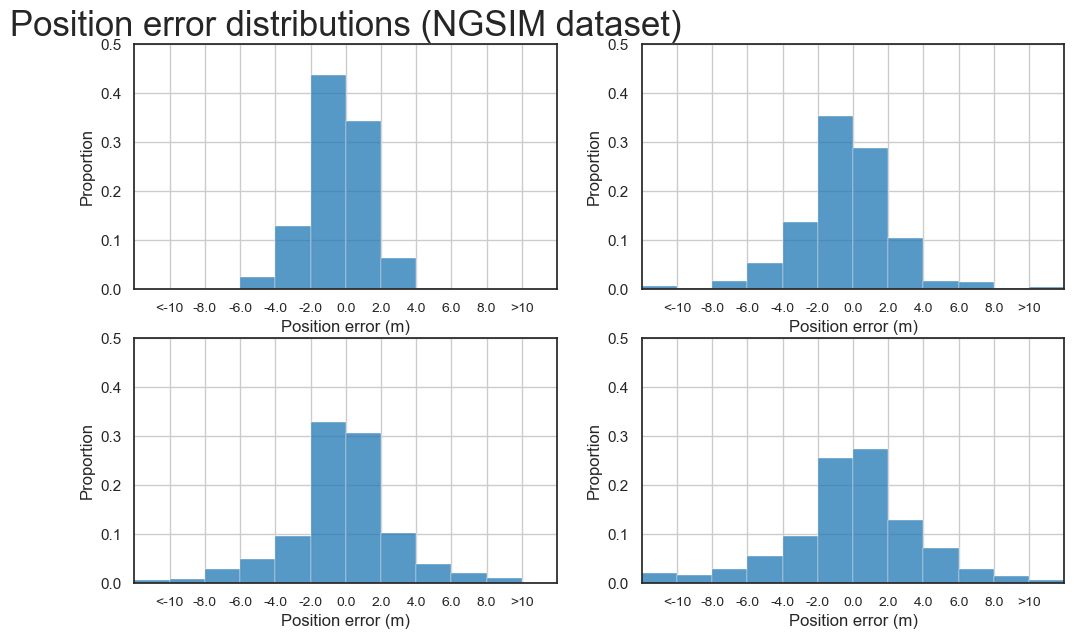

In [67]:
plot_pos_error(impute_set = [imputed_ngsim3, imputed_ngsim4, imputed_ngsim5, imputed_ngsim6], data_id = 1)

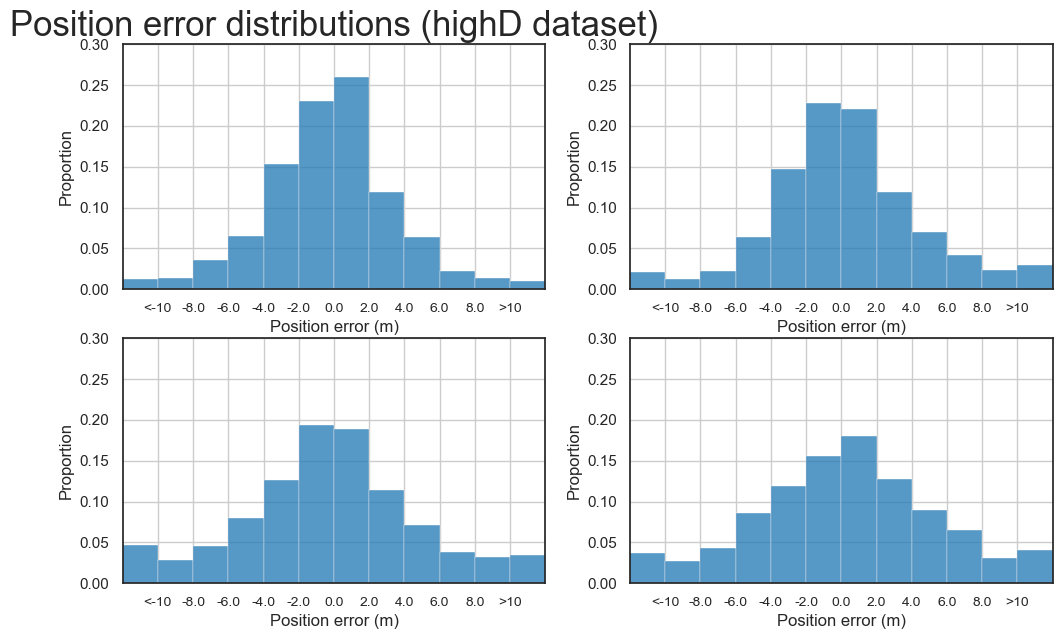

In [68]:
plot_pos_error(impute_set = [imputed_highd3, imputed_highd4, imputed_highd5, imputed_highd6], data_id = 0)

- Statistic summary
| Dataset | Step | Platoon size | 3 | 4 | 5 | 6 |
|---------|------|--------------|---|---|---|---|
| NGSIM | Fastest possible trajectories (Step 1) | MAE (m) | 1.88 | 2.48 | 2.62 | 3.29 |
| | | RMSE (m) | 2.56 | 3.92 | 3.72 | 4.46 |
| | Slowest possible trajectory (Step 2) | MAE (m) | 1.99 | 2.79 | 2.94 | 3.74 |
| | | RMSE (m) | 2.69 | 4.15 | 4.29 | 5.61 |
| | Minimum-jerk trajectory (Step 3) | MAE (m) | 1.23 | 1.95 | 2.09 | 2.69 |
| | | RMSE (m) | 1.65 | 2.81 | 3.00 | 3.77 |
| HighD | Fastest possible trajectories (Step 1) | MAE (m) | 3.55 | 4.23 | 4.52 | 4.93 |
| | | RMSE (m) | 4.75 | 6.36 | 6.36 | 6.51 |
| | Slowest possible trajectory (Step 2) | MAE (m) | 4.4 | 4.45 | 6.19 | 6.32 |
| | | RMSE (m) | 6.4 | 6.08 | 8.44 | 8.26 |
| | Minimum-jerk trajectory (Step 3) | MAE (m) | 2.78 | 3.27 | 3.97 | 4.19 |
| | | RMSE (m) | 3.8 | 4.63 | 5.42 | 5.55 |

### Application to a sample mixed-traffic system

- Construct a system with 10% CVs and 10% CAVs
- The leading and trailing vehicles within the platoon are CVs
- The remaining CAVs and CVs are randomly assigned to the other vehicles
- Platoon sizes: 3-8 vehicles
- CVs: report solely their own trajectories; CAVs: report not only their own trajectories but also those of their adjacent vehicle

In [69]:
data_id = 0; down_v = 0; up_v = 50; down_a = -5; up_a = 4; down_j = -8; up_j = 8; down_s = -12; up_s = 12; delta_t = 1/25; 
tau_low = int(round(0.2/delta_t)); zeta_low = 50; tau_up = int(2.4/delta_t); zeta_up = 121; est_acc = 7;
imputed_all0, list_trajectory0, pos_err0 = big_loop(net_traj, veh_highd, data_id, x1, x2, down_v, up_v, down_a, up_a, down_j, up_j, down_s, up_s, 
                                                   delta_t, tau_low, tau_up, zeta_low, zeta_up, est_acc)

id_set [1552.0, 1557.0, 1565.0, 1570.0, 1574.0]
---------#--------------- 3
veh_id 1557.0 tau1 1.2 zeta_1 5.5 up_id 1
step 1 pos optimal opt 1047.952
0.0
step 2 pos optimal opt 3789.909
tau2 1.0 zeta2 7.0 low_id 1
step 3 status optimal The optimal value is 1.092
---------#--------------- 2
veh_id 1565.0 tau1 1.0 zeta_1 5.0 up_id 1
step 1 pos optimal opt 1293.985
0.0
step 2 pos optimal opt 4752.963
tau2 0.4 zeta2 12.0 low_id 1
step 3 status optimal The optimal value is 0.675
---------#--------------- 1
veh_id 1570.0 tau1 0.8 zeta_1 9.5 up_id 1
step 1 pos optimal opt 949.172
0.0
step 2 pos optimal opt 1377.879
tau2 0.4 zeta2 10.0 low_id 1
step 3 status optimal The optimal value is 2.827
average mae 2.8 ----------------------id number in group---------------------------- 0
id_set [1584.0, 1591.0, 1596.0, 1603.0]
---------#--------------- 2
veh_id 1591.0 tau1 0.4 zeta_1 5.0 up_id 1
step 1 pos optimal opt 4936.217
0.0
step 2 pos optimal opt 2848.153
tau2 0.4 zeta2 11.0 low_id 1
step 3 statu

In [70]:
def plot_net(traj_list, sample_list): #the input should be the imputed trajectories and id list
    data = copy.deepcopy(traj_list)
    font1 = 10; lo = 4; line = 0.8; line2 = 0.6; m = 0.8
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    color_list = ["g", "b", "m", "r", "c", "brown", "k", "orange"]
    plt.figure(figsize=(8,6)); #plt.ylim(20,50);
    plt.figure(1)
    plt.ylabel("Position (m)",font2); plt.xlabel("Frame id",font2)
    plt.xticks(fontsize=font1); plt.yticks(fontsize=font1)
    for group_id in range(len(data)): #go through each group in the network  len(data)-1, 
        group = data[group_id] # a group in the net
        if len(sample_list[group_id]) == 1:
            group[:,3] = np.abs(group[:,3] - 420) if group[0,3] > group[-1,3] else group[:,3]
            plt.plot(group[:,1], group[:,3], color = color_list[2%len(color_list)], linewidth=line, linestyle='-', label = "CAV"); #trajectory of the first vehicle
            if group_id == 1:
                plt.title("Trajectory imputation method in the system scenario",fontsize= 25)
                plt.legend(fontsize=font1)
        else:
            id_set = sorted(set(group[:,0].tolist()),key = group[:,0].tolist().index)#pick out all the ids in a group, and create a list to store them
            plt.plot(group[np.where((group[:,0] == id_set[0]))][:,1] ,group[np.where((group[:,0] == id_set[0]))][:,3], color = color_list[7%len(color_list)], linewidth=line, linestyle='-', label = "Detected vehicle / CV"); #trajectory of the first vehicle
            plt.plot(group[np.where((group[:,0] == id_set[-1]))][:,1] ,group[np.where((group[:,0] == id_set[-1]))][:,3], color = color_list[7%len(color_list)], linewidth=line, linestyle='-'); #trajectory of the last vehicle
            for i in range (1,len(id_set)-1):
                if i == 1:
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,3], color = color_list[6%len(color_list)], linewidth=line, linestyle='-', label = "Ground truth");
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,-8], color = color_list[0%len(color_list)], linewidth=line2, linestyle='--', label = 'Fastest possible trajectory');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,4], color = color_list[1%len(color_list)], linewidth=line2, linestyle='--', label = 'Slowest possible trajectory');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,-4], color = color_list[3%len(color_list)], marker = 'o', markersize=m, label = 'Imputed trajectory');
                else:
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,3], color = color_list[6%len(color_list)], linewidth=line, linestyle='-');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,-8], color = color_list[0%len(color_list)], linewidth=line2, linestyle='--');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,4], color = color_list[1%len(color_list)], linewidth=line2, linestyle='--');
                    plt.plot(group[np.where((group[:,0] == id_set[i]))][:,1] ,group[np.where((group[:,0] == id_set[i]))][:,-4], color = color_list[3%len(color_list)], marker = 'o', markersize=m);
                plt.grid(True);
                if group_id == 0 and i == 0:
                    plt.legend(fontsize=font1)

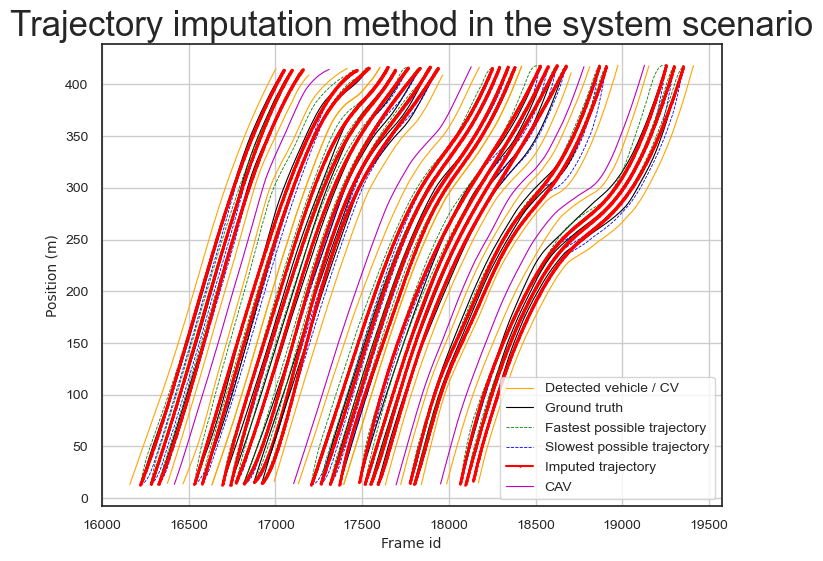

In [71]:
plot_net(list_trajectory0, net_traj) 

In [72]:
def cal_MAE(whole_matrix):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import math
    id_set = sorted(set(whole_matrix[:,0].tolist()),key = whole_matrix[:,0].tolist().index)#pick out all the ids, and create a list to store them
    imputed_veh = whole_matrix#[np.where((whole_matrix[:,0] != id_set[0])&(whole_matrix[:,0] != id_set[-1]))]
    ini_time = int(round(np.min(imputed_veh[:,1]))); last_time = int(round(np.max(imputed_veh[:,1])))
    pos_mae = np.zeros((int(round(last_time-ini_time))+1,2))
    pos_rmse = np.zeros((int(round(last_time-ini_time))+1,2))
    for i in range(ini_time,last_time+1):
        sub_veh = imputed_veh[np.where((imputed_veh[:,1] == i))] #target vehicle
        pos_mae[i-ini_time,0] = i
        pos_mae[i-ini_time,1] = mean_absolute_error(sub_veh[:,3],sub_veh[:,-4])
        pos_rmse[i-ini_time,0] = i
        pos_rmse[i-ini_time,1] = math.sqrt(mean_squared_error(sub_veh[:,3],sub_veh[:,-4]))      
    
    font1 = 10; lo = 2; m = 10
    font2 = {'family' : 'DejaVu Sans', 'weight' : 'normal', 'size' : 10,}
    color_list = ["g", "b", "m", "r", "c", "brown", "k"]
    fig = plt.figure(figsize=(17,4))
    ax = fig.add_subplot(121)
    #plt.title("Position errors versus time & distribution",fontsize= 25)
    ax.scatter(pos_mae[:,0] ,pos_mae[:,1], color = color_list[0%len(color_list)], marker = 'o', s = m, label = "MAE")
    ax2 = ax.twinx()
    ax2.scatter(pos_rmse[:,0] ,pos_rmse[:,1], color = color_list[1%len(color_list)], marker = 'D', s = m, label = "RMSE")
    ax.grid()
    ax.set_xlabel("Frame id",font2)
    ax.set_ylabel(r"MAE (m)",font2); ax2.set_ylabel(r"RMSE (m)",font2)
    ax.set_ylim(-0.2, np.max(pos_rmse[:,1])+1); ax2.set_ylim(-0.2, np.max(pos_rmse[:,1])+1)
    ax.tick_params(labelsize=font1); ax2.tick_params(labelsize=font1)
    ax.legend(loc="upper left", fontsize=font1); ax2.legend(loc="upper right", fontsize=font1)
    
    pos_res = whole_matrix[:,-4]-whole_matrix[:,3]
    d_range = [-100] + np.round(np.linspace(-10,10,11),1).tolist() + [100]
    d_lable = ["<-10"] + np.round(np.linspace(-8,8,9),1).tolist() + [">10"]
    x1 = -10; x2 = 10; y1 = 0; y2 = 0.2
    #sns.set(rc={"figure.figsize": (6, 5)}, style="white", palette=None)
    plt.subplot(1,2,2)
    ax = sns.histplot(pos_res,  bins=d_range, stat = 'proportion')
    ax.set_xlim(-12, 12); ax.set_ylim(y1, y2);
    ax.set_xticks(np.arange(x1, x2+1, 2),d_lable);
    ax.set_xlabel("Position error (m)",font2)
    plt.grid(True); #plt.show()
    ax.legend([],[], frameon=False) #remove the ledgend
    #print("average mae", round(np.mean(pos_mae[:,1]),2), "RMSE", round(np.mean(pos_rmse[:,1]),2))

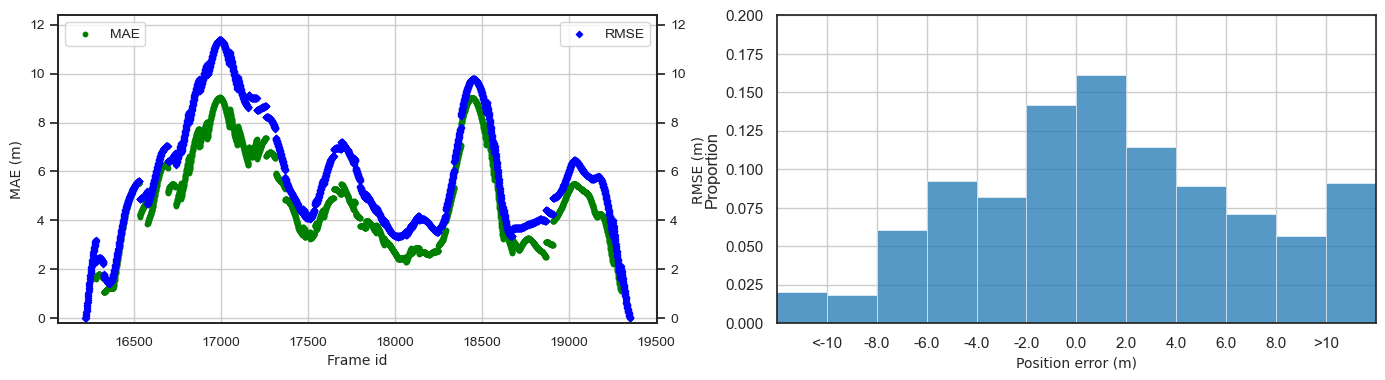

In [73]:
cal_MAE(imputed_all0)

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/3/1">2</a>. [Simplified Newell's car-following model](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">3</a>. [Three-step quadratic programming method](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Introduction of the proposed method
        - Calculating the Fastest Possible Trajectory
        - Calculating the Slowest Possible Trajectory
        - Minimizing the sum of squared jerks
    - Determination of the time gap and jam spacing
- <a href="#/4/1">4</a>. [Numerical experiments](./Dissertation_slides.ipynb#Results-and-Analysis)
    - Application to the vehicle platoons of different sizes
    - Application to a sample mixed-traffic system
- <a href="#/5/1">5</a>. [<span style="color:red; font-size:200%">Conclusion](./Dissertation_slides.ipynb#Conclusion)

## Conclusion

- Summary
    - Scenario:
        - Mixed traffic
        - Loop detectors are located at the entrance and the exit of the segment
    - Considered elements considered
        - Safe spaceing between successive vehicles
        - Bounded speeds, accelerations, and jerks
        - Minimizing the sum of squared jerks
    - Three steps
        - Calculate the fastest possible trajectory
        - Calculate the slowest possible trajectory
        - Compute the trajectory optimizing for the minimal sum of squared jerks 

- Contrubution
    - Introduced a novel and comprehensive method that integrates multiple principles, as mentioned in the last page, to effectively impute fully sampled vehicle trajectories
    - Provide numerical evidence supporting the validity of utilizing the minimum-jerk theory as a reliable approximation of human driving behaviors 
- Future extension
    - Categorize the successive vehicles into different phases, including the approaching phase, free-driving phase, following phase, and braking phase, and study the difference in the efficacy of our method in different phases
    - Exploring the application of trajectory prediction and planning techniques

# Conclusion

- <a href="#/1/1">1</a>. [Introduction](./Dissertation_slides.ipynb#Introduction)
- <a href="#/1/1">2</a>. [Literature review](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/1/1">3</a>. [A first principles-based iterative method for smoothing](./Dissertation_slides.ipynb#Literature-review)
- <a href="#/3/1">4</a>. [An simplified iterative moving average method for smoothing](./Dissertation_slides.ipynb#Methodology)
- <a href="#/4/1">5</a>. [Two-step quadratic programming method for smoothing](./iterative_filter_smoothing.ipynb#Results-and-Analysis)
- <a href="#/5/1">6</a>. [Three-step quadratic programming method for imputation](./Dissertation_slides.ipynb#Conclusion)
- <a href="#/6/1">7</a>. [<span style="color:red; font-size:200%">Conclusion</span>](./Dissertation_slides.ipynb#Conclusion)

## Summary

- Remove the outliers and high-frequency noises in vehicle trajectory data
    - Proposed principle based iterative method
        - Start from first principles and numerically show the performance
    - Proposed a simplified iterative moving average method
        - All the smoothing works are conducted on speeds
        - Preserve the average speeds or total travel distance for a specified time duration segment
        - Termination is guaranteed
    - Propose a two-step quadratic programming method
        - Operates without the need for iterations, and concludes in a single round
        - Adheres to physically meaningful bounds on the speeds and higher order derivatives
        - Minimum jerks
        - Existence and uniqueness of solutions guaranteed
- Impute fully sampled vehicle trajectory data
    - Propose a three-step quadratic programming method
        - Ensure maintaining safe inter-vehicle spacing and adhering to physically meaningful speed, acceleration, and jerk ranges
- The methods numerically show great performance upon the NGSIM and highD data

## Future topics

- Iterative methods are open to other smoothing options apart from the convolution filters
- Additional equality constraints in quadratic programming problems have other options, for example, employing the concept of moments
- Test our method with other datasets
- Incorporate different boundedness criteria to smooth lateral vehicle trajectory data
- Trajectory prediction

# Acknowledgement

- I would like to express my sincerest gratitude to 
    - My a advisor: Professor Jin, 
    - My committee members: Professor Ritchie and Professor Jay
    - All the Professors in ITS: Professor Hyland, Professor Mcnally, Professor Saphores, and Professor Recker 
    - All friends in ITS and previously in ITS, including but not limited to Xuting, Lu, Qinglong, Dingtong, Chenying, Jared, Yiqiao, Guoliang, Siwei, Arash, Brian, Koti, Negin, Naila, Montana, Rony, Boyuan, Jooneui, Llorenc, Younghun
    - Some of my lifelong friends: Zhou, Mengyuan, Ziya, Lianghui, Bocheng, Tong, Xiaolan, Chenyu
    - My family: Hong Fan, Xiaoling Guo, Yanlan Liao, Jiuduo Guo, Donglan Li
    - My aunts, uncles and cousins: Xiaoan Guo, Jiangjiang Zhang, Ziyue Zhang, Yiyang Zhang
    - My husband: Albert

# Thank you
## Ximeng Fan 
### Contact: ximengf@uci.edu, 949-394-6795